# Data  Understanding

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    
    """
    Returns the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe for which variable names are to be obtained.
        cat_th: int, optional
                Class threshold value for numerical but categorical variables.
        car_th: int, optional
                Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variables.
        num_cols: list
                List of numerical variables.
        cat_but_car: list
                List of categorical but cardinal variables.
        num_but_cat: list 
                List of categorical but numerical variables.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [3]:
def transfer_date_feature(df):
    for c in df.columns:
        if 'date' in c:
            day_name = f'{c}_day'
            month_name = f'{c}_month'
            year_name = f'{c}_year'
            df[c] = pd.to_datetime(df[c])
            df[year_name] = df[c].dt.year
            df[month_name] = df[c].dt.month
            df[day_name] = df[c].dt.day
            df = df.drop(columns=c)
    return df

In [4]:
def drop_null_columns(train, threshold=70):
    # threshold: the percent of null values
    r_null = 100*(train.isnull().sum()/len((train)))
    null_columns = r_null[r_null > threshold].sort_values(ascending = False)
    print(f'Number of columns with {threshold}% null values: {len(null_columns)}')
    print(f'Drop null columns: {null_columns.index}')
    return list(null_columns.index)
def retriever_2values_columns(train):
    columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
    return [c for c,v in columns_vales_count.items() if v ==2 ]

def retriever_1value_columns(train):
    columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
    return [c for c,v in columns_vales_count.items() if v <2 ]


In [5]:
train  = pd.read_csv('data/train.csv')
train.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [6]:
# pre-classify type of columns
cat_cols, num_cols, cat_but_car = grab_col_names(train)

Observations: 69999
Variables: 172
cat_cols: 26
num_cols: 140
cat_but_car: 6
num_but_cat: 23


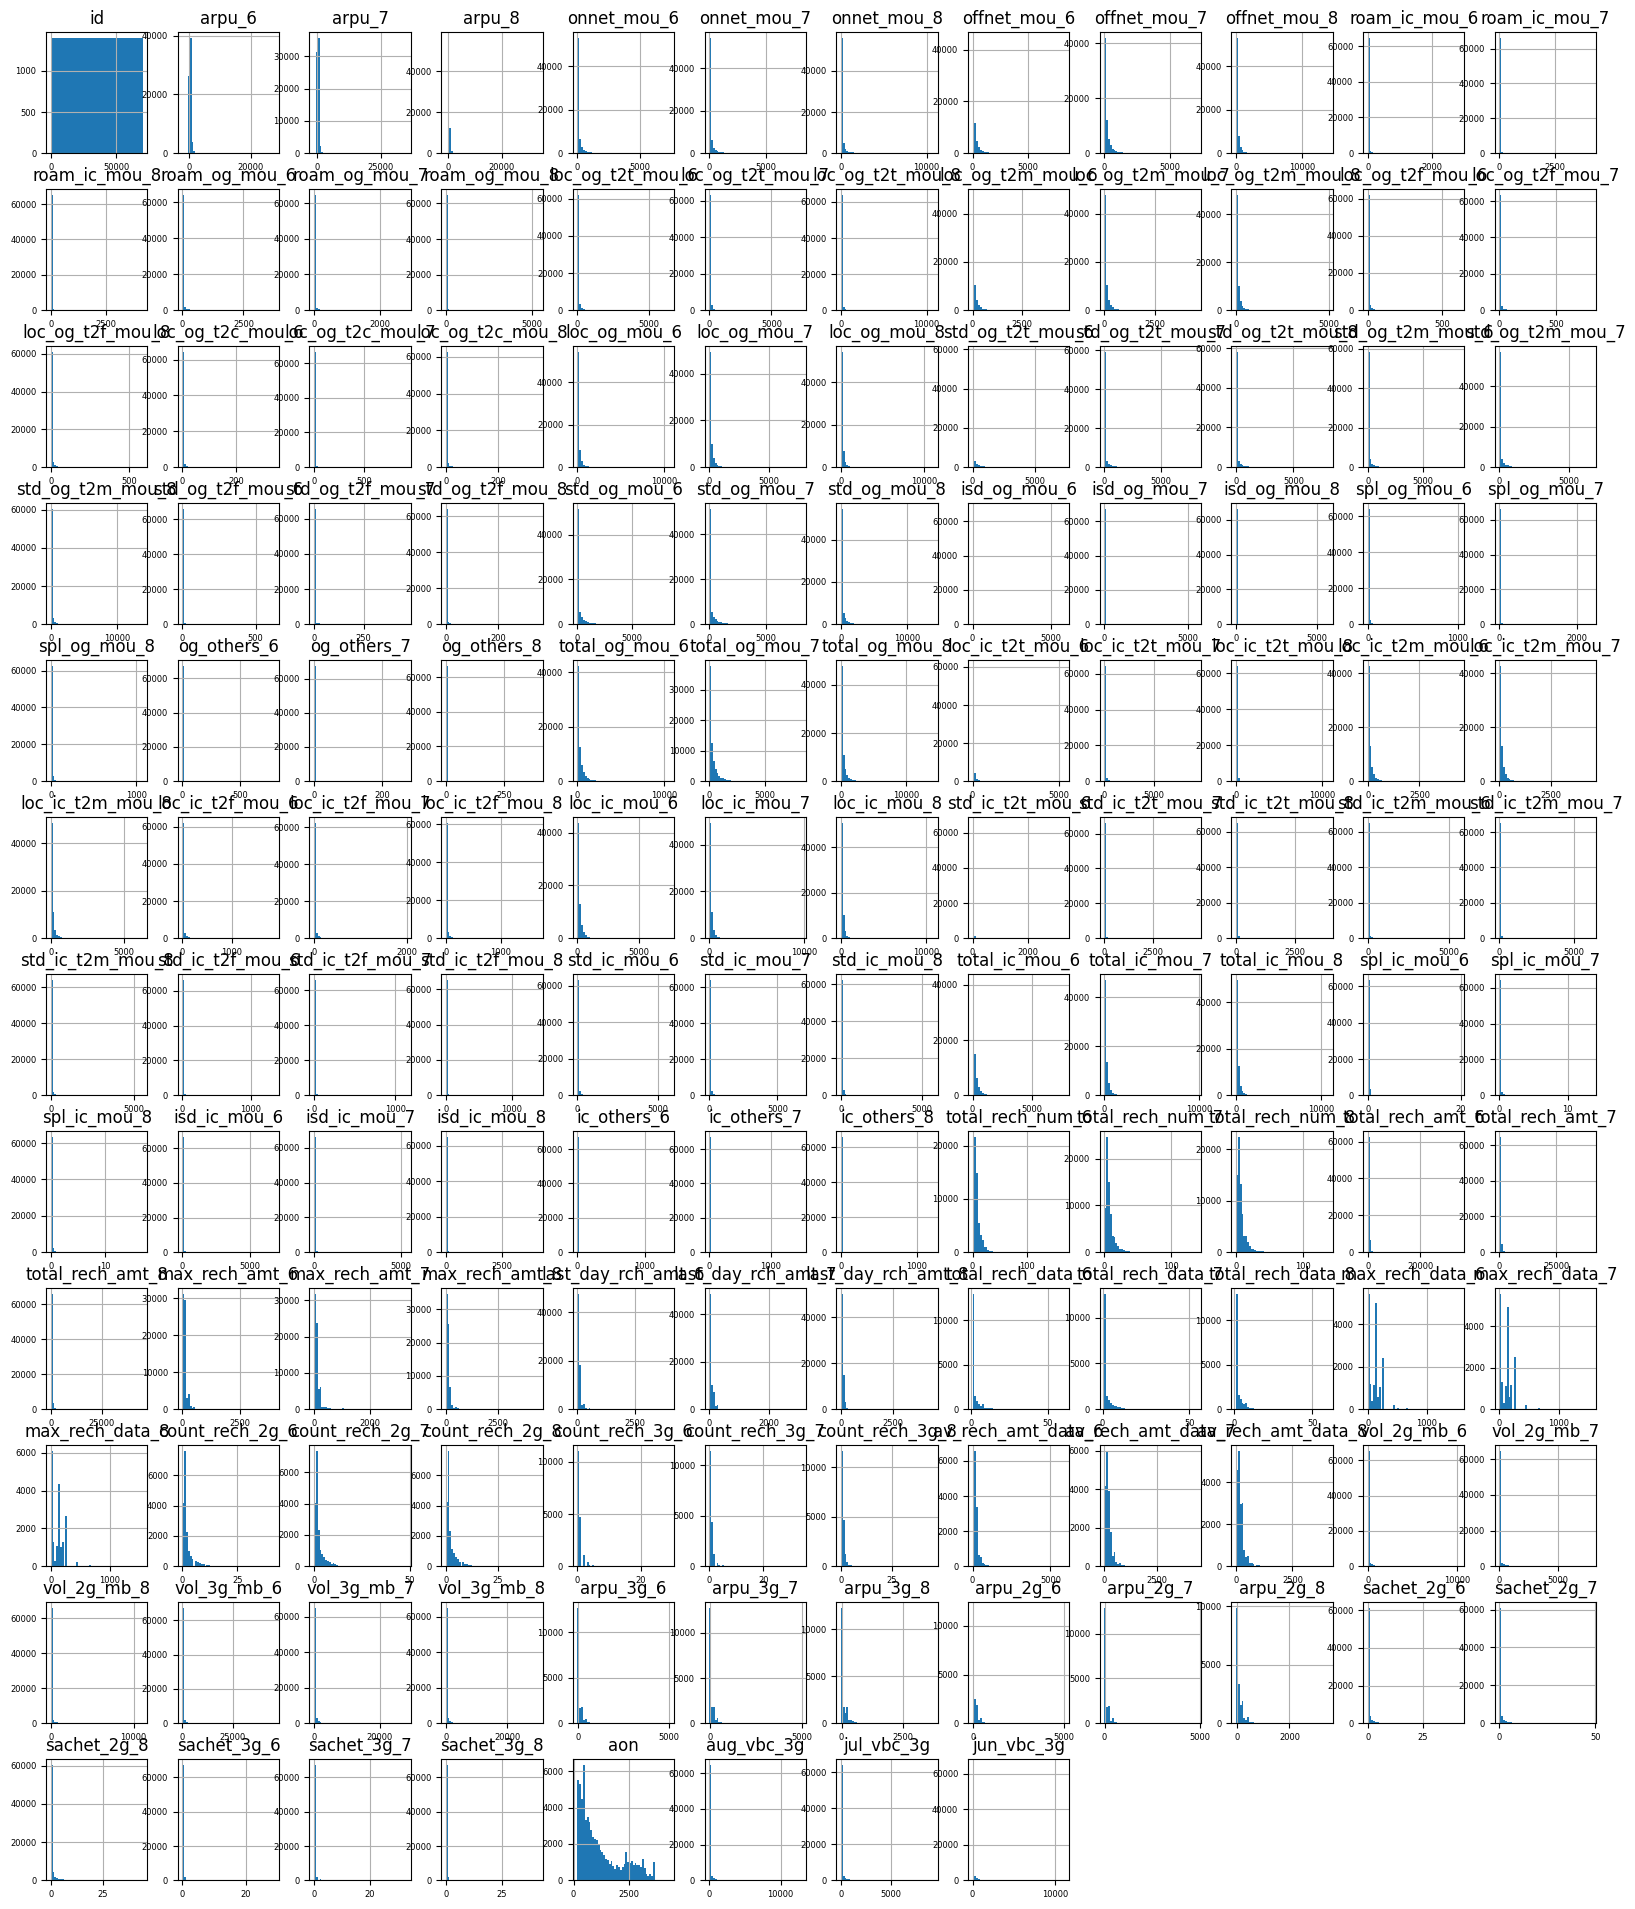

In [7]:
# plot hist of numberical columns
fig = train[num_cols].hist(figsize=(20, 24), bins=50, xlabelsize=6, ylabelsize=6)
plt.show()

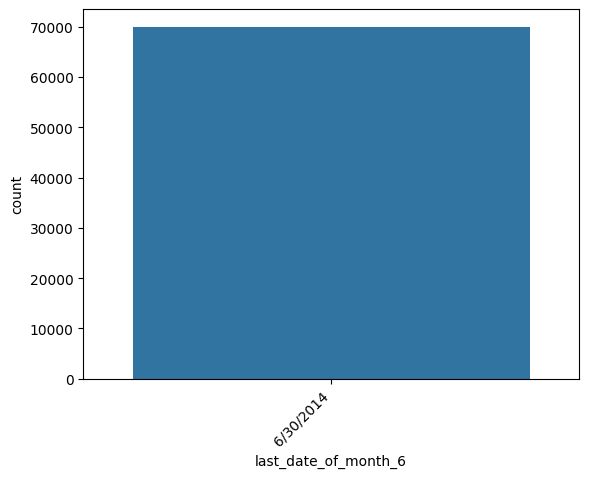

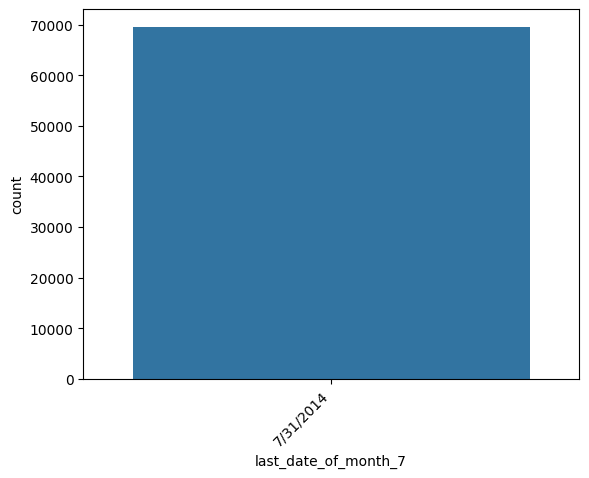

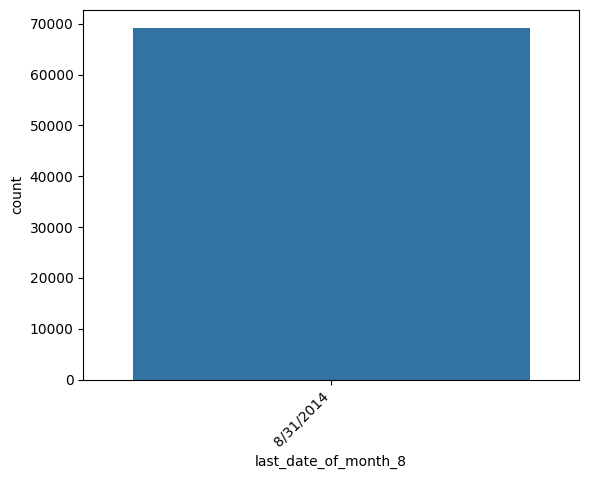

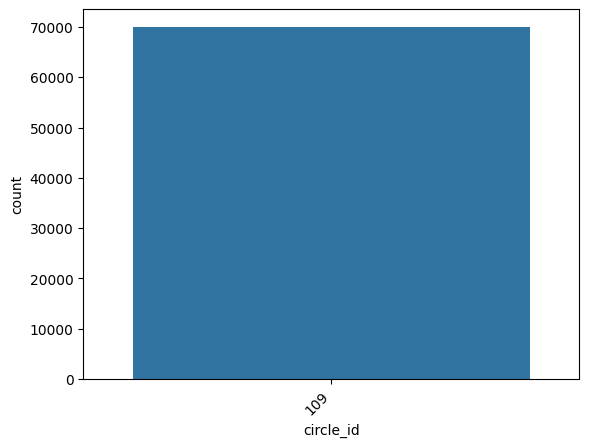

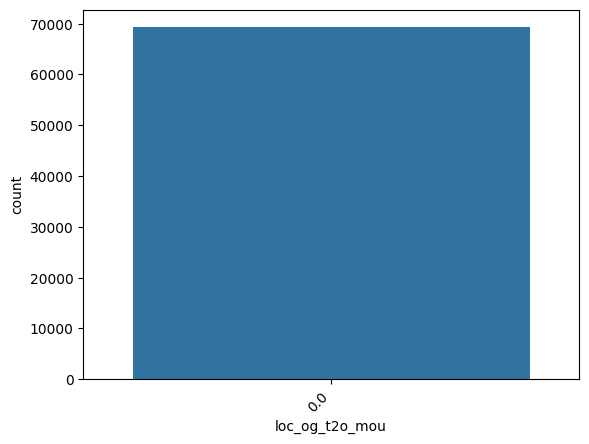

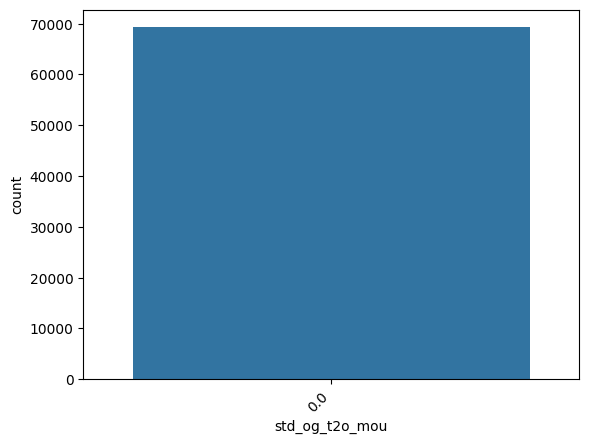

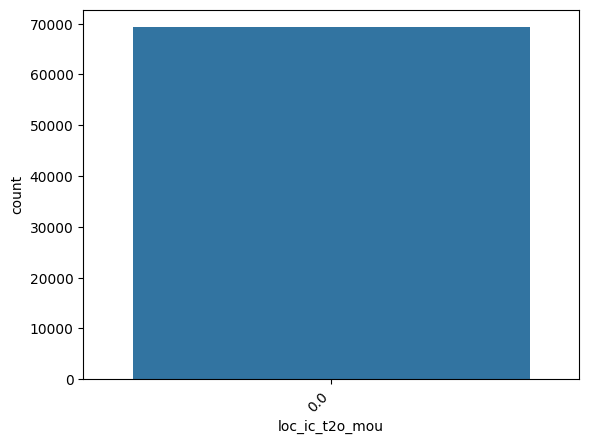

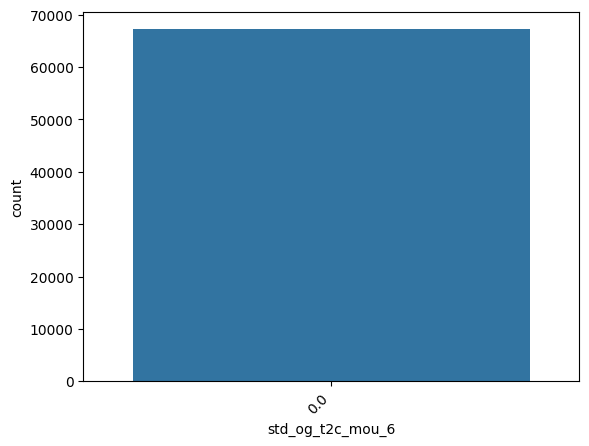

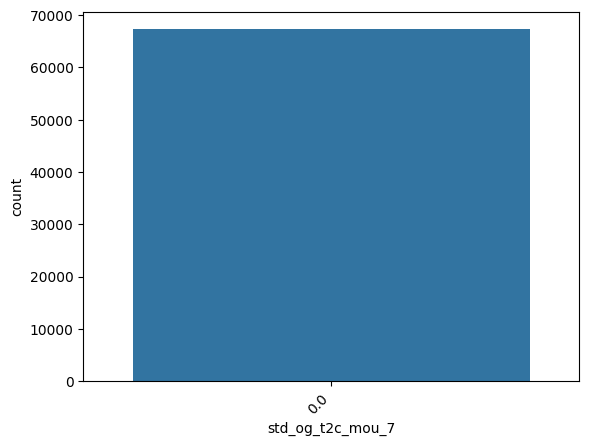

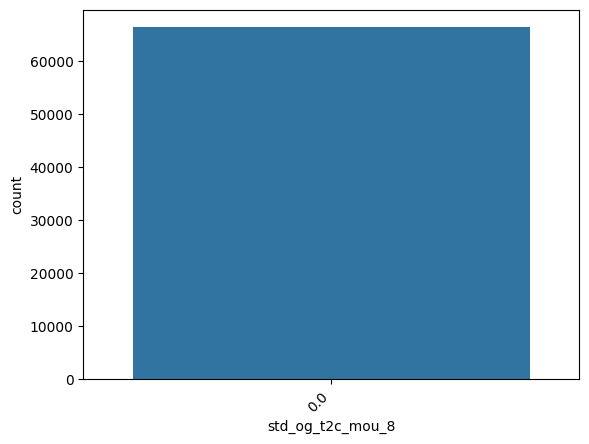

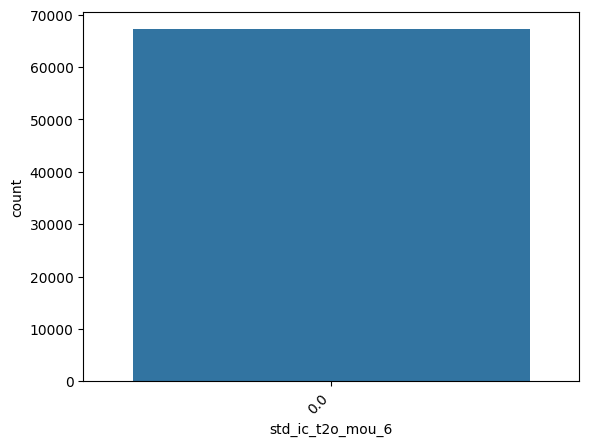

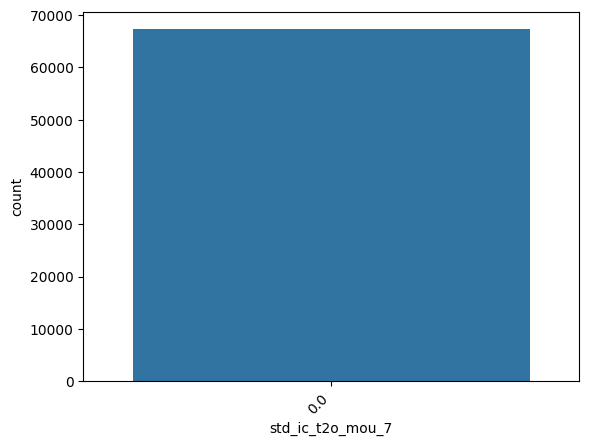

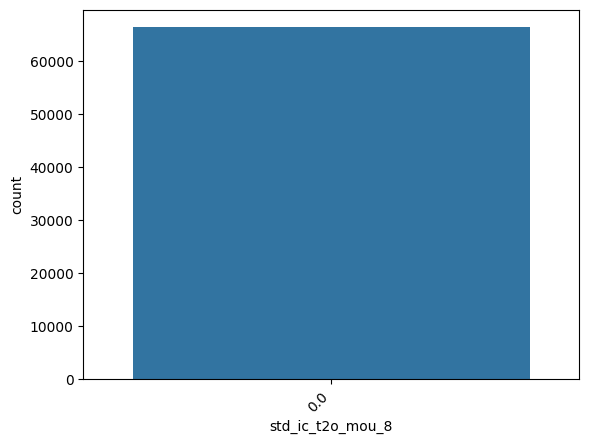

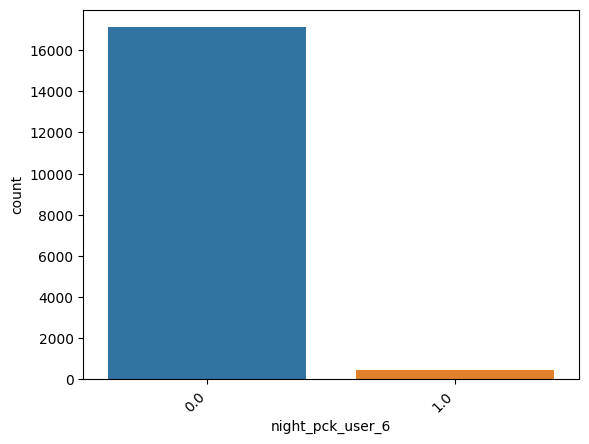

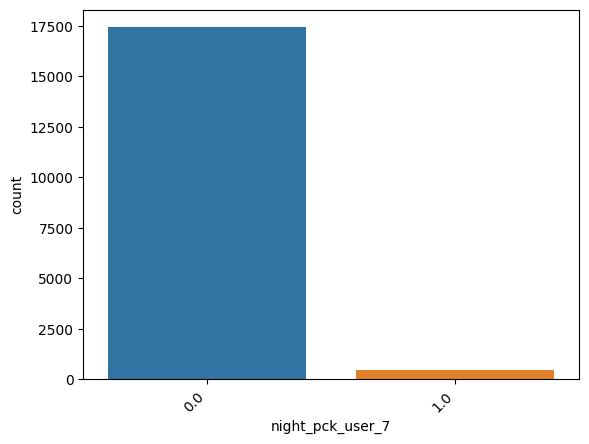

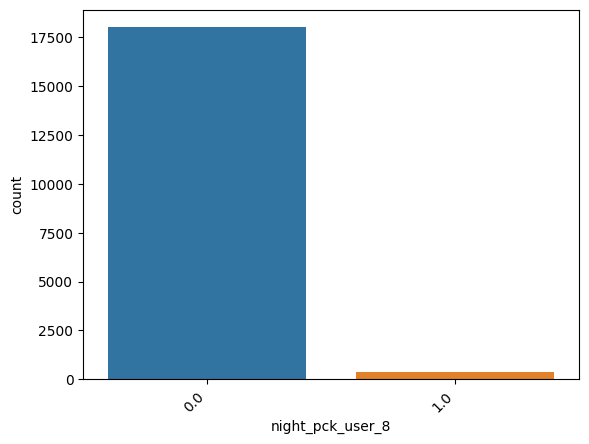

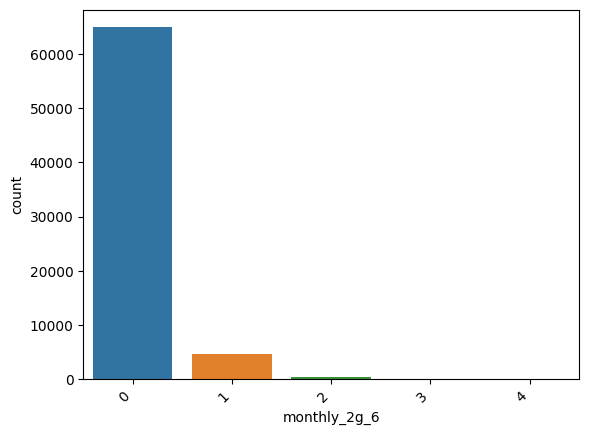

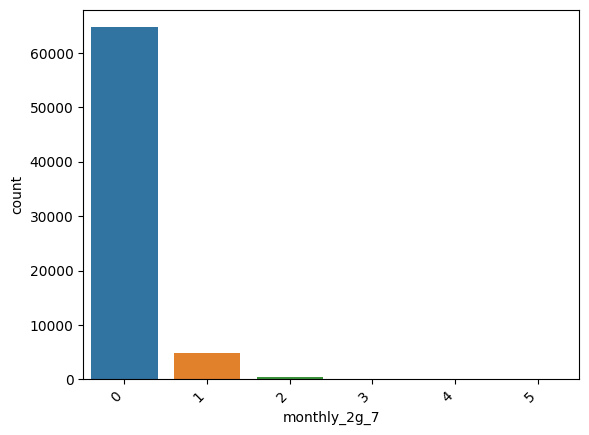

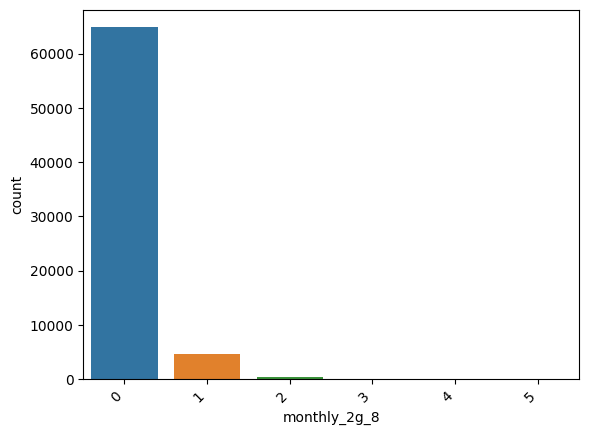

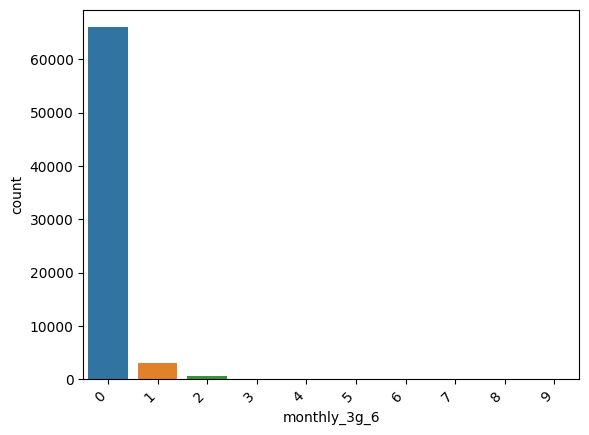

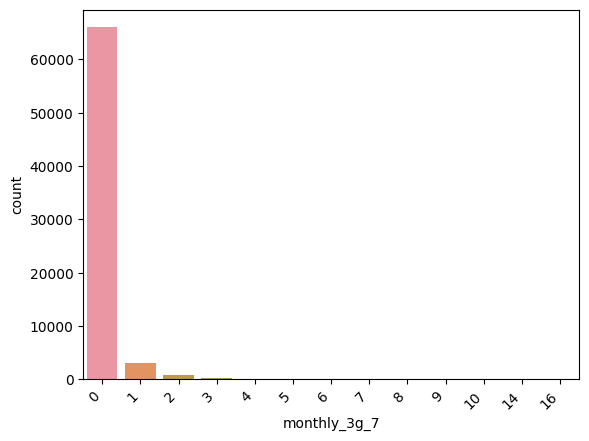

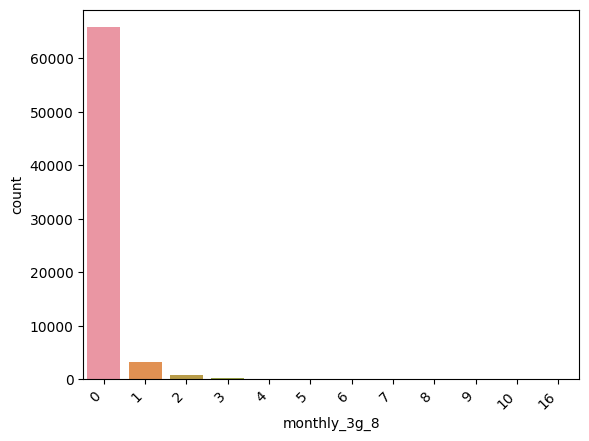

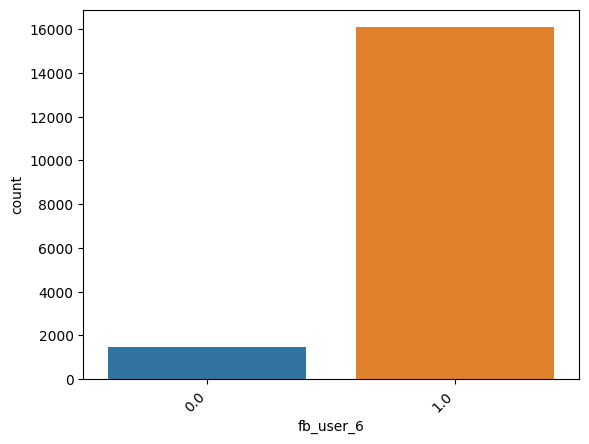

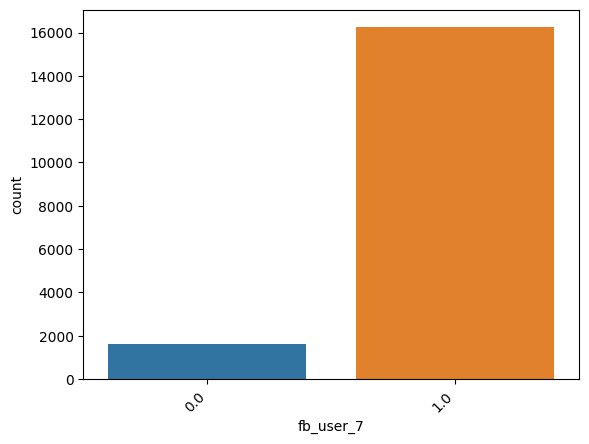

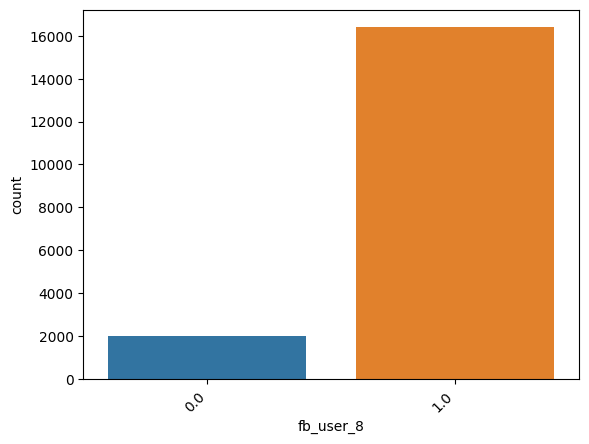

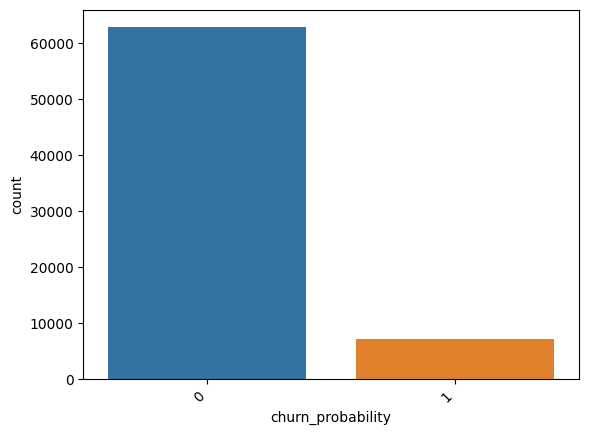

In [8]:
# plot count the categorical columns
for c in cat_cols:
    sorted_order =train[c].value_counts().index.sort_values()
    ax = sns.countplot(data=train, x=c,  order=sorted_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

Observations:
> 1. Useless columns:
        ['id','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8']
> 2. Columns with binary values:
        ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [9]:
# drop uneccessary columns
train = train.drop(columns=['id','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','og_others_6','og_others_7','og_others_8'])
train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
mean     283.134365    278.185912    278.858826    133.153275    133.894438   
std      334.213918    344.366927    351.924315    299.963093    311.277193   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      7.410000      6.675000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    119.390000    115.837500   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   
mean     132.978257    198.874771    197.153383    196.543577       9.765435   
std      311.896596    316.818355    322.482226    324.089234      57.374429   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.410000     34.860000     32.240000     31.575000       0.000000   
50%       32.100000     96.480000     91.885000     91.800000       0.000000   
75%      115.060000    232.990000    227.630000    229.345000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       ...   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7  \
count  ...  69999.000000  69999.000000  17568.000000  17865.000000   
mean   ...      0.081444      0.085487      0.916325      0.909544   
std    ...      0.634547      0.680035      0.276907      0.286842   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      1.000000      1.000000   
50%    ...      0.000000      0.000000      1.000000      1.000000   
75%    ...      0.000000      0.000000      1.000000      1.000000   
max    ...     33.000000     41.000000      1.000000      1.000000   

          fb_user_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  \
count  18417.000000  69999.000000  69999.000000  69999.000000  69999.00000   
mean       0.890319   1220.639709     68.108597     65.935830     60.07674   
std        0.312501    952.426321    269.328659    267.899034    257.22681   
min        0.000000    180.000000      0.000000      0.000000      0.00000   
25%        1.000000    468.000000      0.000000      0.000000      0.00000   
50%        1.000000    868.000000      0.000000      0.000000      0.00000   
75%        1.000000   1813.000000      0.000000      0.000000      0.00000   
max        1.000000   4337.000000  12916.220000   9165.600000  11166.21000   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 152 columns]

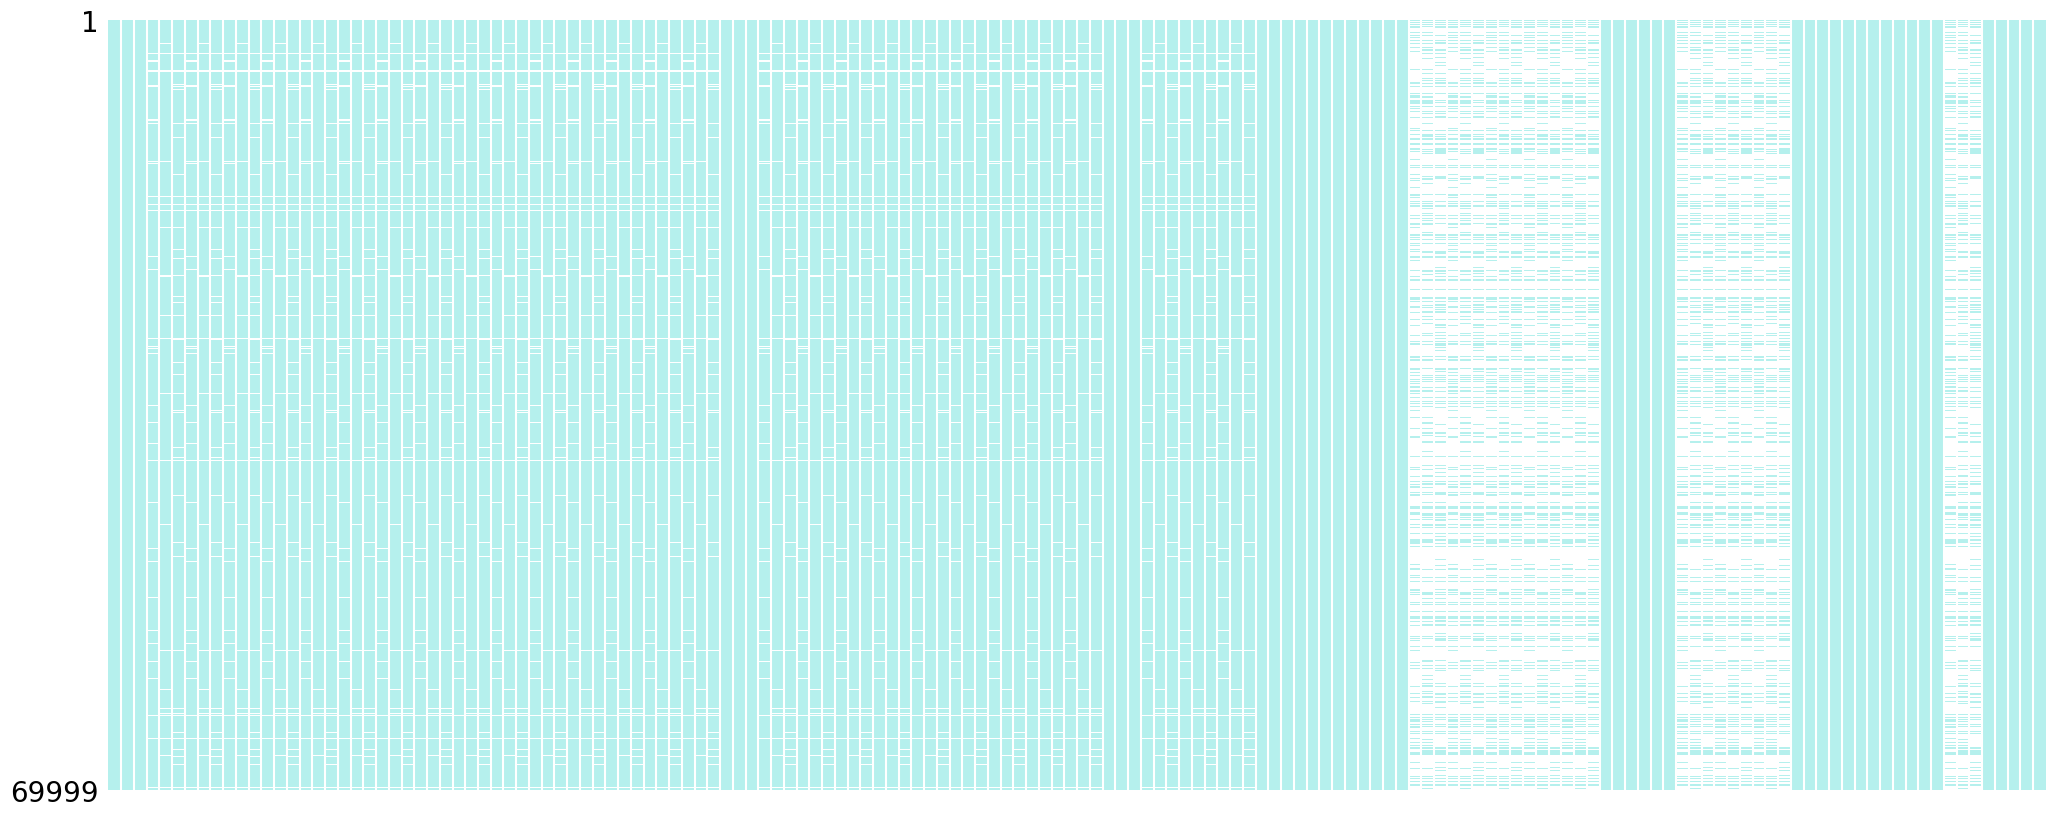

In [10]:
#overview missing data
fig = msno.matrix(train,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

> There are many missing data. So I need to check them, then handling before training

number of columns with null values per total columns: 108/152


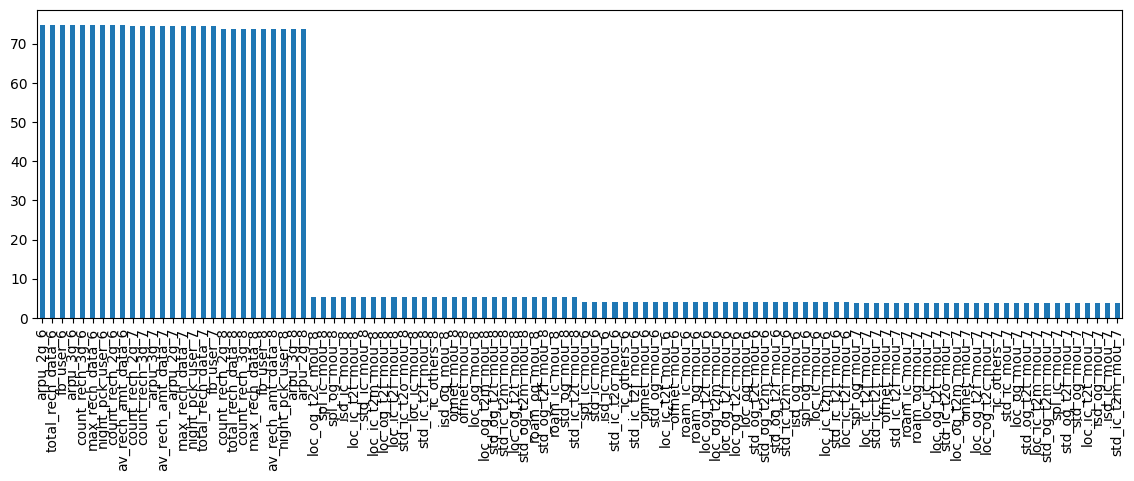

In [11]:
# check null ratio
r_null = 100*(train.isnull().sum()/len((train)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(train.columns)}')
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [12]:
#check churn_probability columns
'churn_probability' in null_colummns

False

1. I will drop coulumns which more than 70% of missing values
2. Impute 0 to fill  in columns related to recharge
3. With revenue  columns, should drop
4. Columns with binary values, I fill in by -1

# Imputation 

In [13]:
def imputation(df):
    #Impute columns related to recharge with 0
    rech_cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
    'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6'
    ,'total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7',
    'max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
    'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
    df[rech_cols] = df[rech_cols].apply(lambda x: x.fillna(0))
    # Impute columns have binary values with -1
    binaryvalues_col = retriever_2values_columns(df)
    df[binaryvalues_col] = df[binaryvalues_col].apply(lambda x: x.fillna(-1))
    # dropping columns has only  one value
    onevalue_col = retriever_1value_columns(df)
    df = df.drop(columns = onevalue_col)
    #dropping columns with more than 70% missing values
    drop_null_columns_70 = drop_null_columns(df, threshold=70)
    df = df.drop(columns = drop_null_columns_70)
    # The rest, I fill by most mode
    df = df.fillna(df.mode().iloc[0])
    return df

In [14]:
train_imputation= imputation(train)
train_imputation.describe()

Number of columns with 70% null values: 6
Drop null columns: Index(['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8',
       'arpu_2g_8'],
      dtype='object')


arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       ...   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7  \
count  ...  69999.000000  69999.000000  69999.000000  69999.000000   
mean   ...      0.081444      0.085487     -0.519050     -0.512650   
std    ...      0.634547      0.680035      0.842376      0.845053   
min    ...      0.000000      0.000000     -1.000000     -1.000000   
25%    ...      0.000000      0.000000     -1.000000     -1.000000   
50%    ...      0.000000      0.000000     -1.000000     -1.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     33.000000     41.000000      1.000000      1.000000   

          fb_user_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.00000   
mean      -0.502650   1220.639709     68.108597     65.935830     60.07674   
std        0.847641    952.426321    269.328659    267.899034    257.22681   
min       -1.000000    180.000000      0.000000      0.000000      0.00000   
25%       -1.000000    468.000000      0.000000      0.000000      0.00000   
50%       -1.000000    868.000000      0.000000      0.000000      0.00000   
75%        0.000000   1813.000000      0.000000      0.000000      0.00000   
max        1.000000   4337.000000  12916.220000   9165.600000  11166.21000   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 143 columns]

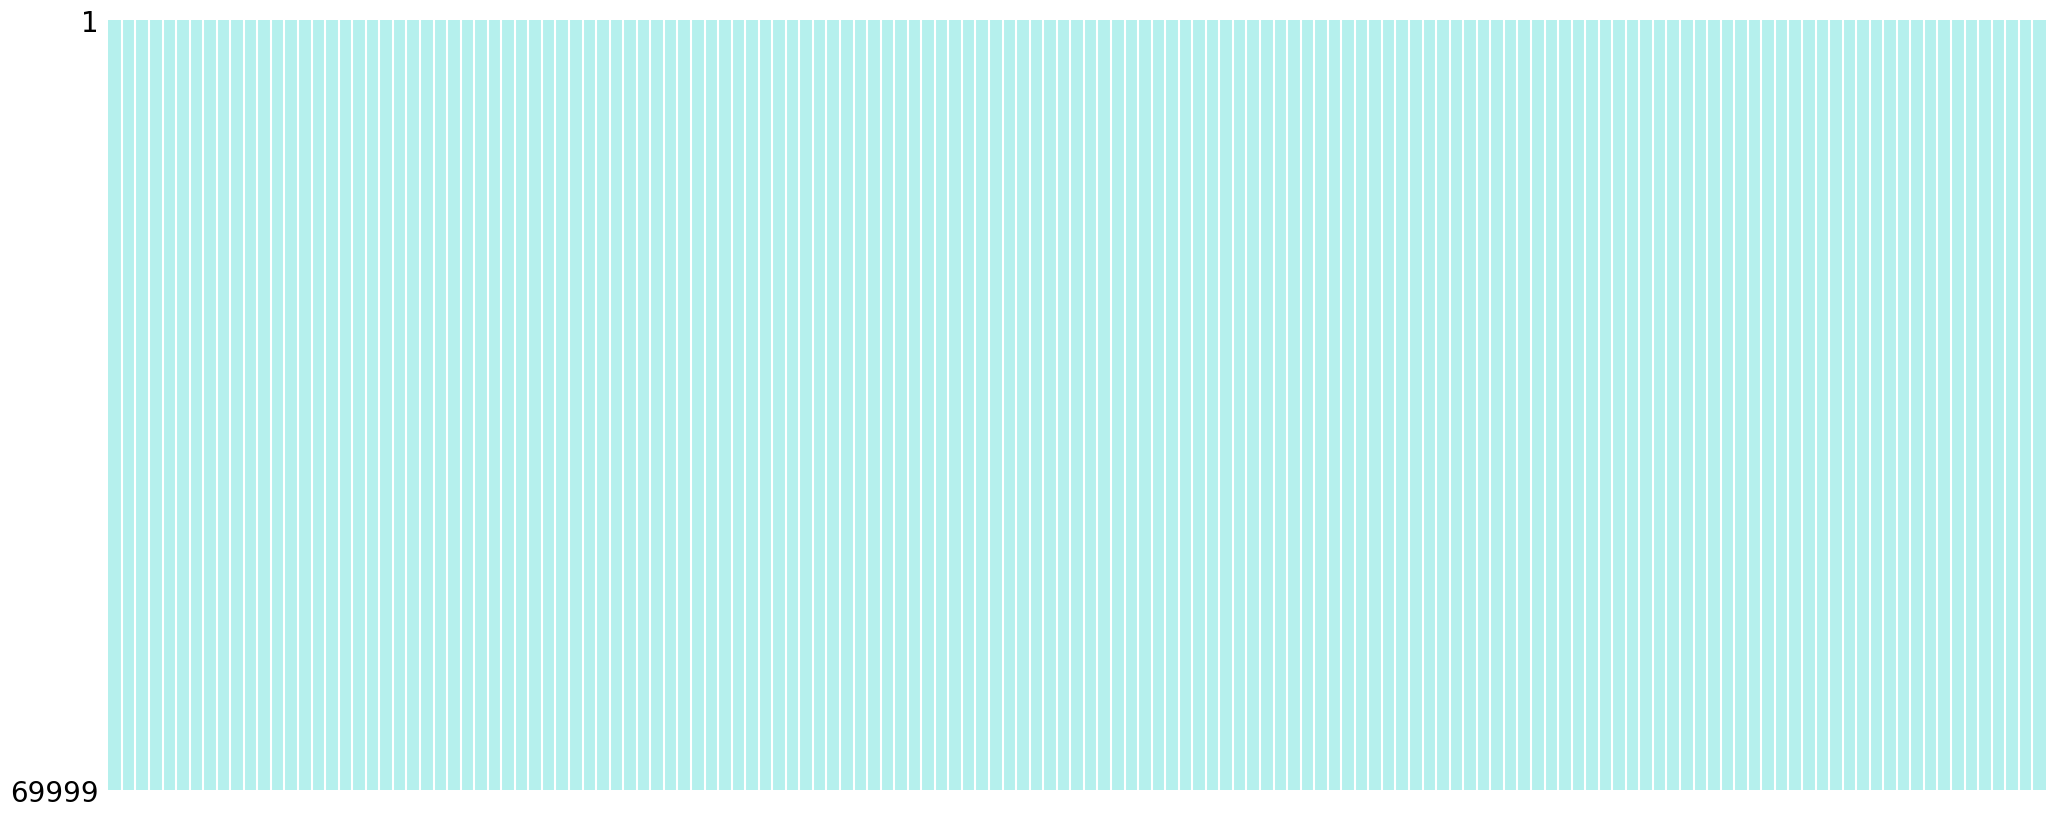

In [15]:
#overview missing data
fig = msno.matrix(train_imputation,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

# EDA

In [16]:
def univariate_analysis1(df, column):
    _, p = plt.subplots(2,1, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(f'{column}')
    p[1].set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()

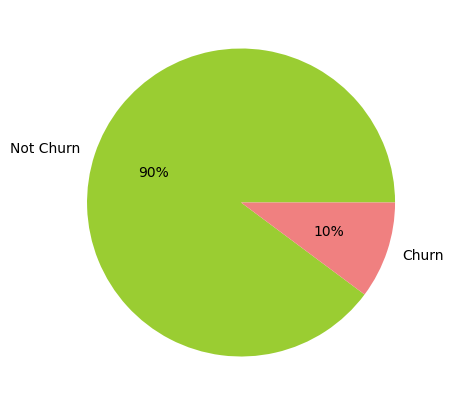

In [17]:
#plot churn_probability
plt.figure(figsize= (5,5)) 
data = train_imputation.churn_probability.value_counts()
labels = ['Not Churn','Churn']
colors = ['yellowgreen', 'lightcoral']
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()

> We catch the imbalance problem

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(train_imputation)


Observations: 69999
Variables: 143
cat_cols: 13
num_cols: 130
cat_but_car: 0
num_but_cat: 13


## Outlier and Distribution

In [19]:
train_imputation.describe(percentiles=[.25,.5,.75,.90,.95,.99])


arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
90%      619.993800    615.661400    614.994600    331.766000    334.886000   
95%      832.022700    823.236700    828.464700    598.600000    608.878000   
99%     1400.276640   1414.891380   1445.054800   1429.040400   1461.342200   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
90%      326.298000    468.898000    470.054000    467.636000      10.890000   
95%      596.125000    719.500000    731.602000    715.915000      38.842000   
99%     1448.891000   1520.310000   1517.838600   1492.232400     213.827400   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       ...   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7  \
count  ...  69999.000000  69999.000000  69999.000000  69999.000000   
mean   ...      0.081444      0.085487     -0.519050     -0.512650   
std    ...      0.634547      0.680035      0.842376      0.845053   
min    ...      0.000000      0.000000     -1.000000     -1.000000   
25%    ...      0.000000      0.000000     -1.000000     -1.000000   
50%    ...      0.000000      0.000000     -1.000000     -1.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
90%    ...      0.000000      0.000000      1.000000      1.000000   
95%    ...      0.000000      0.000000      1.000000      1.000000   
99%    ...      2.000000      2.000000      1.000000      1.000000   
max    ...     33.000000     41.000000      1.000000      1.000000   

          fb_user_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.00000   
mean      -0.502650   1220.639709     68.108597     65.935830     60.07674   
std        0.847641    952.426321    269.328659    267.899034    257.22681   
min       -1.000000    180.000000      0.000000      0.000000      0.00000   
25%       -1.000000    468.000000      0.000000      0.000000      0.00000   
50%       -1.000000    868.000000      0.000000      0.000000      0.00000   
75%        0.000000   1813.000000      0.000000      0.000000      0.00000   
90%        1.000000   2792.000000    160.444000    136.272000    110.32800   
95%        1.000000   3108.000000    464.277000    446.353000    400.13400   
99%        1.000000   3651.000000   1226.659800   1254.279000   1188.26780   
max        1.000000   4337.000000  12916.220000   9165.600000  11166.21000   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
90%             1.000000  
95%             1.000000  
99%             1.000000  
max             1.000000  



In [20]:
train_imputation.describe(percentiles=[.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
90%      619.993800    615.661400    614.994600    331.766000    334.886000   
91%      650.812760    646.384060    647.270680    366.043600    370.758000   
92%      687.932720    682.805120    681.293120    409.164800    416.558000   
93%      727.013660    723.159100    721.658780    458.941200    470.442800   
94%      775.048600    770.726160    769.137880    519.468400    534.642400   
95%      832.022700    823.236700    828.464700    598.600000    608.878000   
96%      905.697720    894.209280    900.821320    696.735600    713.342000   
97%      998.301140    991.631380   1001.924840    832.244200    857.698600   
98%     1135.876960   1143.124680   1160.328920   1041.744000   1060.364800   
99%     1400.276640   1414.891380   1445.054800   1429.040400   1461.342200   
100%   27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
90%      326.298000    468.898000    470.054000    467.636000      10.890000   
91%      361.430000    501.235400    504.731800    502.947200      13.680000   
92%      405.690000    539.854400    546.968000    543.218000      17.591600   
93%      458.580000    586.945600    596.841200    589.942800      22.810000   
94%      521.704000    646.725600    657.968400    646.252000      29.790000   
95%      596.125000    719.500000    731.602000    715.915000      38.842000   
96%      694.332400    809.826000    826.392800    808.130800      52.788000   
97%      834.183600    938.364200    943.480600    927.201400      75.891200   
98%     1052.942800   1133.372800   1137.958000   1115.595600     118.232000   
99%     1448.891000   1520.310000   1517.838600   1492.232400     213.827400   
100%   10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       ...   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7  \
count  ...  69999.000000  69999.000000  69999.000000  69999.000000   
mean   ...      0.081444      0.085487     -0.519050     -0.512650   
std    ...      0.634547      0.680035      0.842376      0.845053   
min    ...      0.000000      0.000000     -1.000000     -1.000000   
50%    ...      0.000000      0.000000     -1.000000     -1.000000   
90%    ...      0.000000      0.000000      1.000000      1.000000   
91%    ...      0.000000      0.000000      1.000000      1.000000   
92%    ...      0.000000      0.000000      1.000000      1.000000   
93%    ...      0.000000      0.000000      1.000000      1.000000   
94%    ...      0.000000      0.000000      1.000000      1.000000   
95%    ...      0.000000      0.000000      1.000000      1.000000   
96%    ...      1.000000      1.000000      1.000000      1.000000   
97%    ...      1.000000      1.000000      1.000000      1.000000   
98%    ...      1.000000      1.000000      1.000000      1.000000   
99%    ...      2.000000      2.000000      1.000000      1.000000   
100%   ...     33.000000     

plot feature: arpu_6


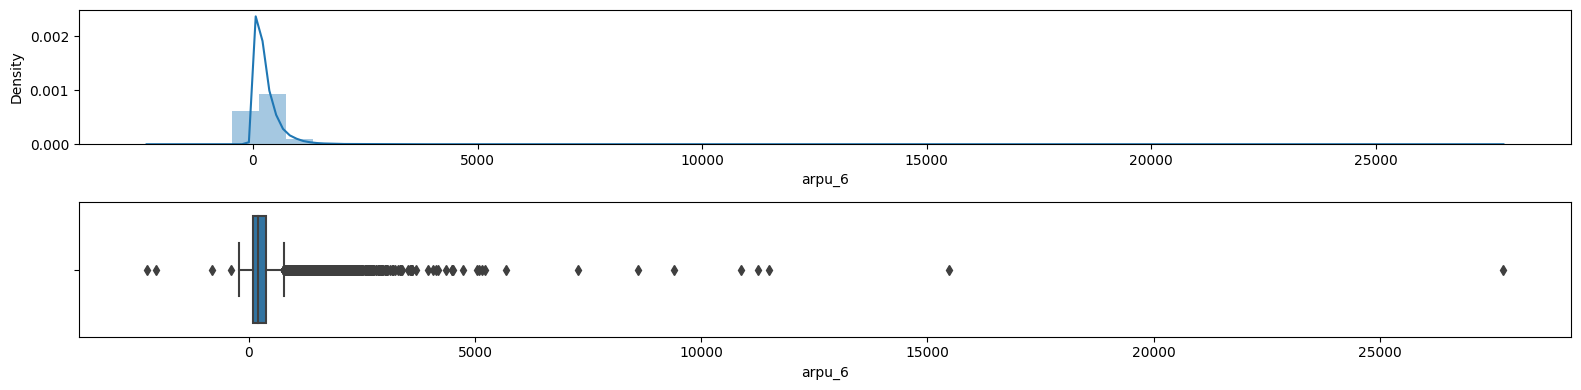

plot feature: arpu_7


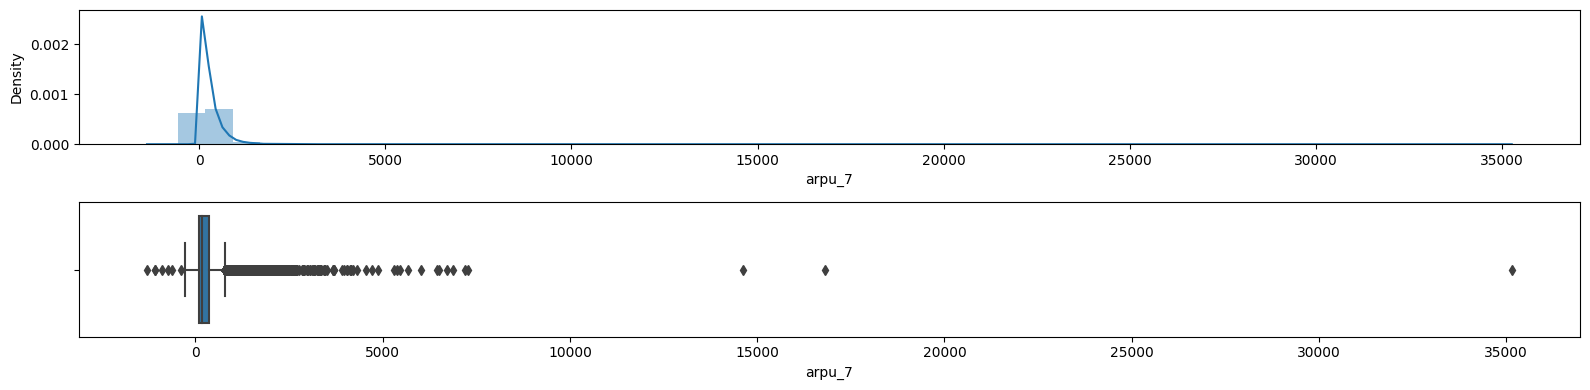

plot feature: arpu_8


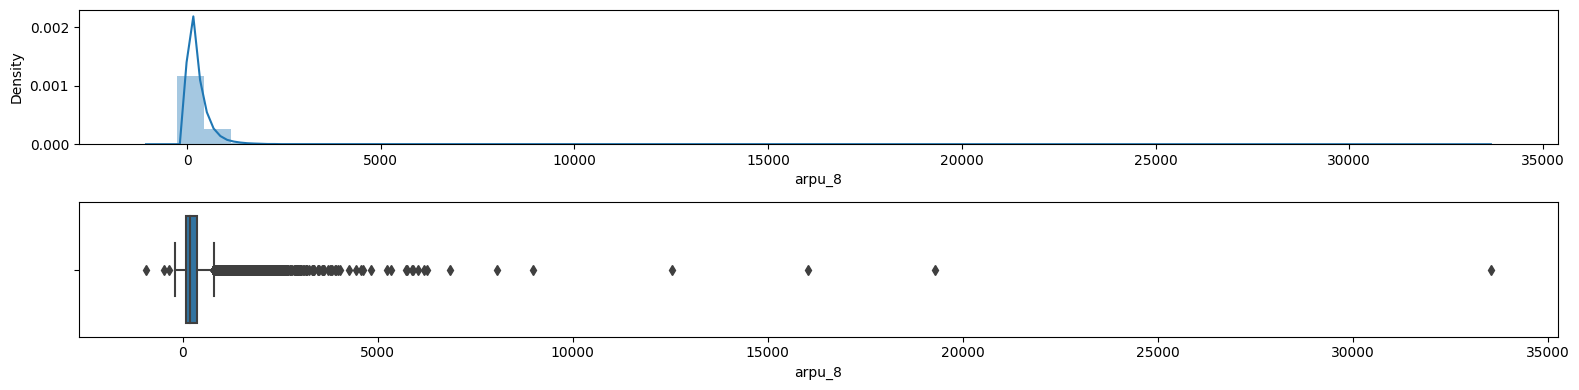

plot feature: onnet_mou_6


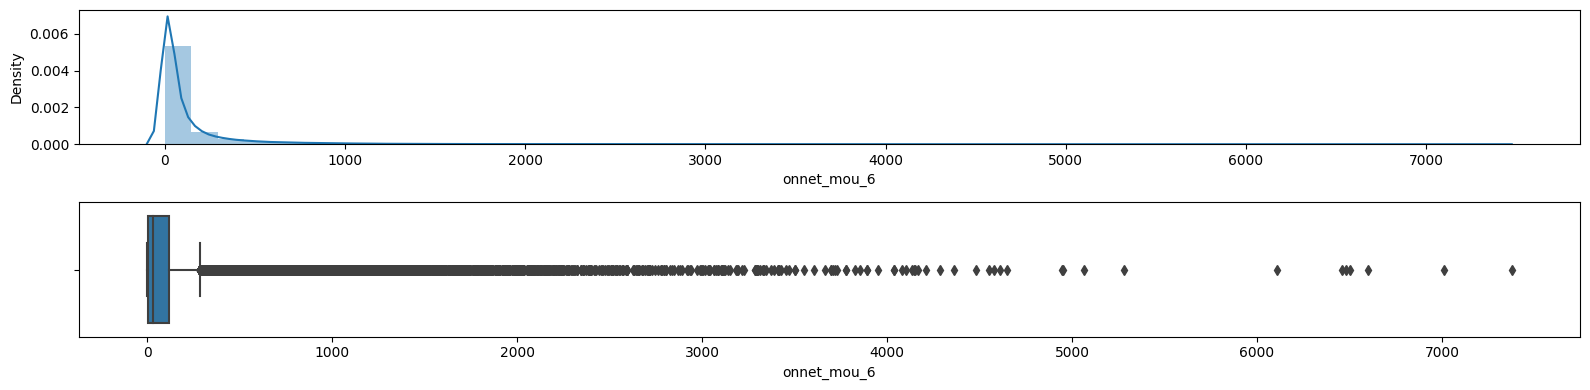

plot feature: onnet_mou_7


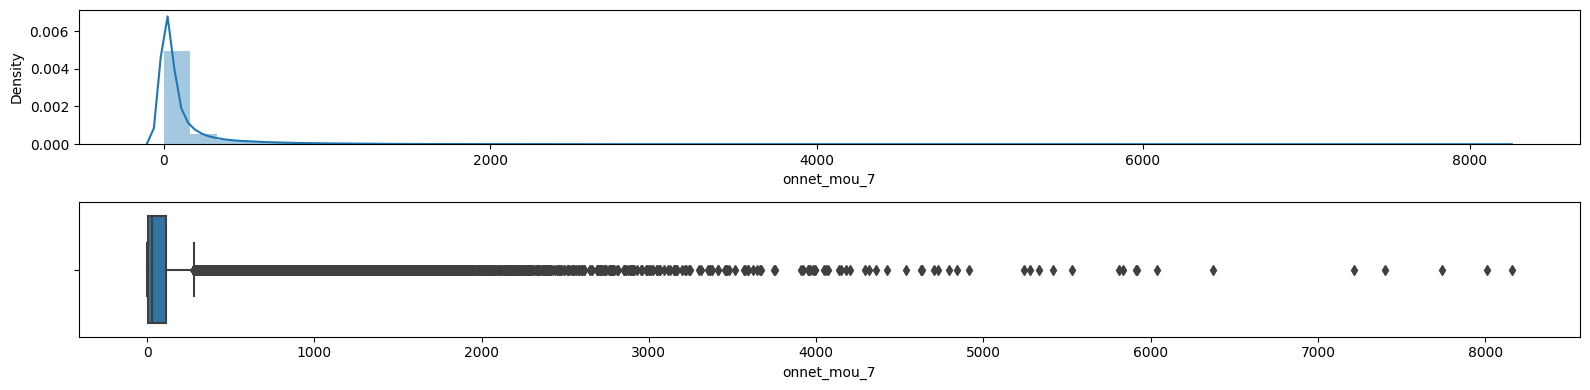

plot feature: onnet_mou_8


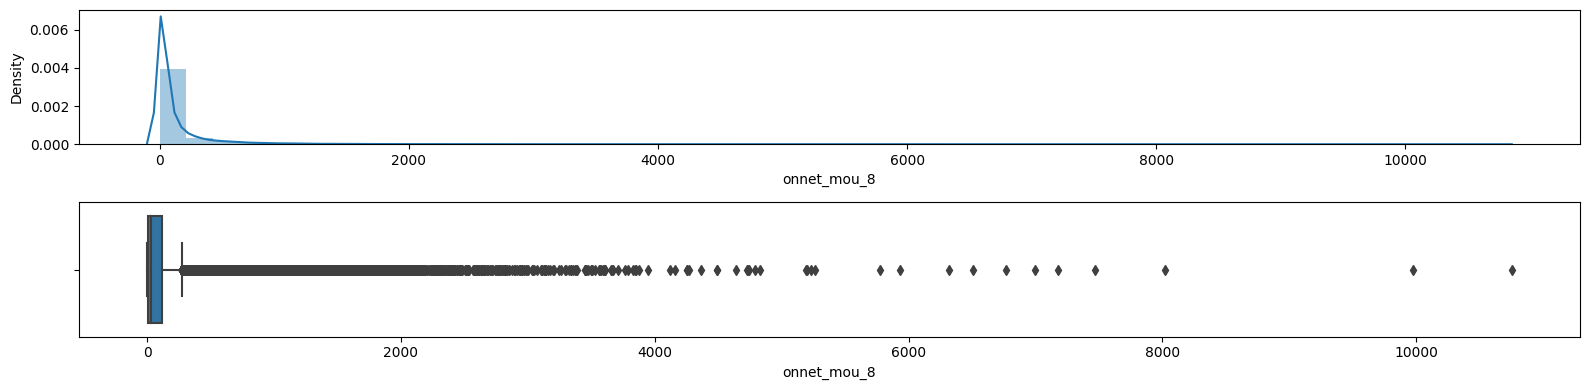

plot feature: offnet_mou_6


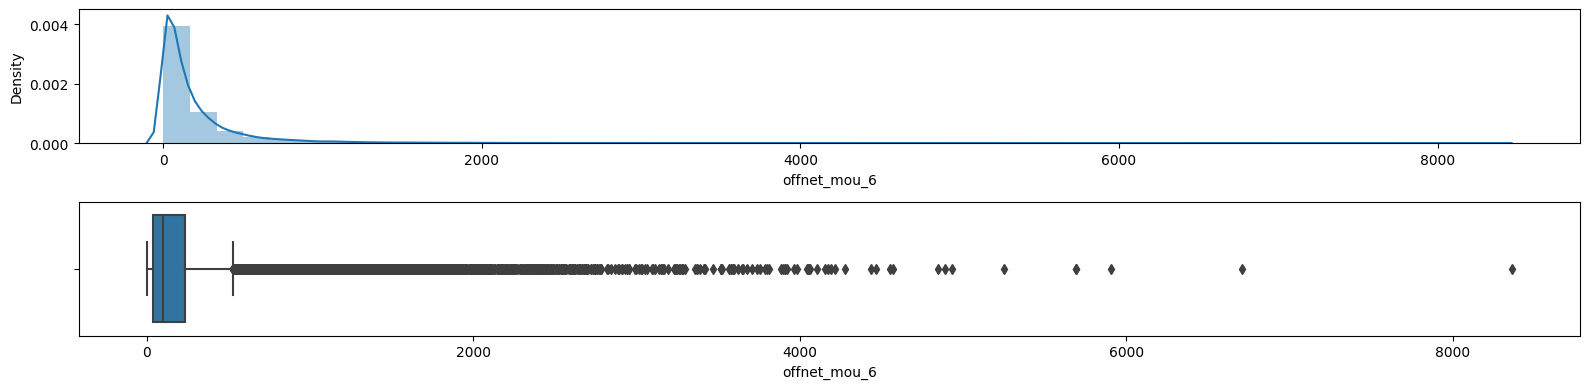

plot feature: offnet_mou_7


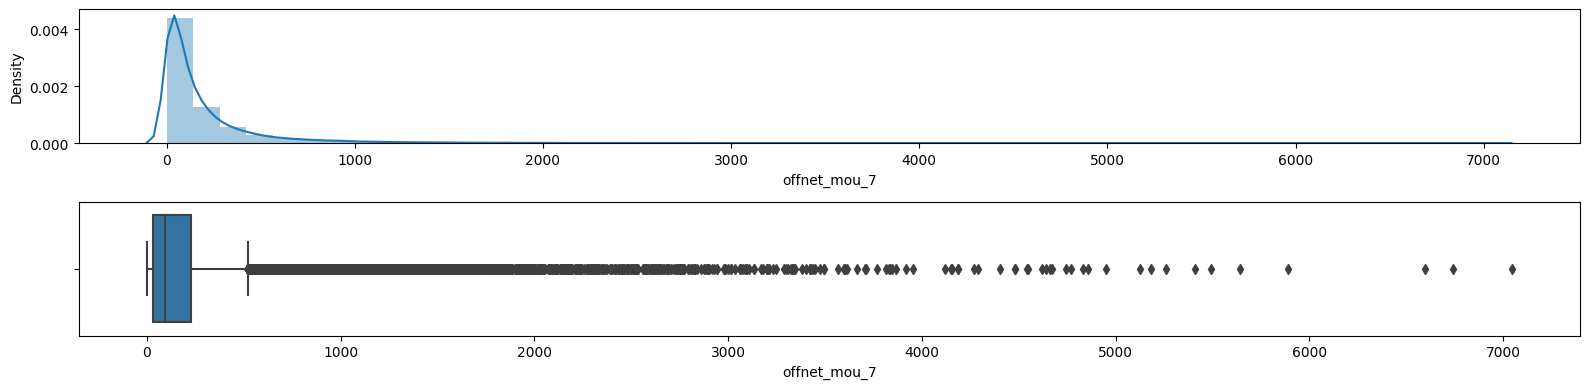

plot feature: offnet_mou_8


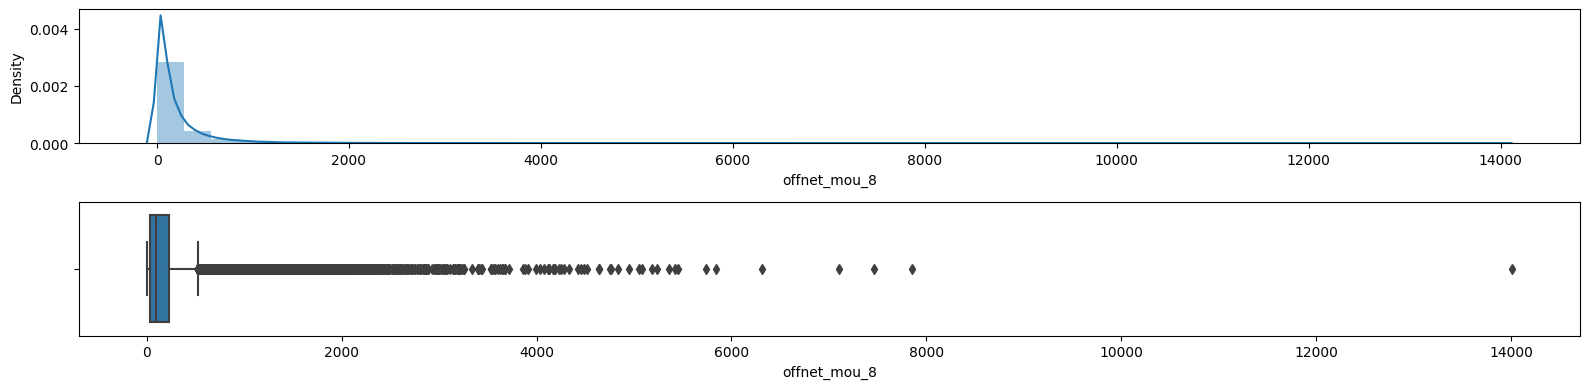

plot feature: roam_ic_mou_6


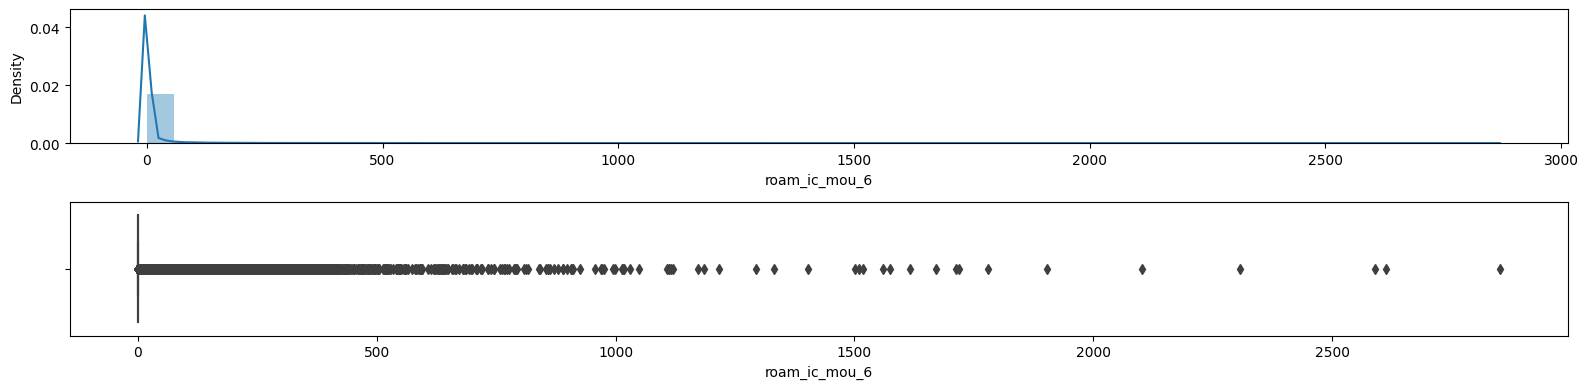

plot feature: roam_ic_mou_7


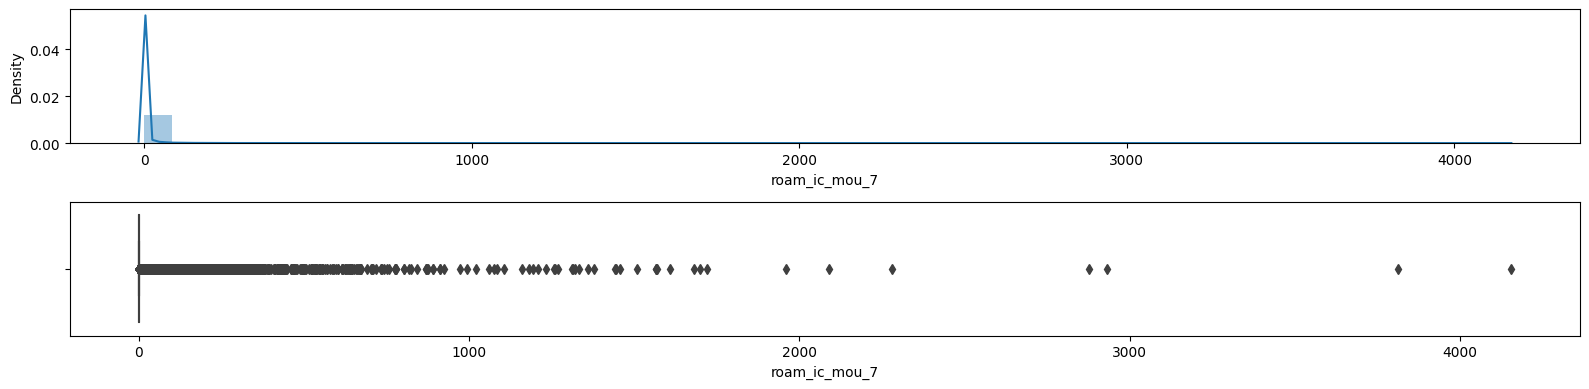

plot feature: roam_ic_mou_8


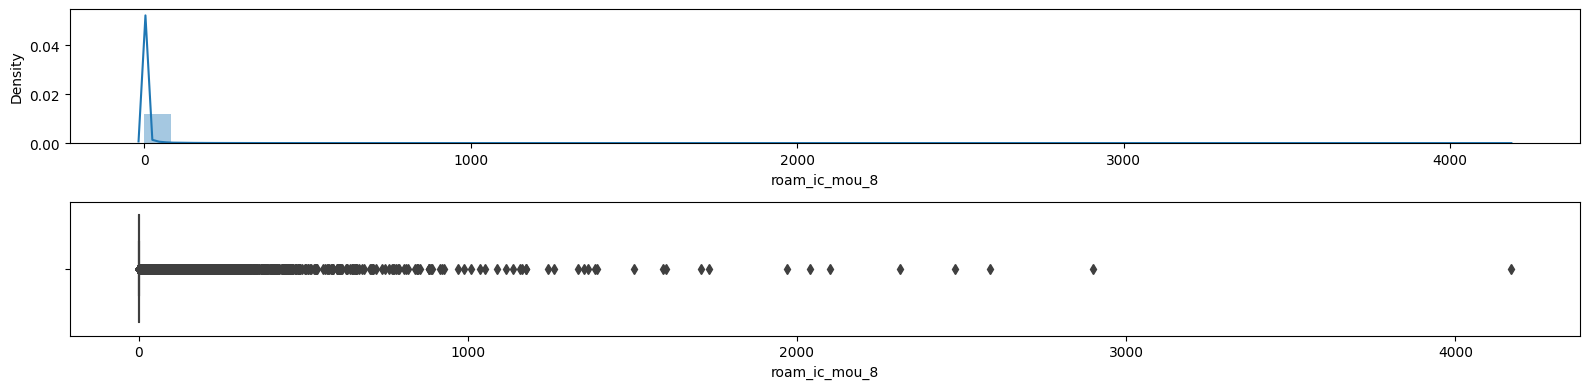

plot feature: roam_og_mou_6


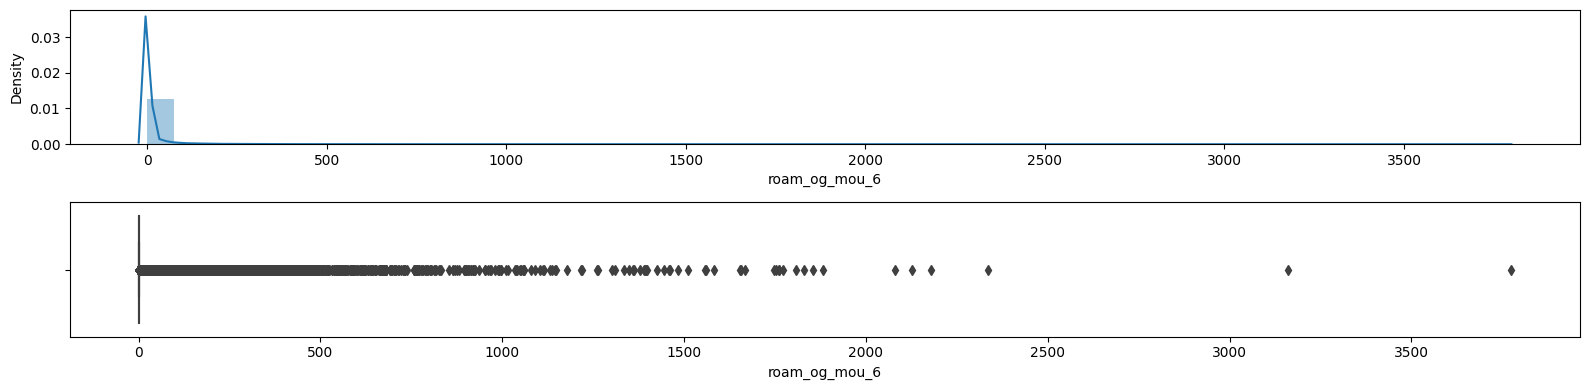

plot feature: roam_og_mou_7


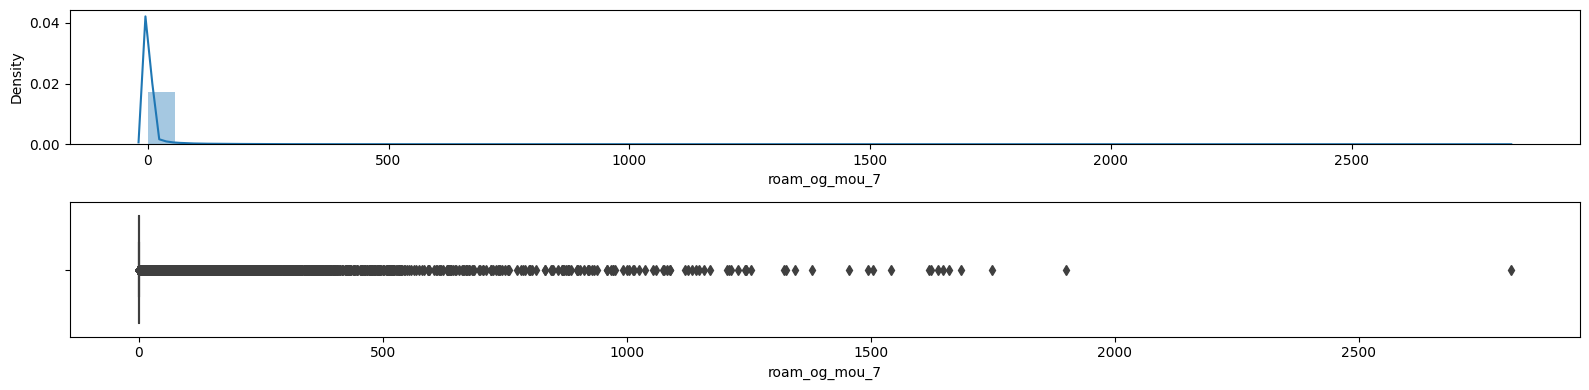

plot feature: roam_og_mou_8


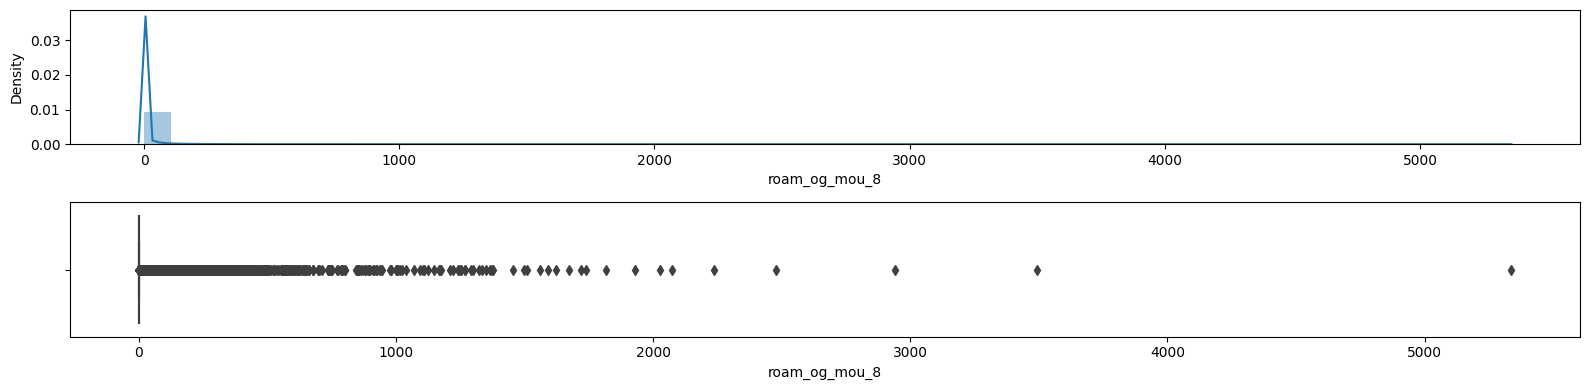

plot feature: loc_og_t2t_mou_6


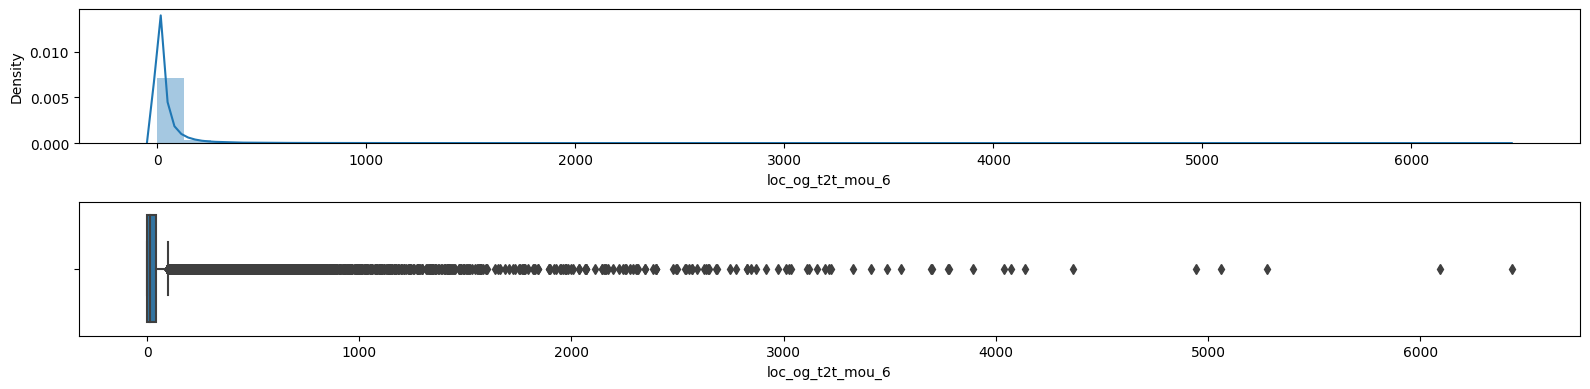

plot feature: loc_og_t2t_mou_7


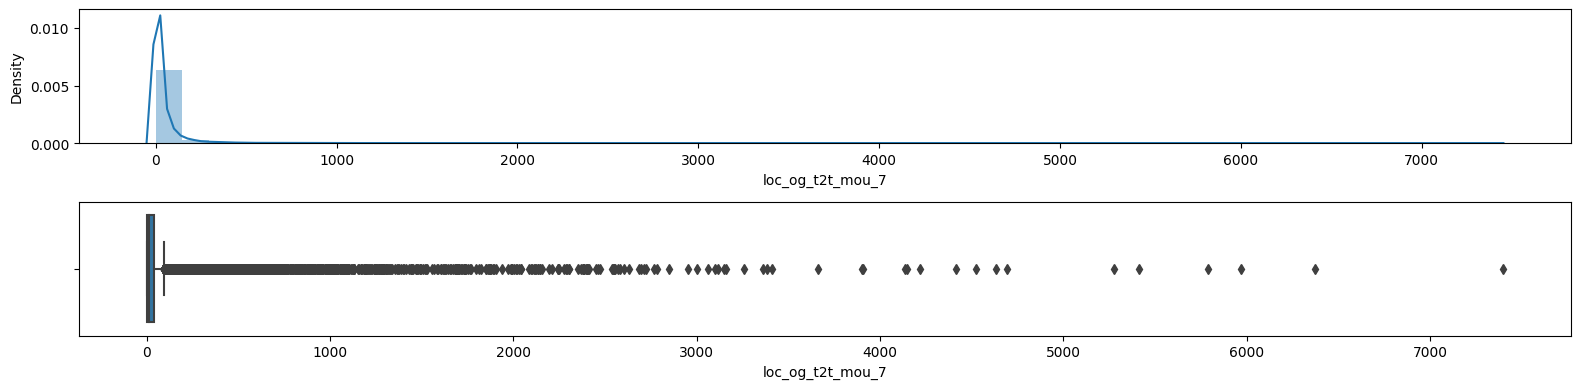

plot feature: loc_og_t2t_mou_8


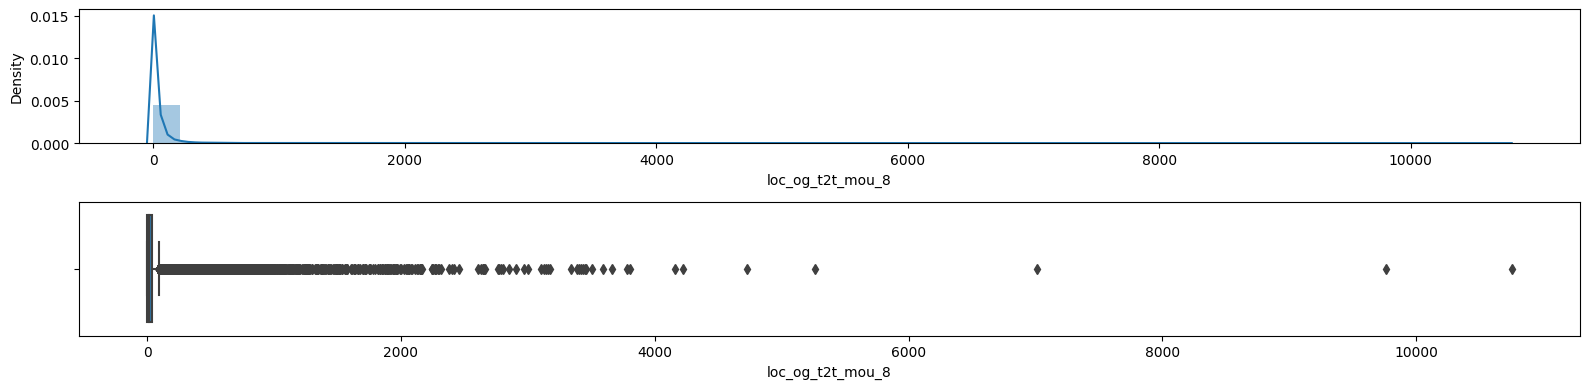

plot feature: loc_og_t2m_mou_6


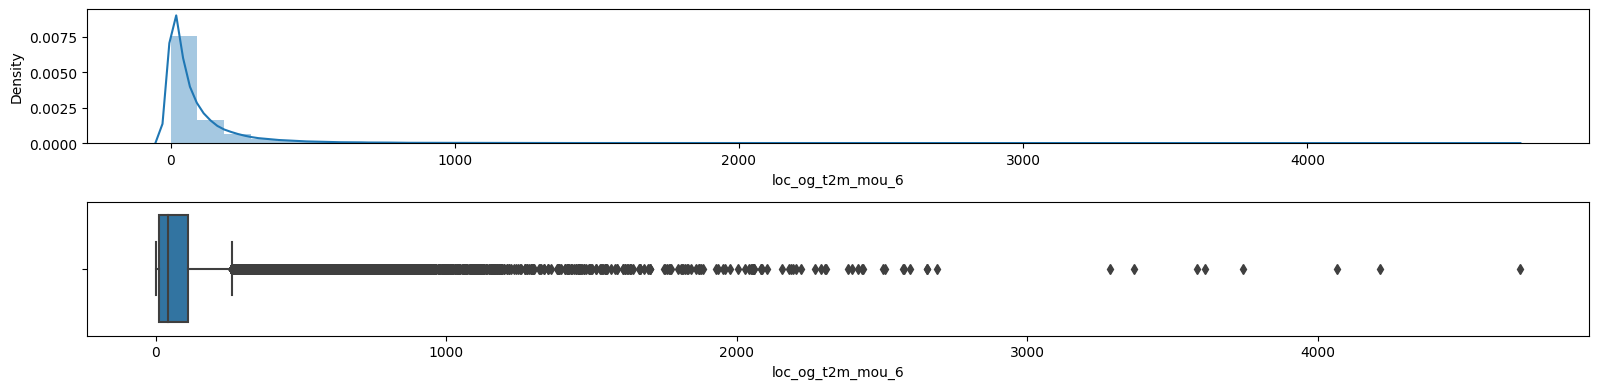

plot feature: loc_og_t2m_mou_7


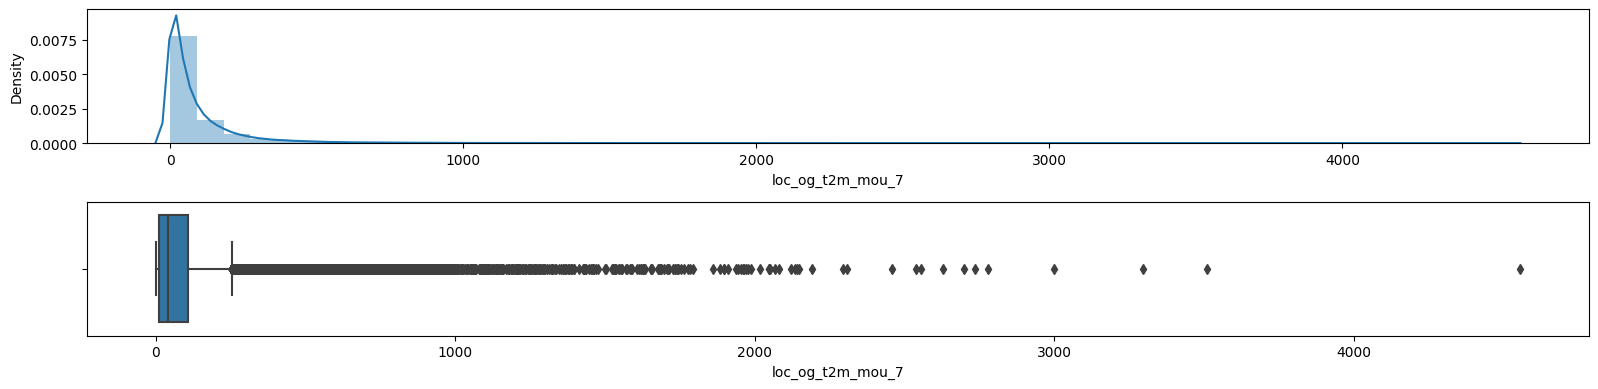

plot feature: loc_og_t2m_mou_8


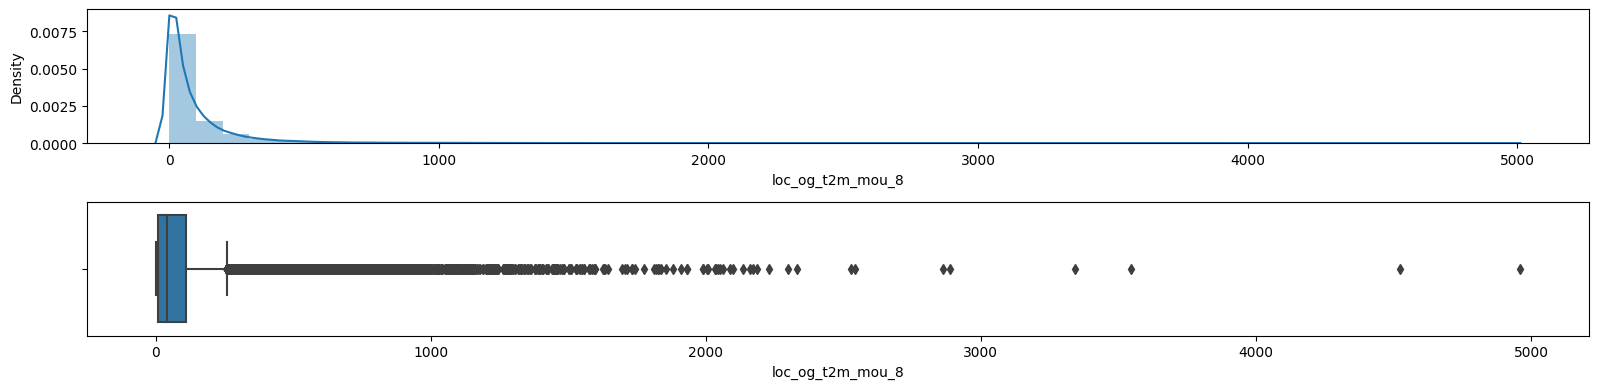

plot feature: loc_og_t2f_mou_6


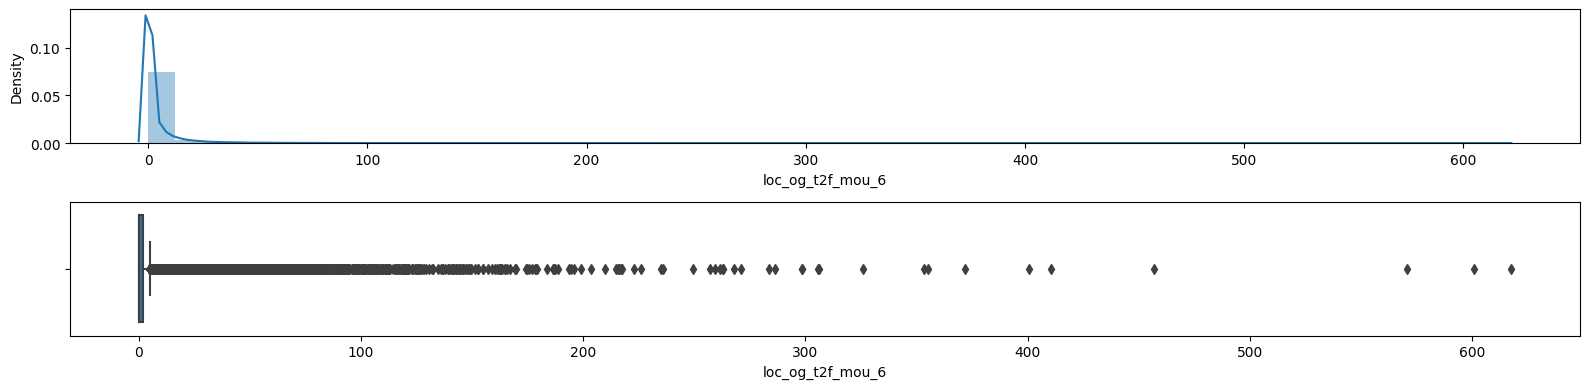

plot feature: loc_og_t2f_mou_7


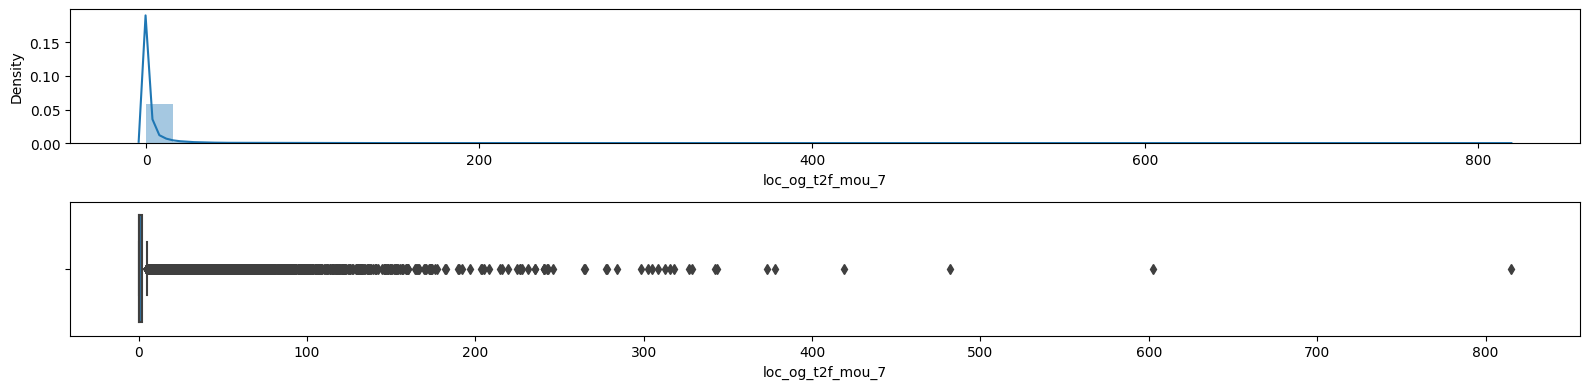

plot feature: loc_og_t2f_mou_8


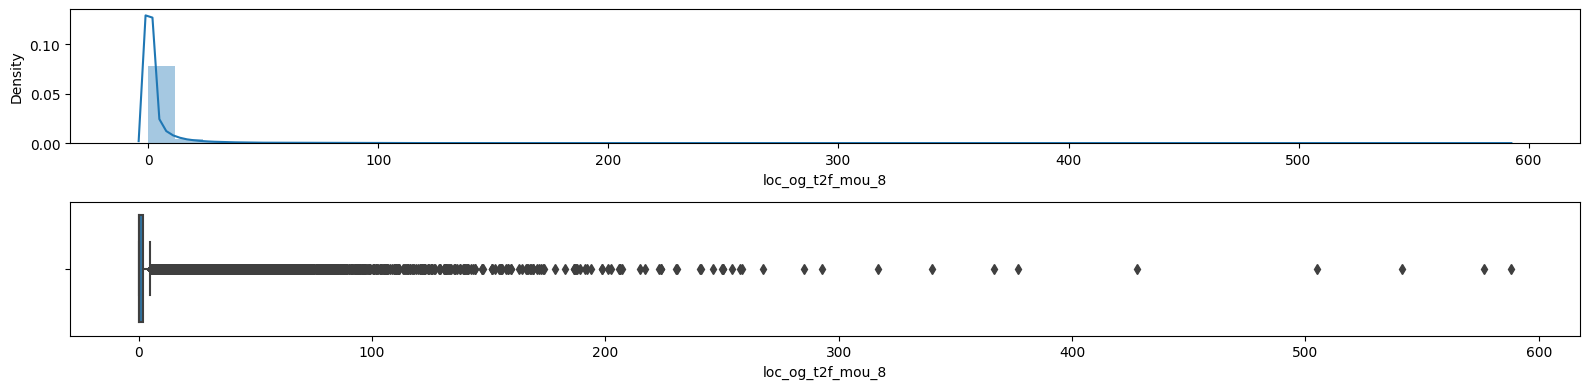

plot feature: loc_og_t2c_mou_6


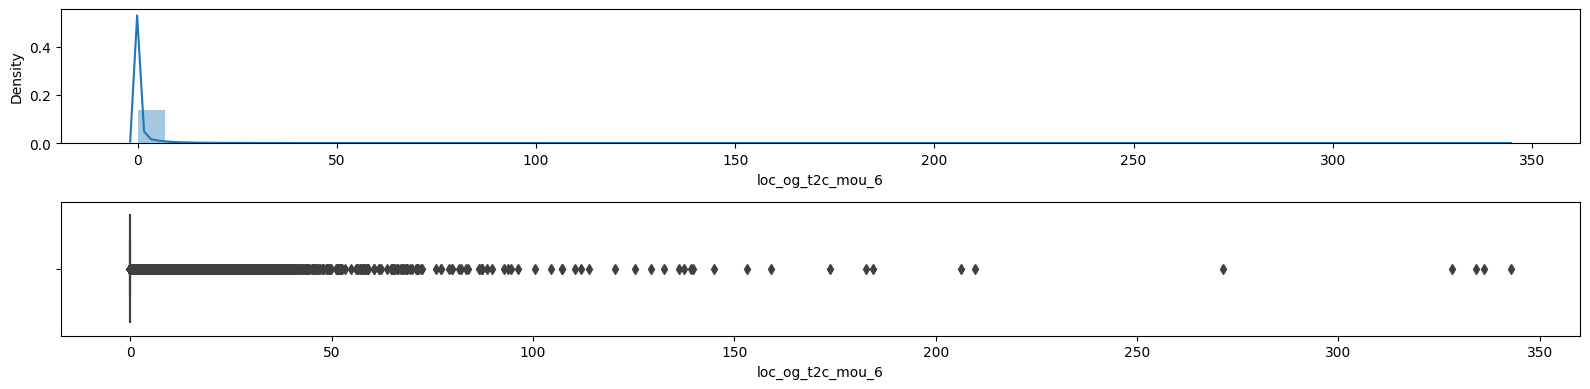

plot feature: loc_og_t2c_mou_7


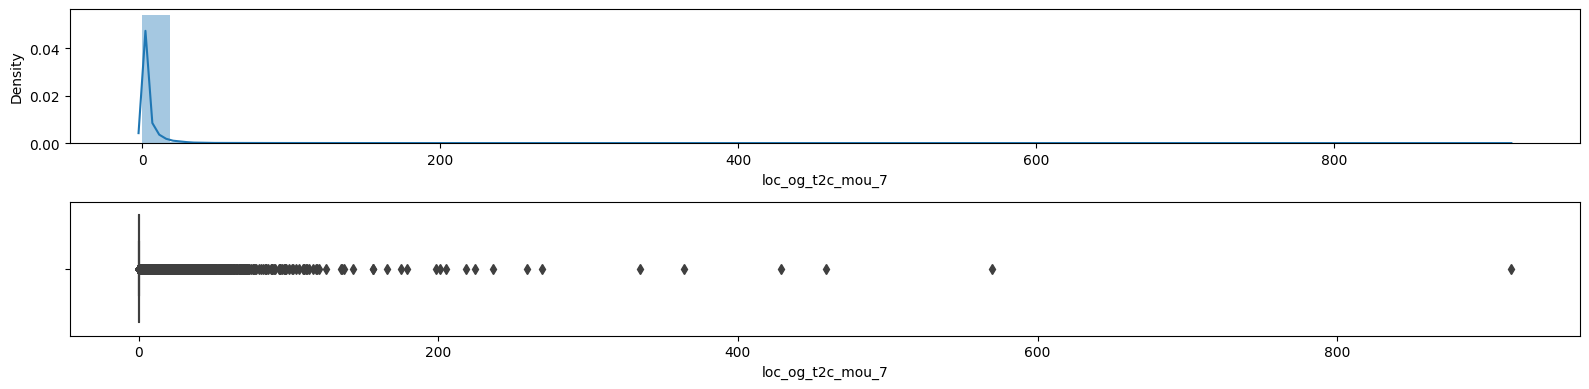

plot feature: loc_og_t2c_mou_8


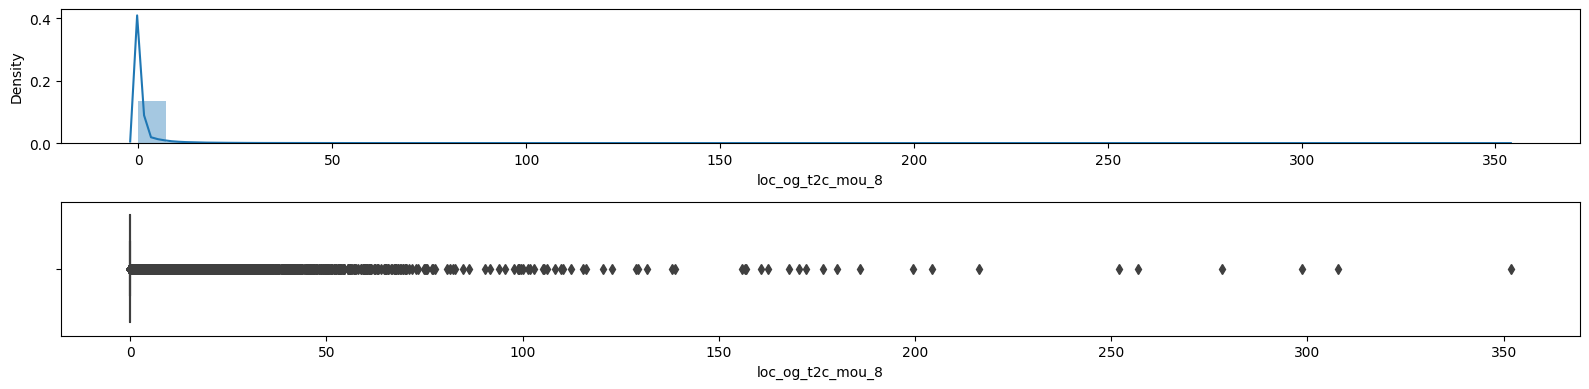

plot feature: loc_og_mou_6


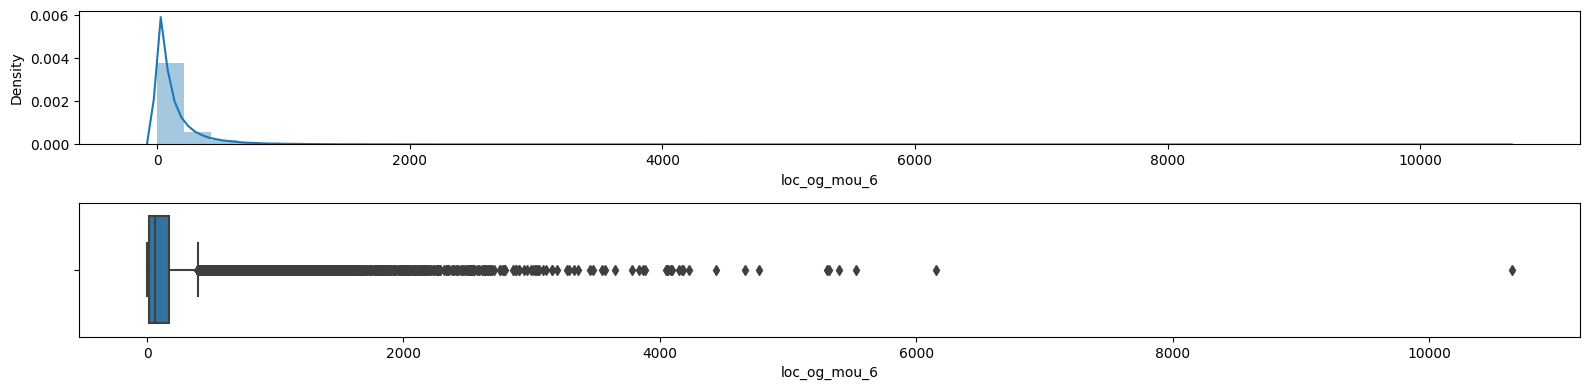

plot feature: loc_og_mou_7


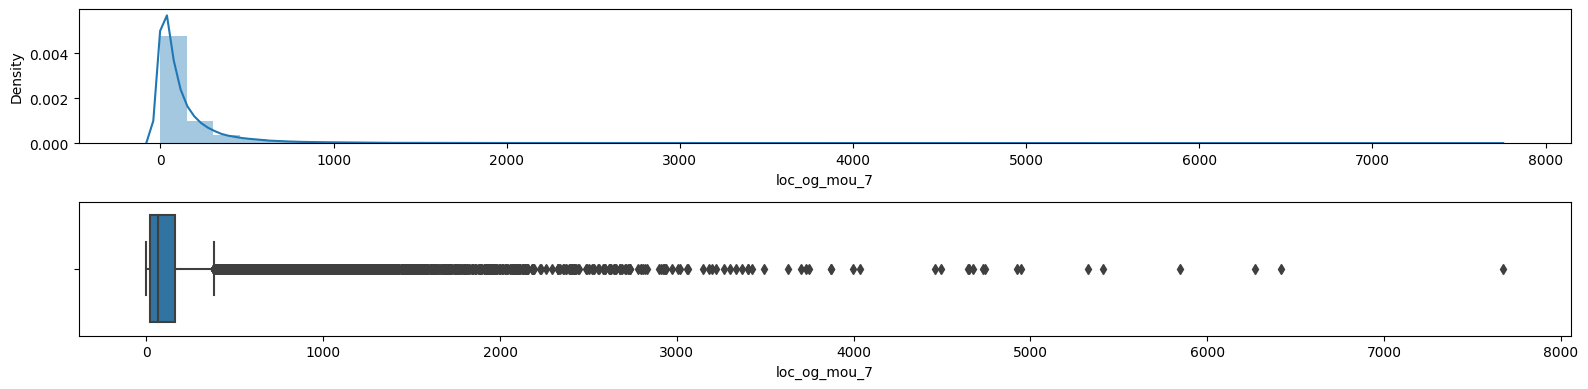

plot feature: loc_og_mou_8


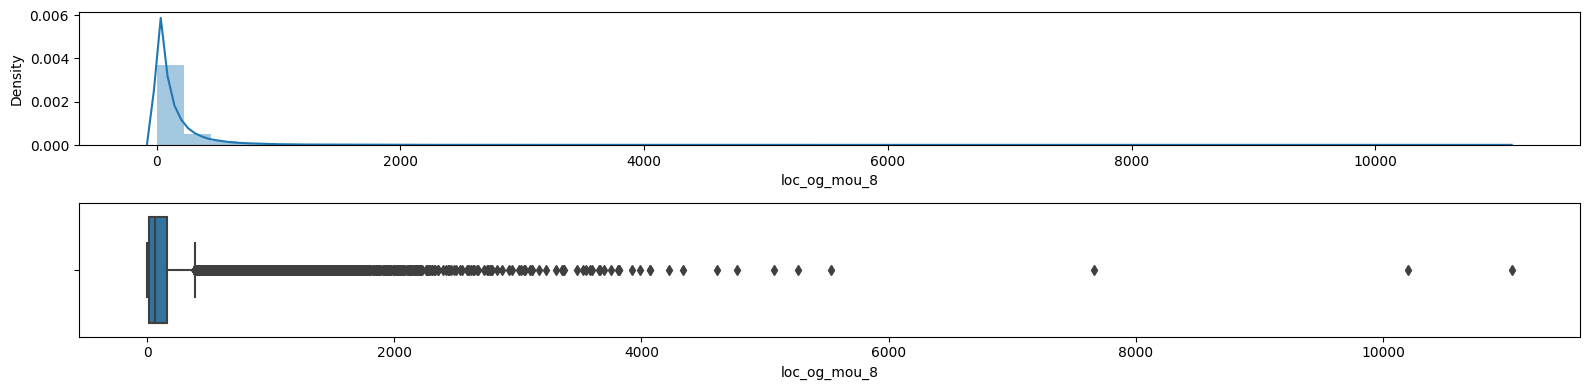

plot feature: std_og_t2t_mou_6


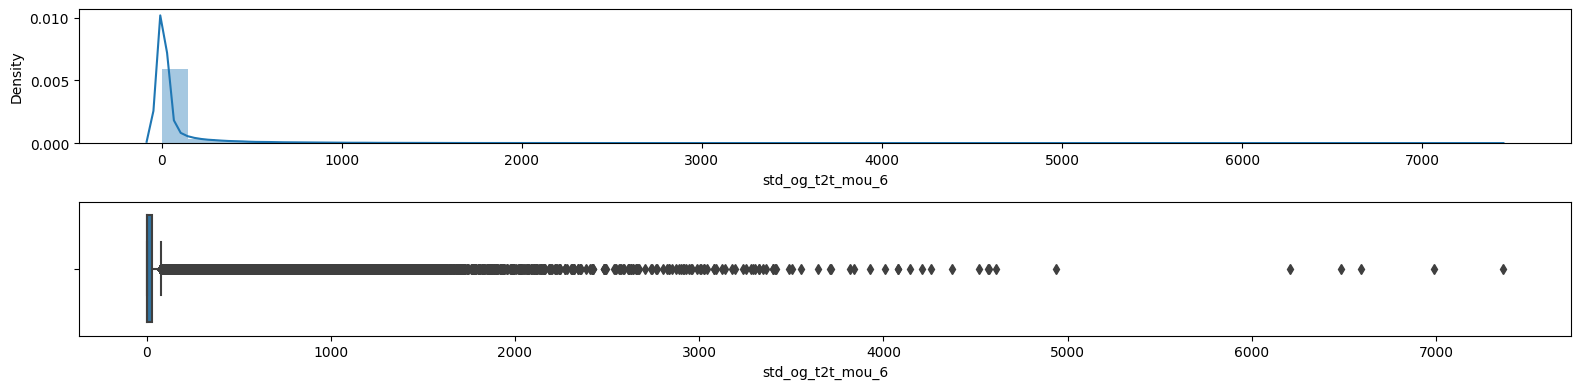

plot feature: std_og_t2t_mou_7


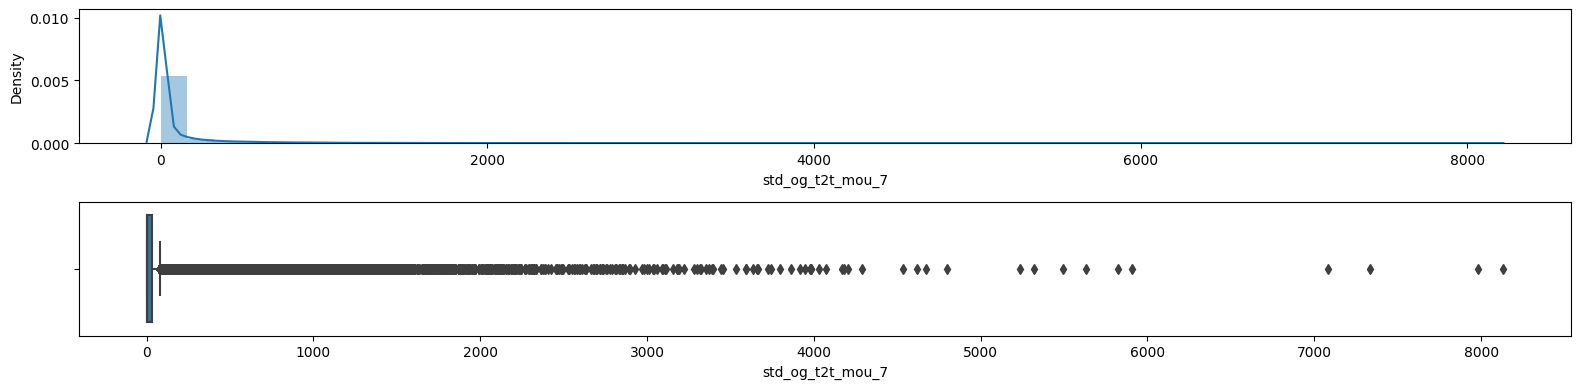

plot feature: std_og_t2t_mou_8


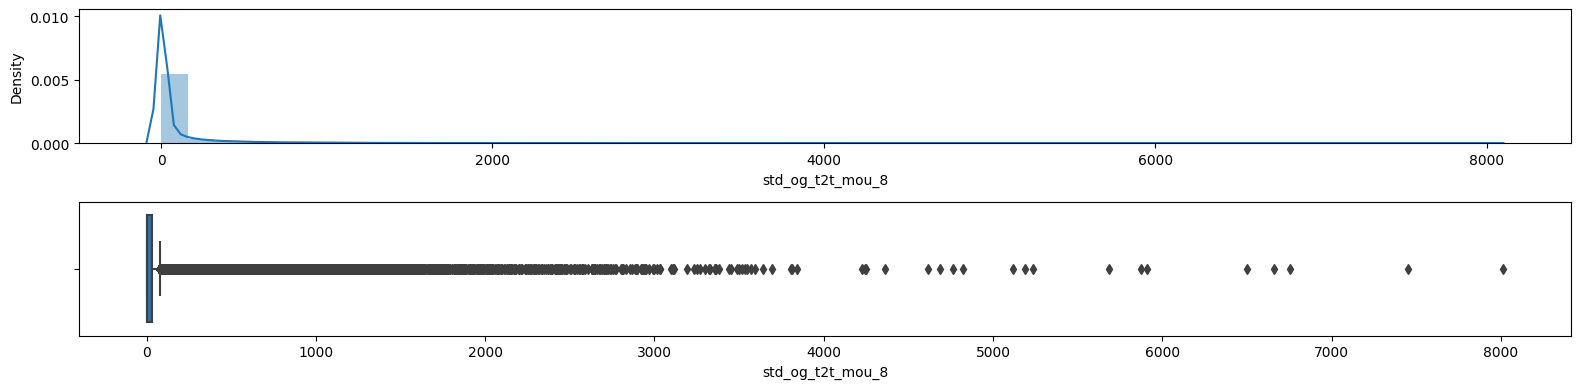

plot feature: std_og_t2m_mou_6


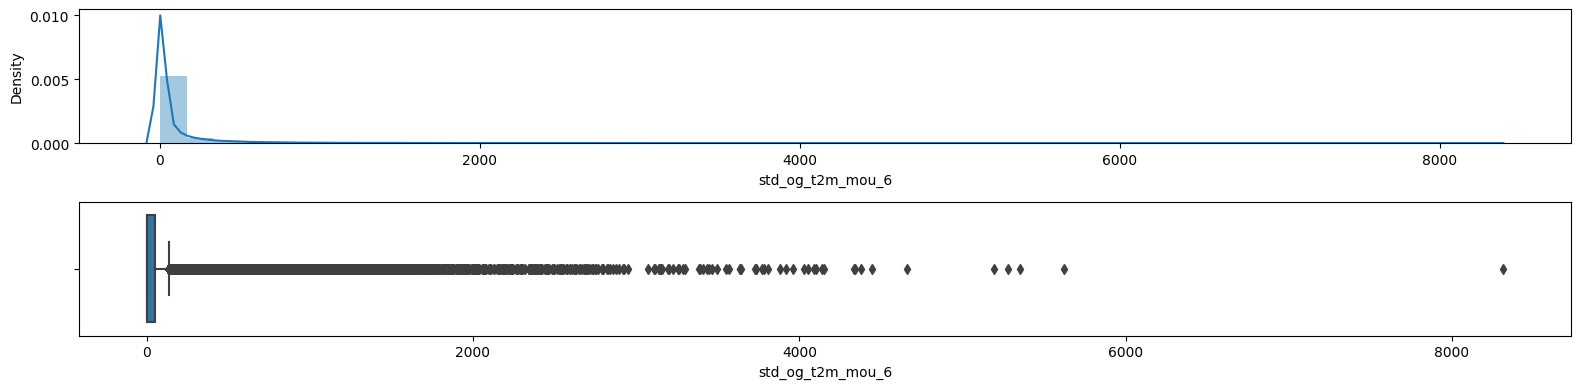

plot feature: std_og_t2m_mou_7


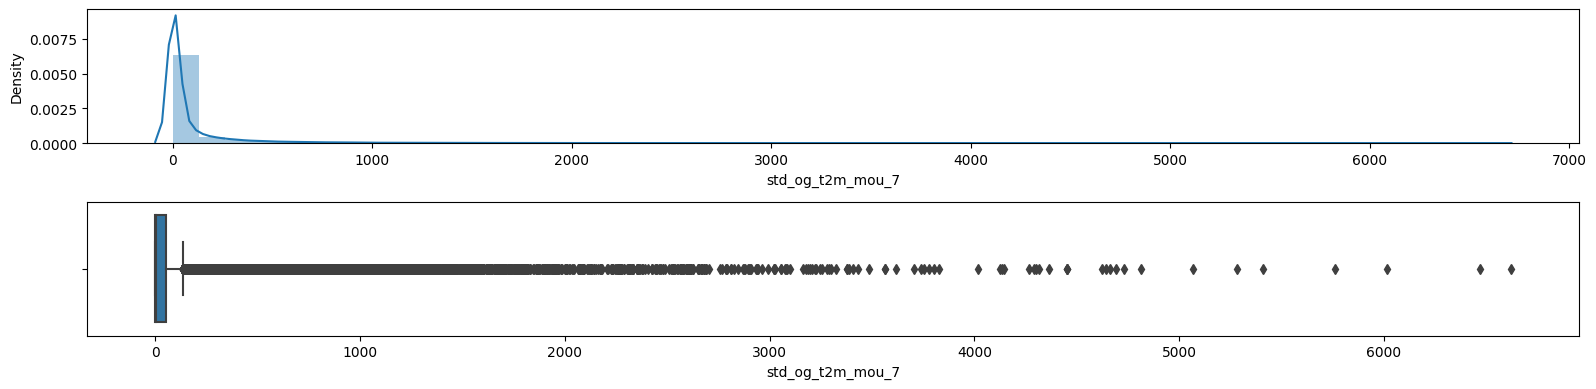

plot feature: std_og_t2m_mou_8


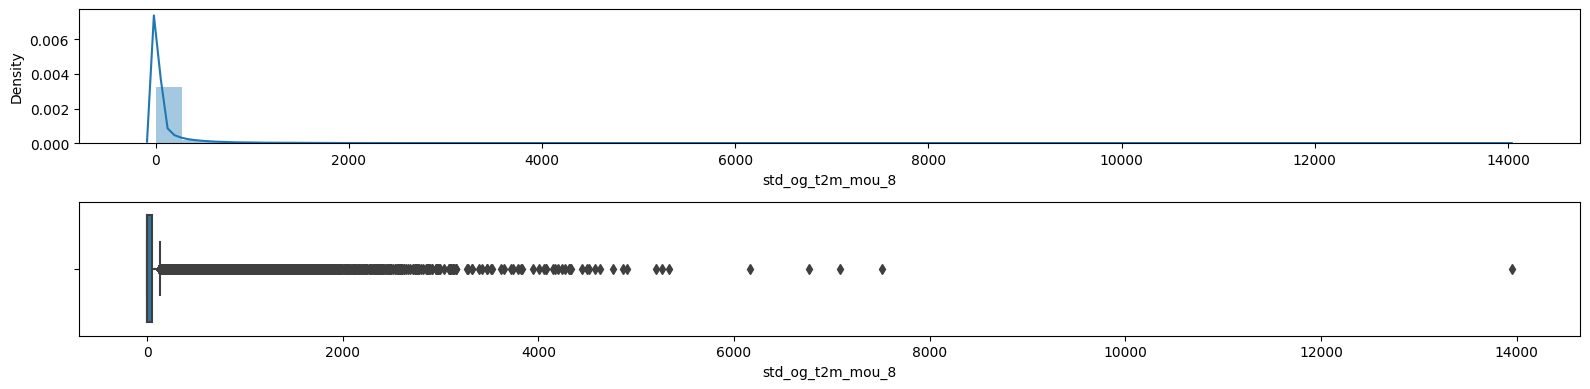

plot feature: std_og_t2f_mou_6


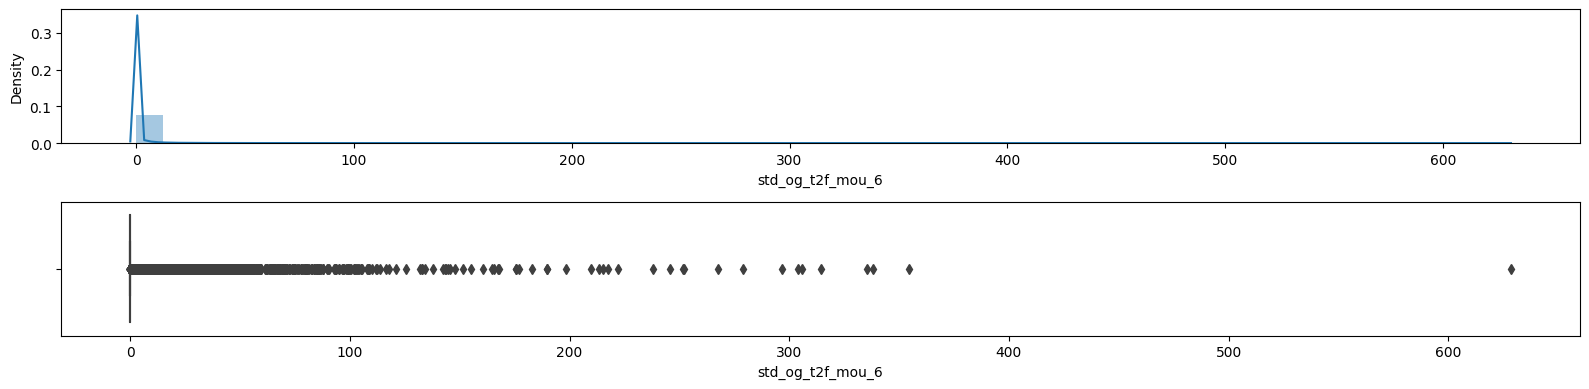

plot feature: std_og_t2f_mou_7


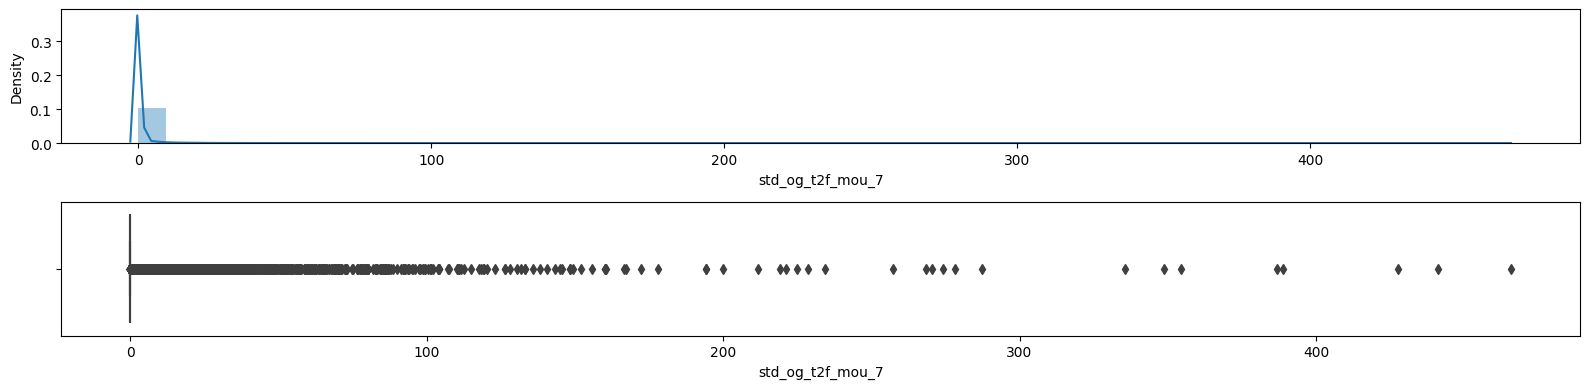

plot feature: std_og_t2f_mou_8


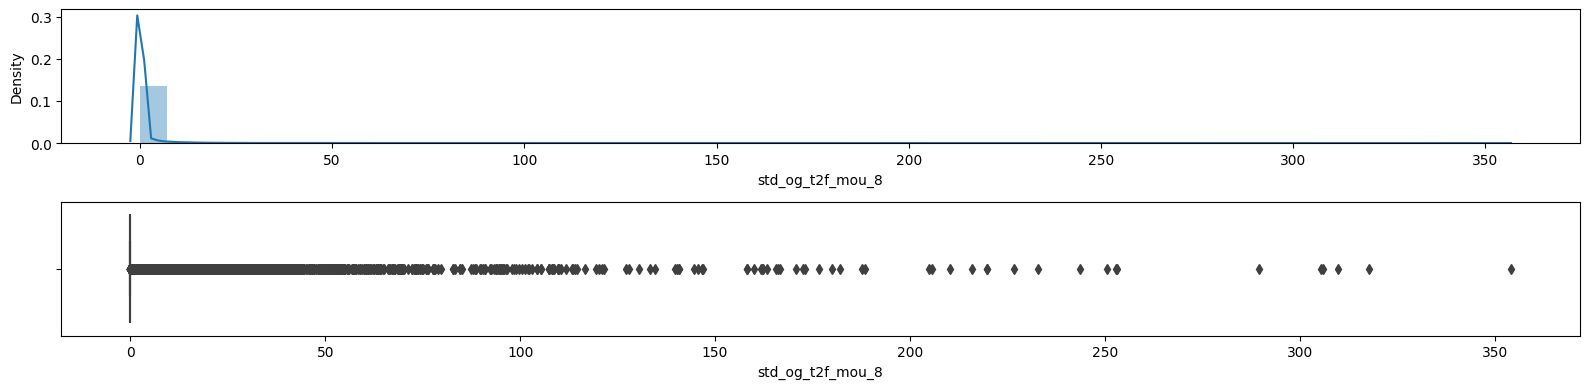

plot feature: std_og_mou_6


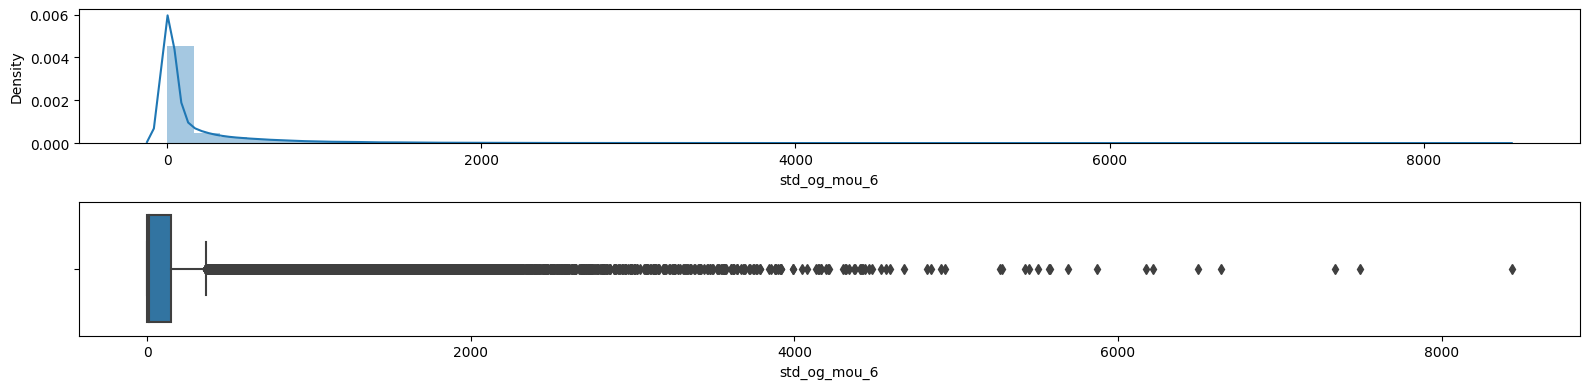

plot feature: std_og_mou_7


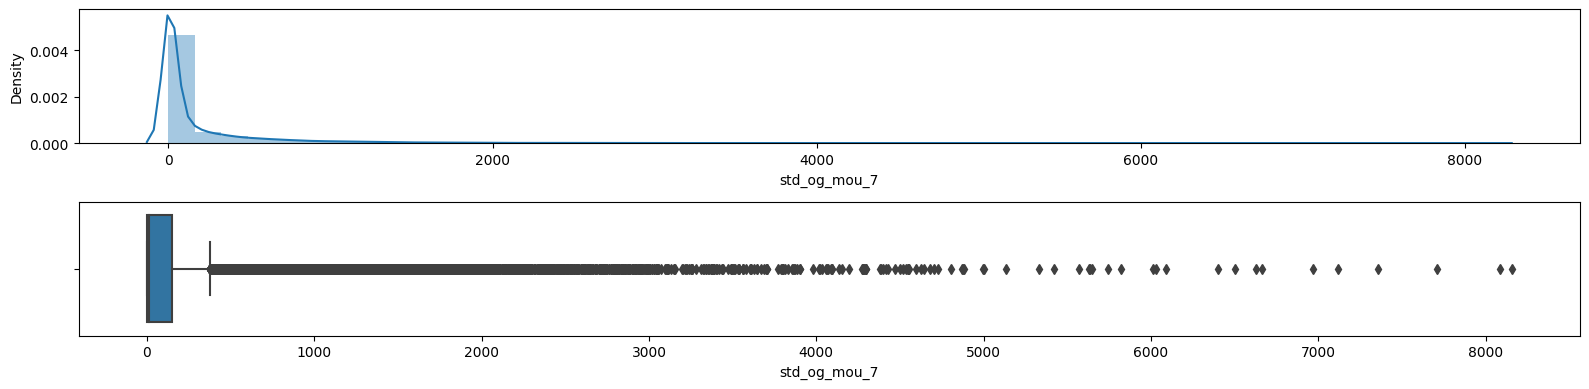

plot feature: std_og_mou_8


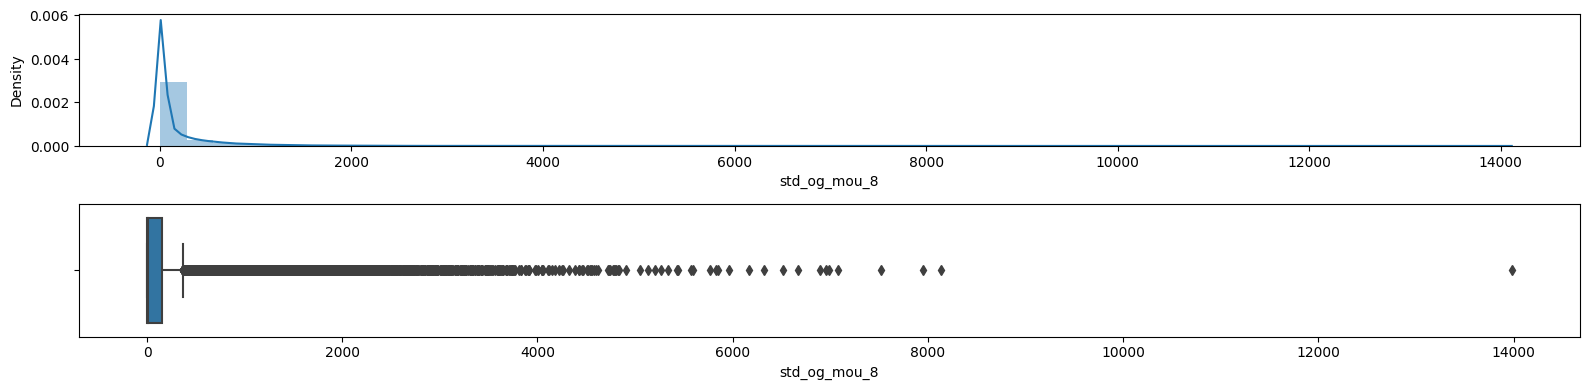

plot feature: isd_og_mou_6


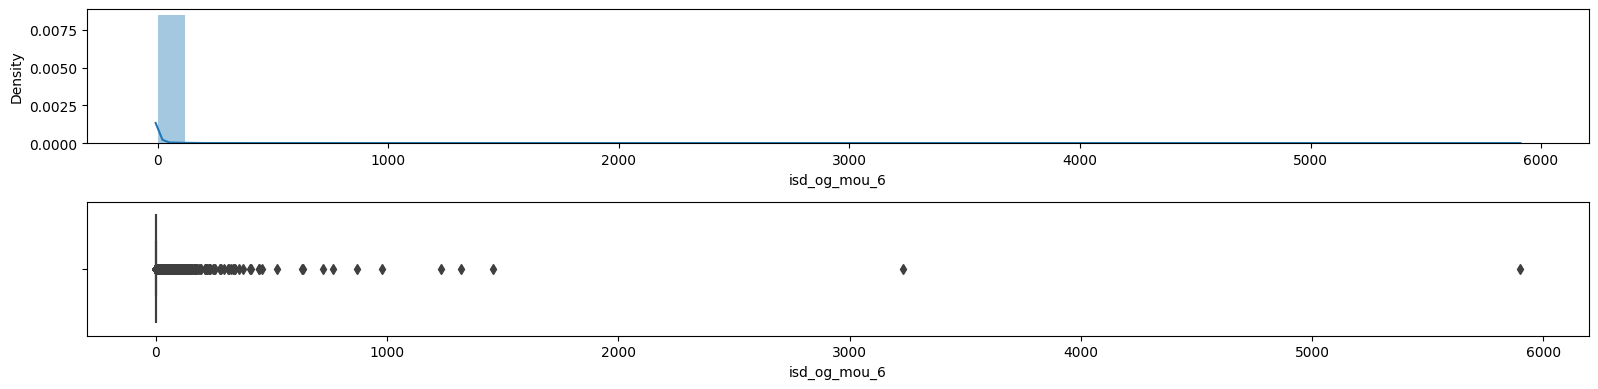

plot feature: isd_og_mou_7


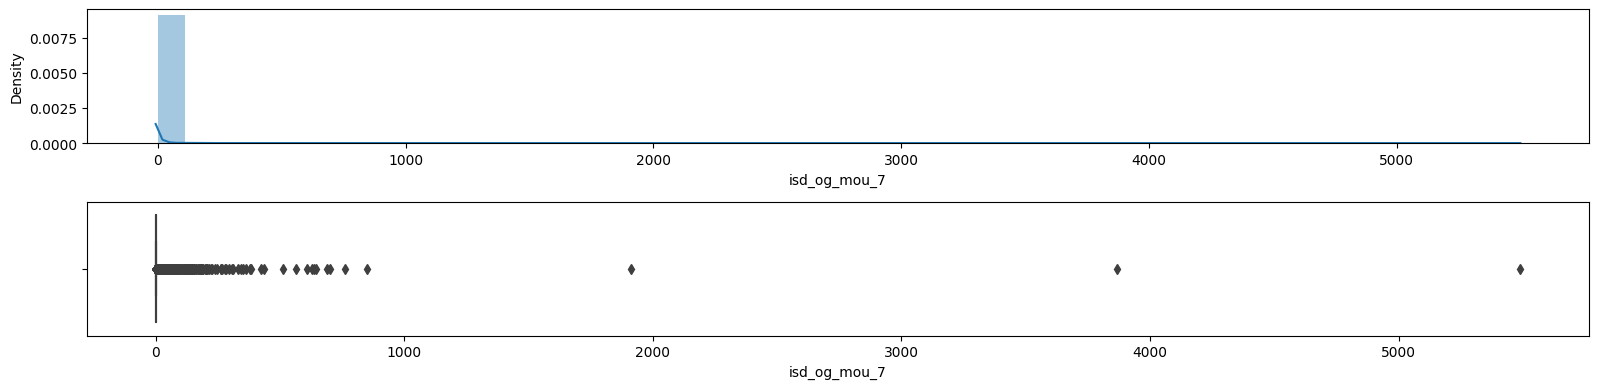

plot feature: isd_og_mou_8


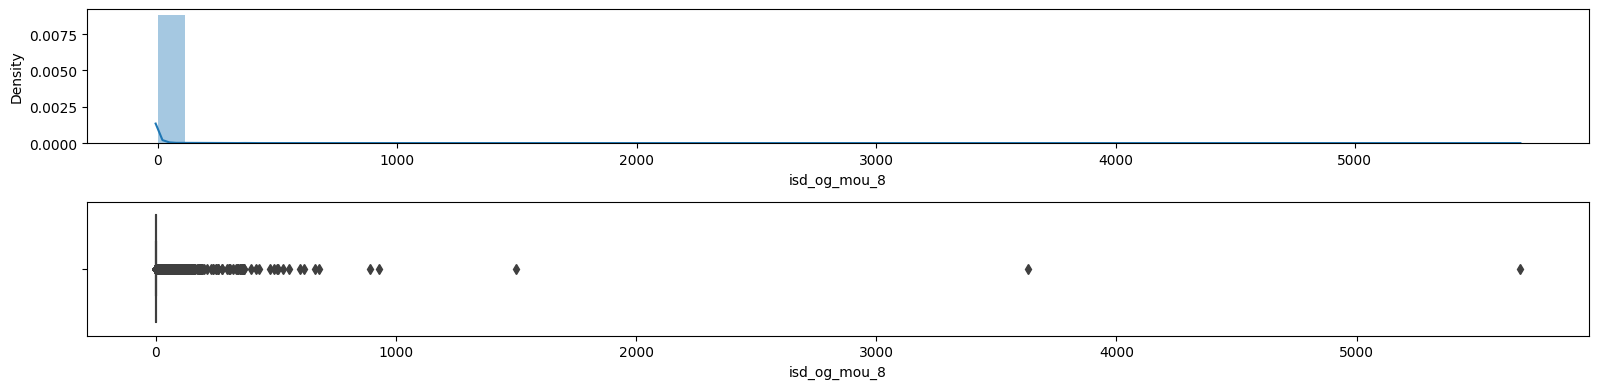

plot feature: spl_og_mou_6


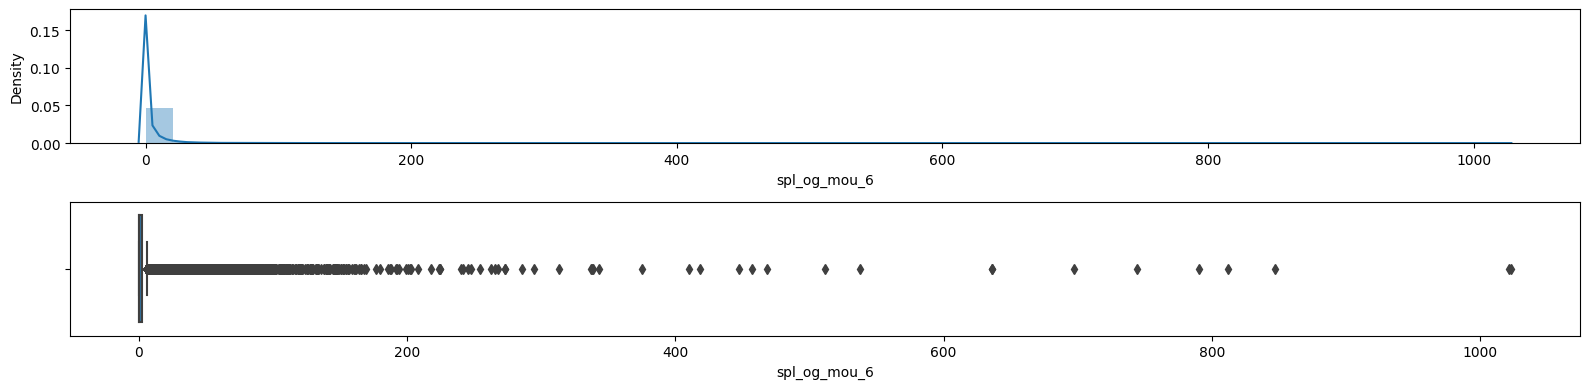

plot feature: spl_og_mou_7


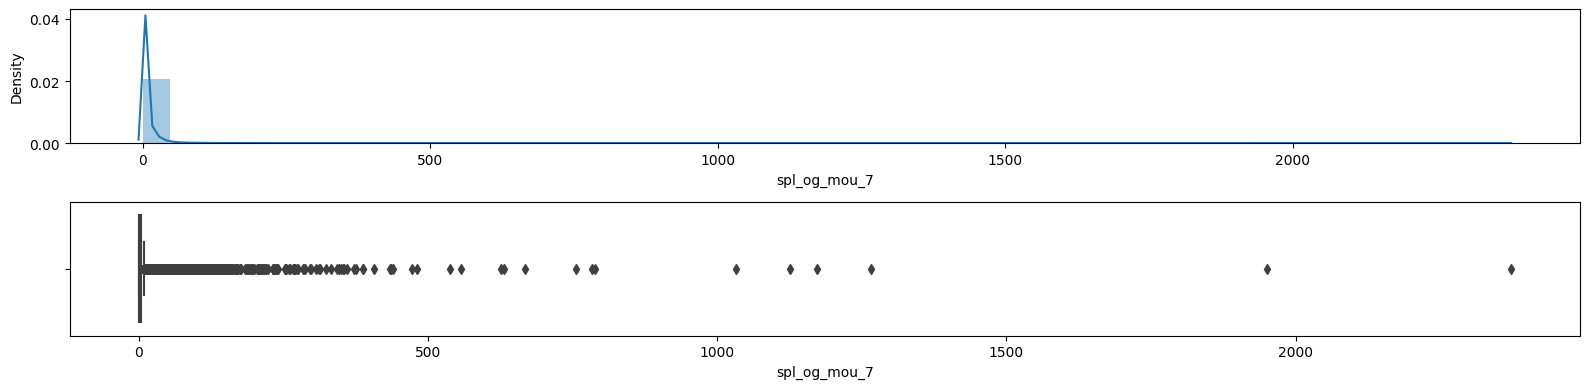

plot feature: spl_og_mou_8


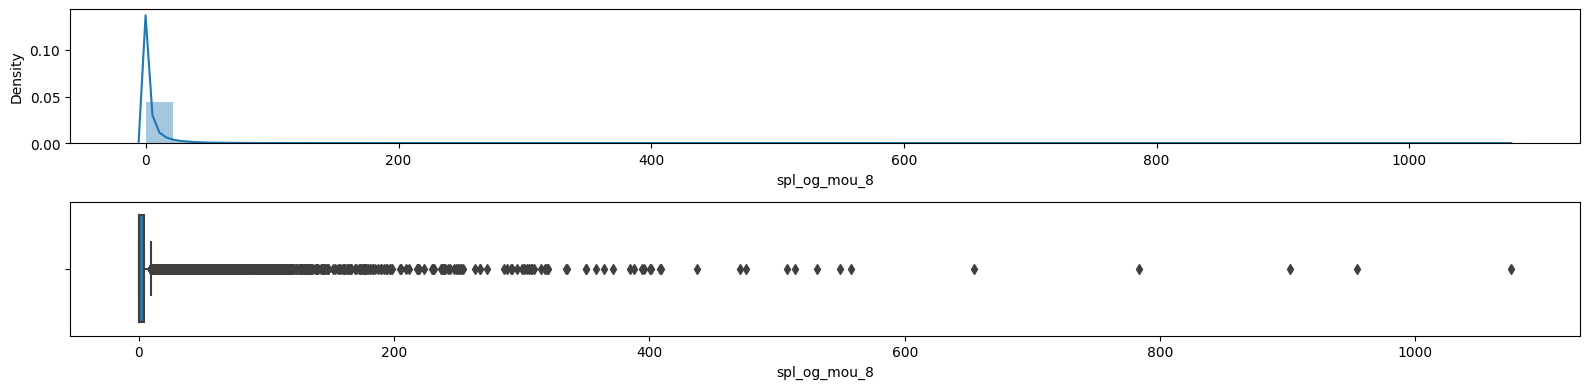

plot feature: total_og_mou_6


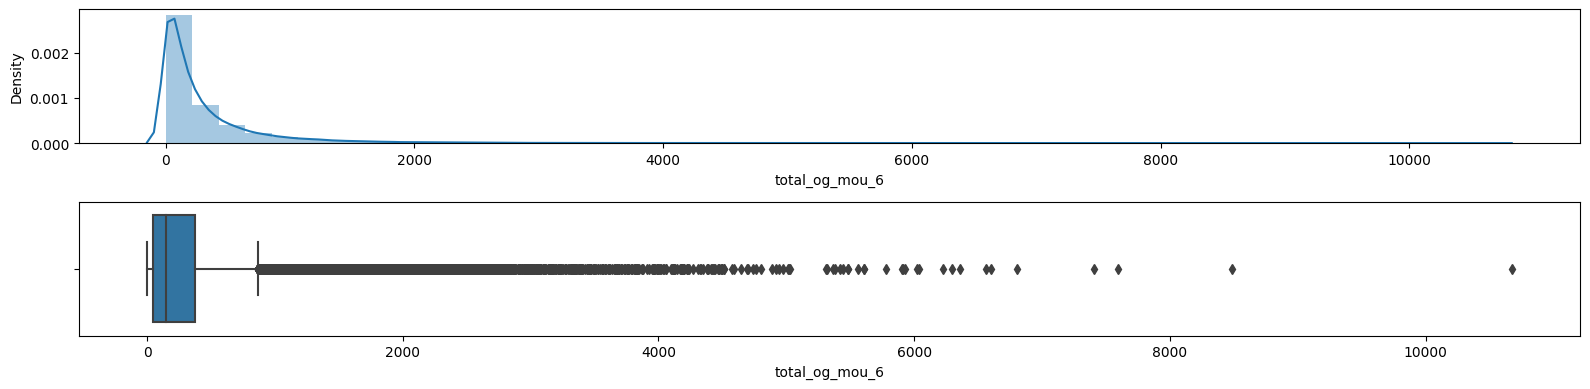

plot feature: total_og_mou_7


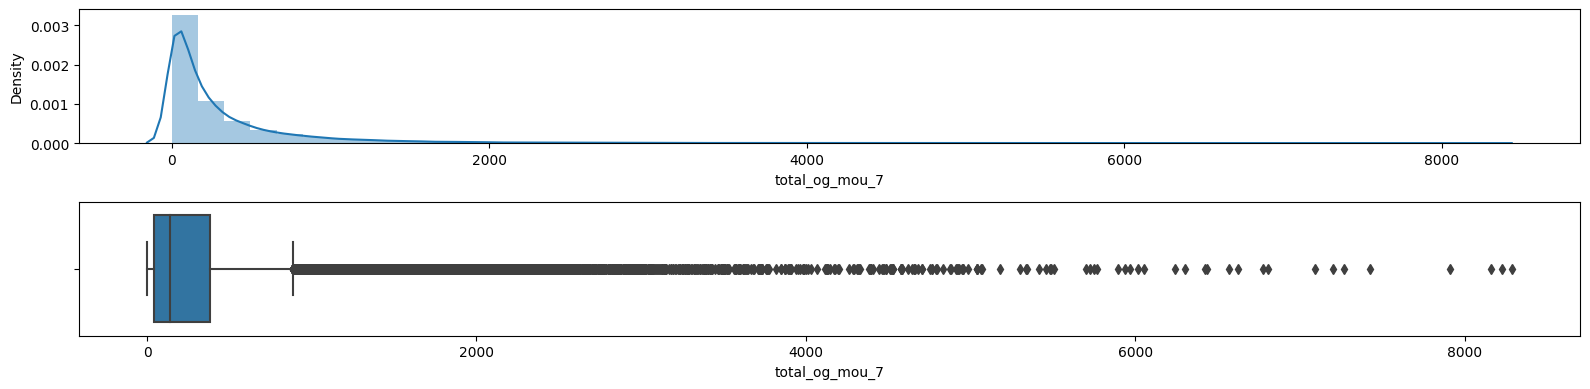

plot feature: total_og_mou_8


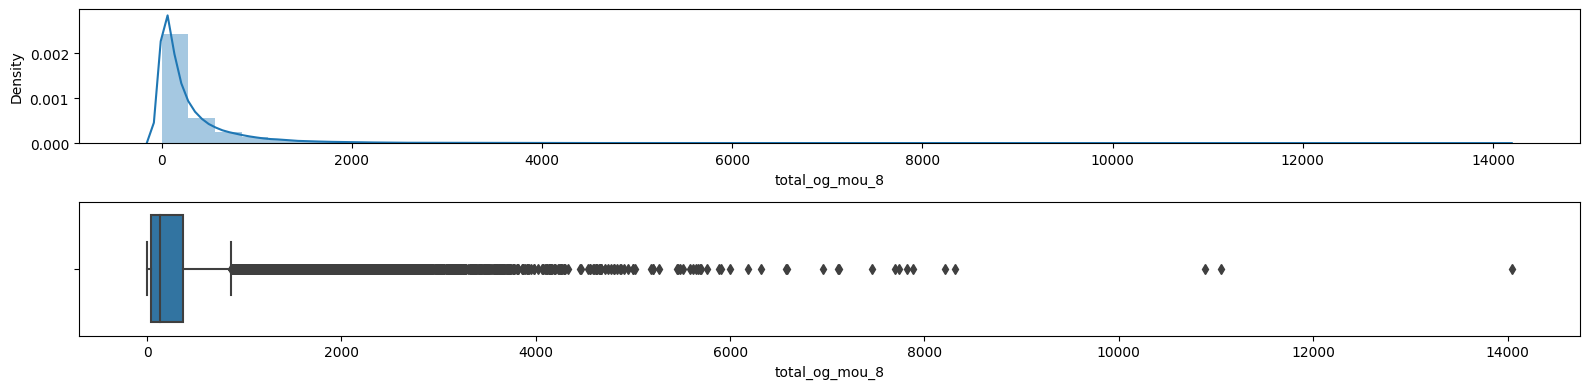

plot feature: loc_ic_t2t_mou_6


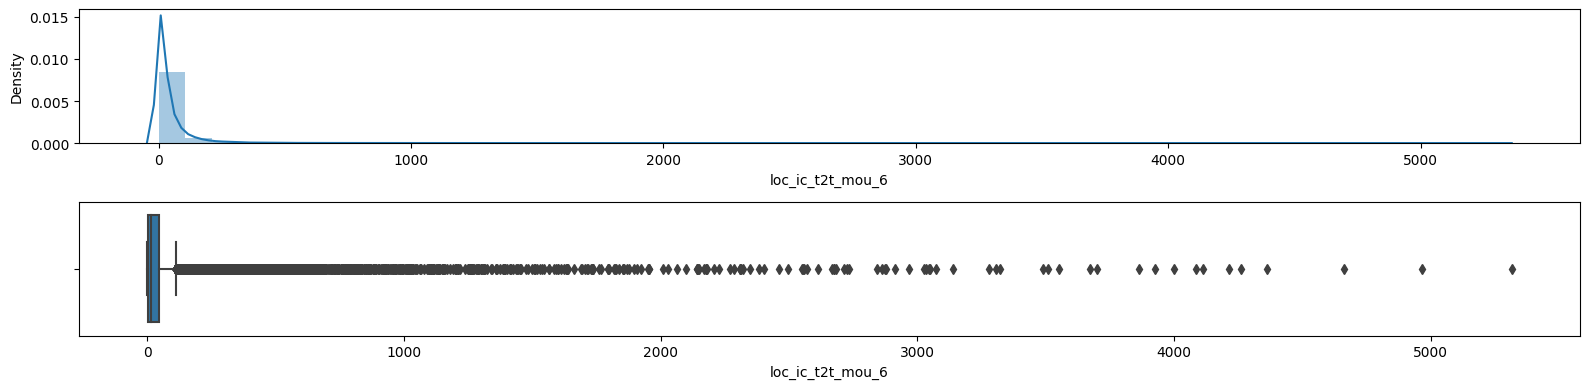

plot feature: loc_ic_t2t_mou_7


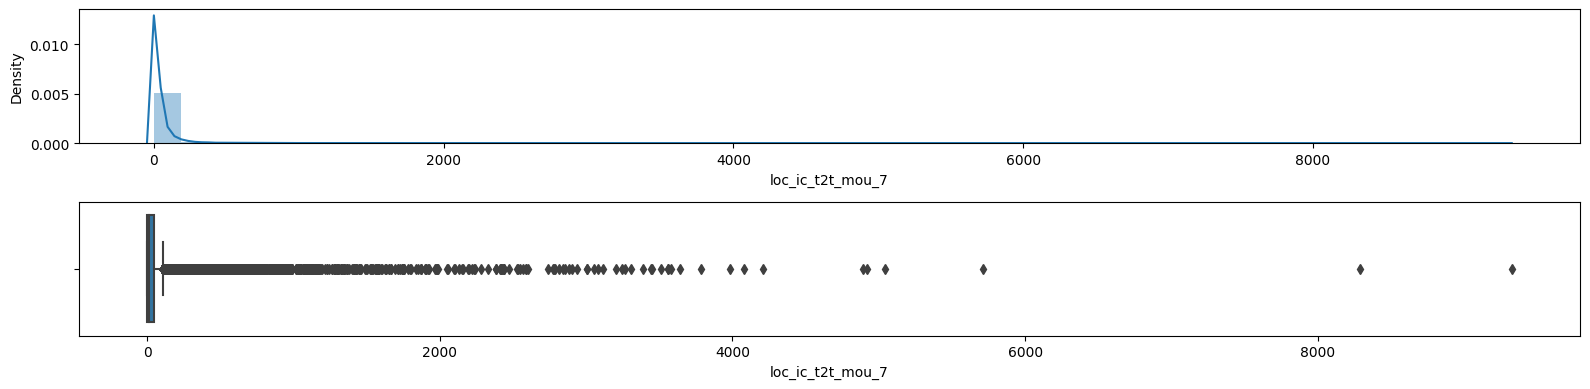

plot feature: loc_ic_t2t_mou_8


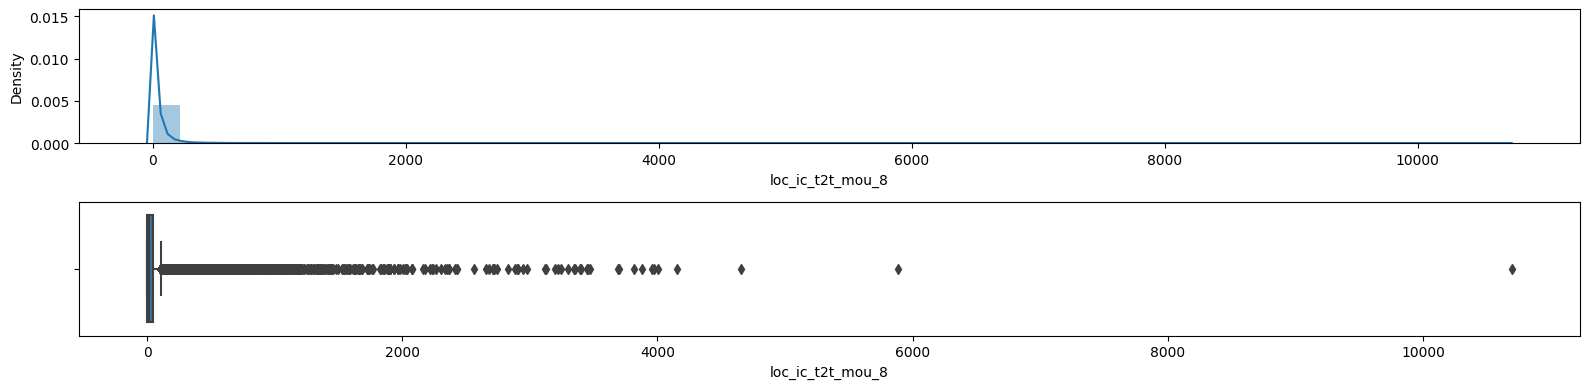

plot feature: loc_ic_t2m_mou_6


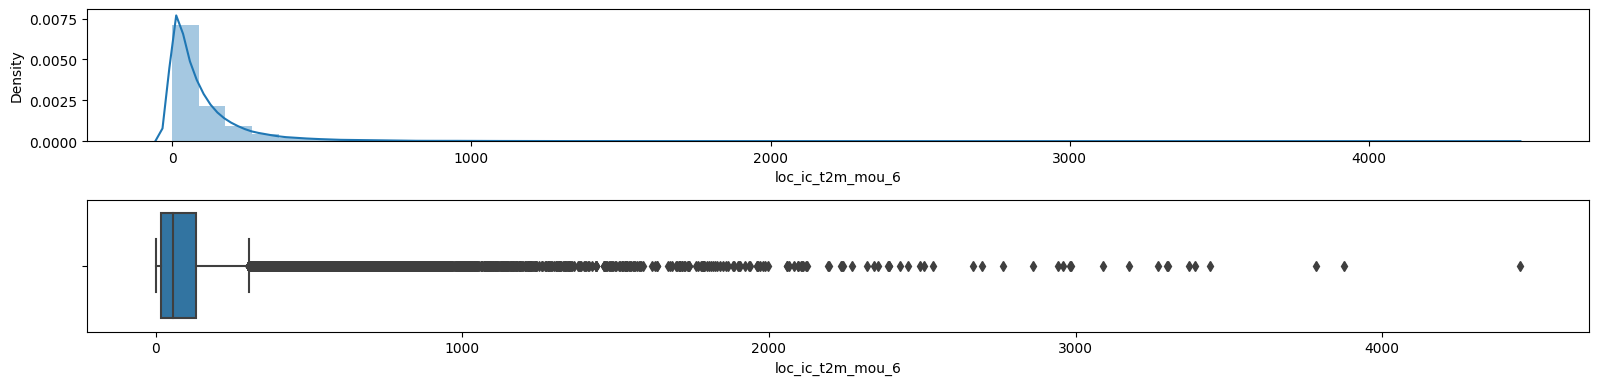

plot feature: loc_ic_t2m_mou_7


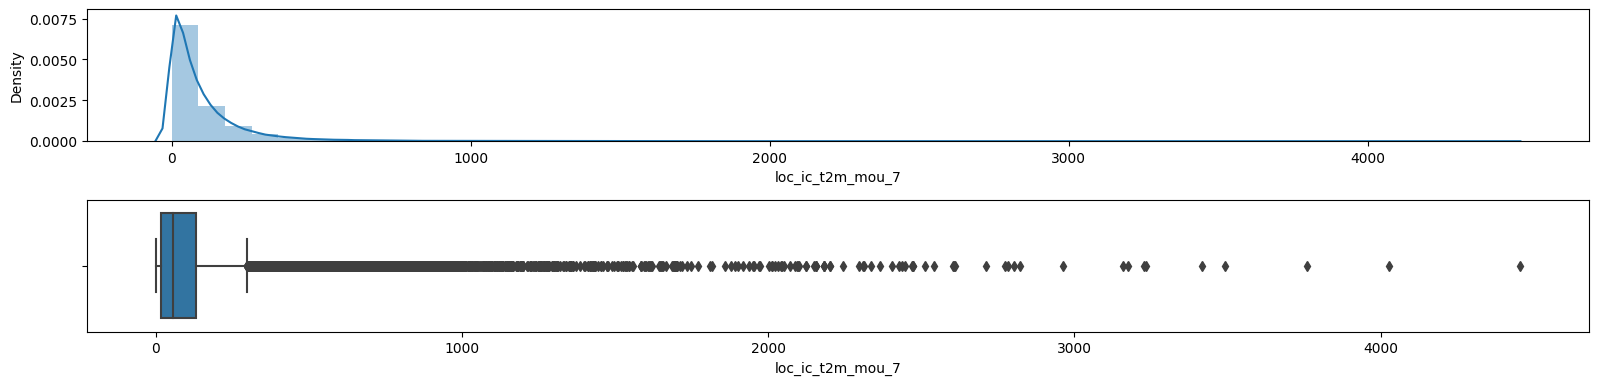

plot feature: loc_ic_t2m_mou_8


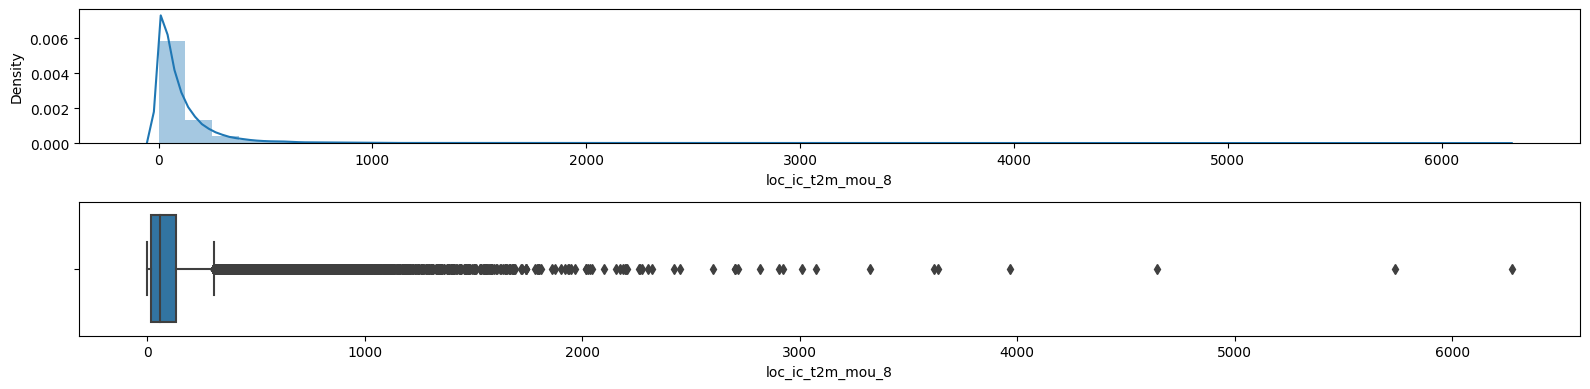

plot feature: loc_ic_t2f_mou_6


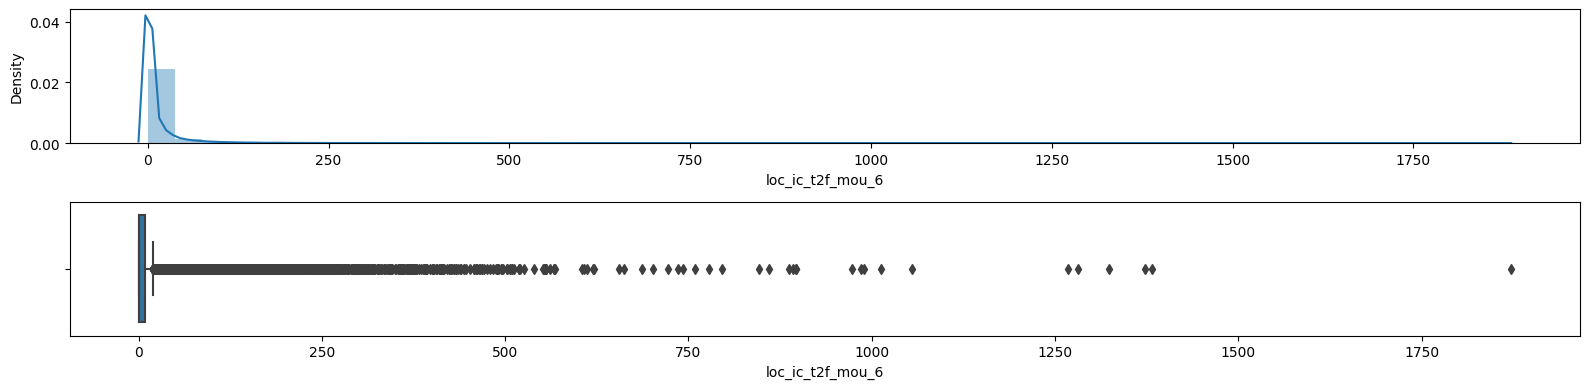

plot feature: loc_ic_t2f_mou_7


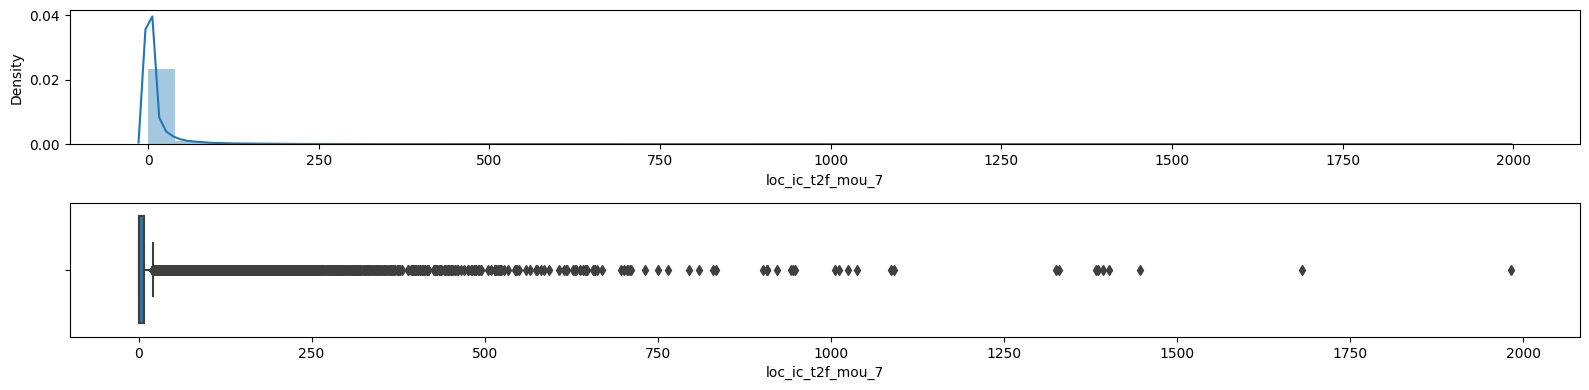

plot feature: loc_ic_t2f_mou_8


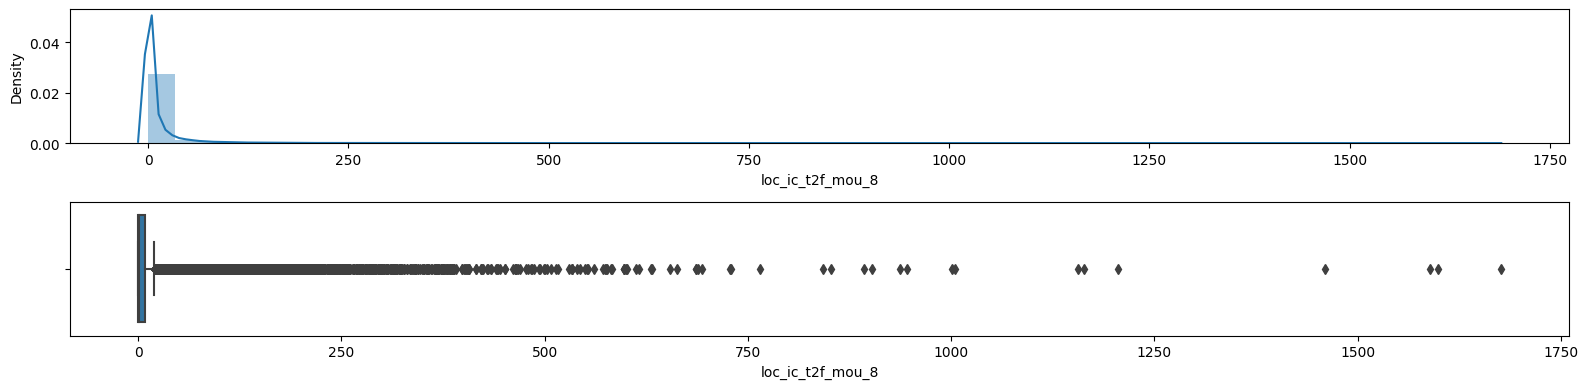

plot feature: loc_ic_mou_6


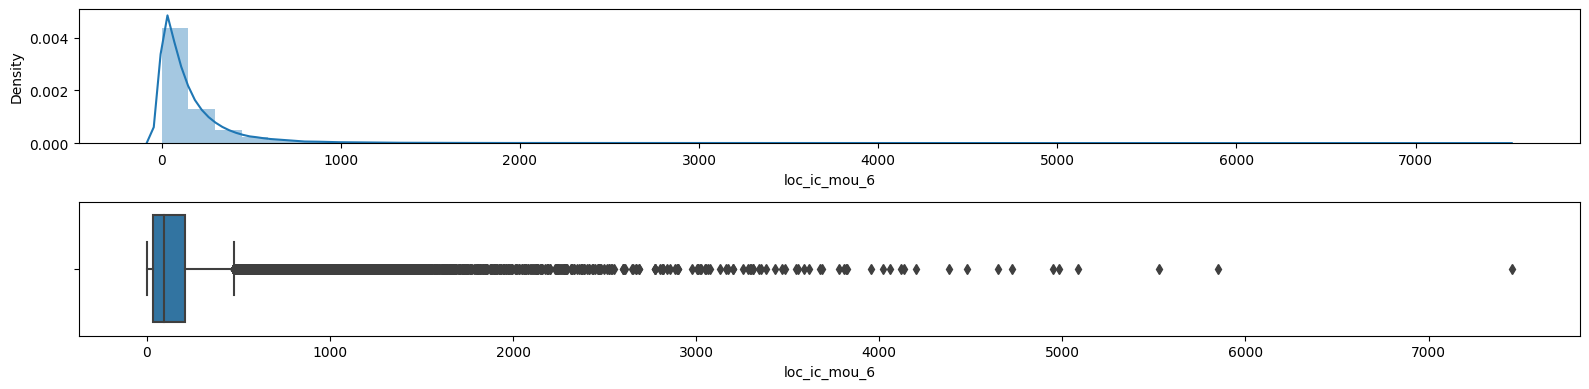

plot feature: loc_ic_mou_7


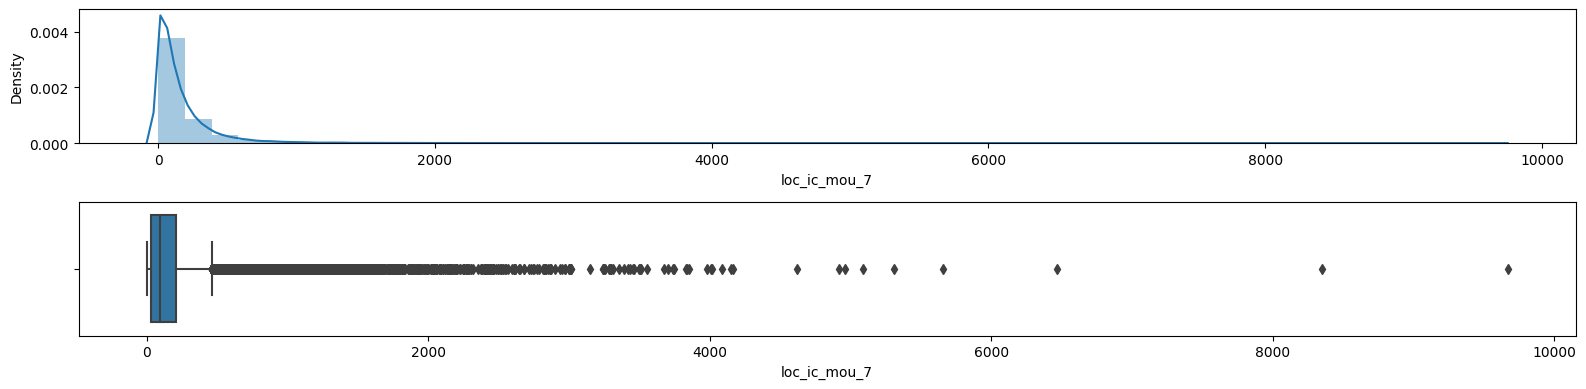

plot feature: loc_ic_mou_8


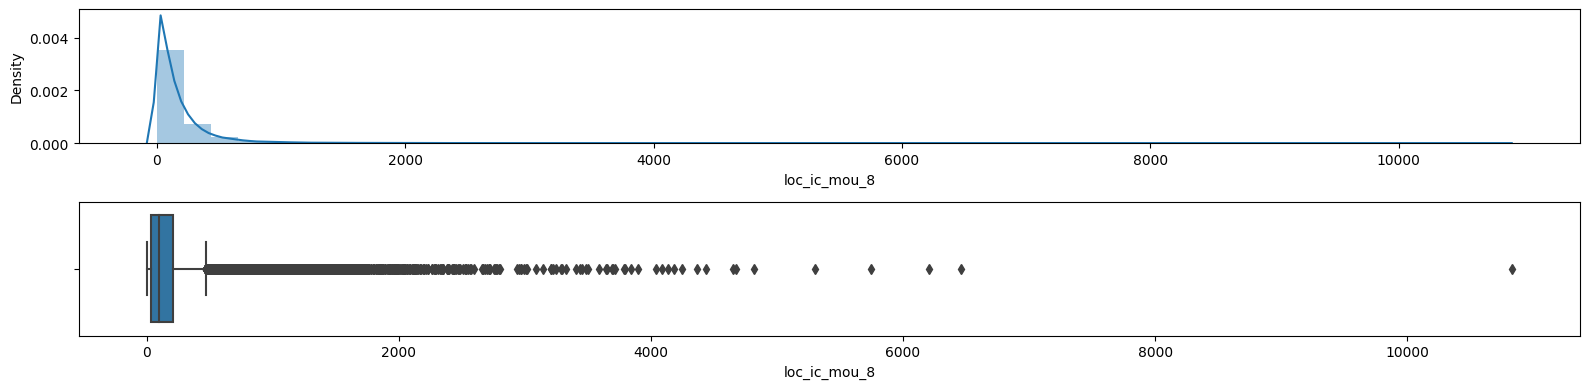

plot feature: std_ic_t2t_mou_6


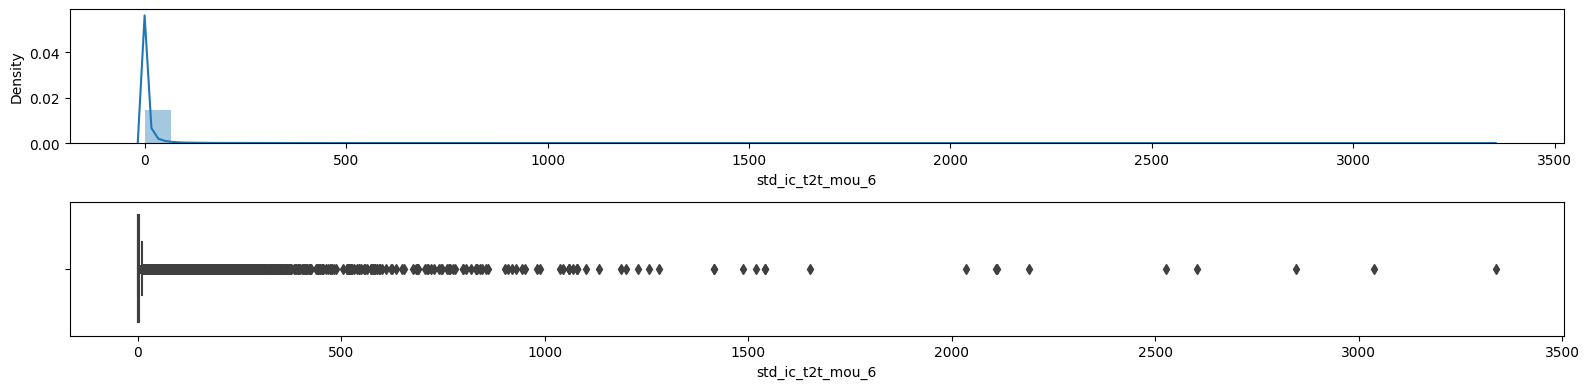

plot feature: std_ic_t2t_mou_7


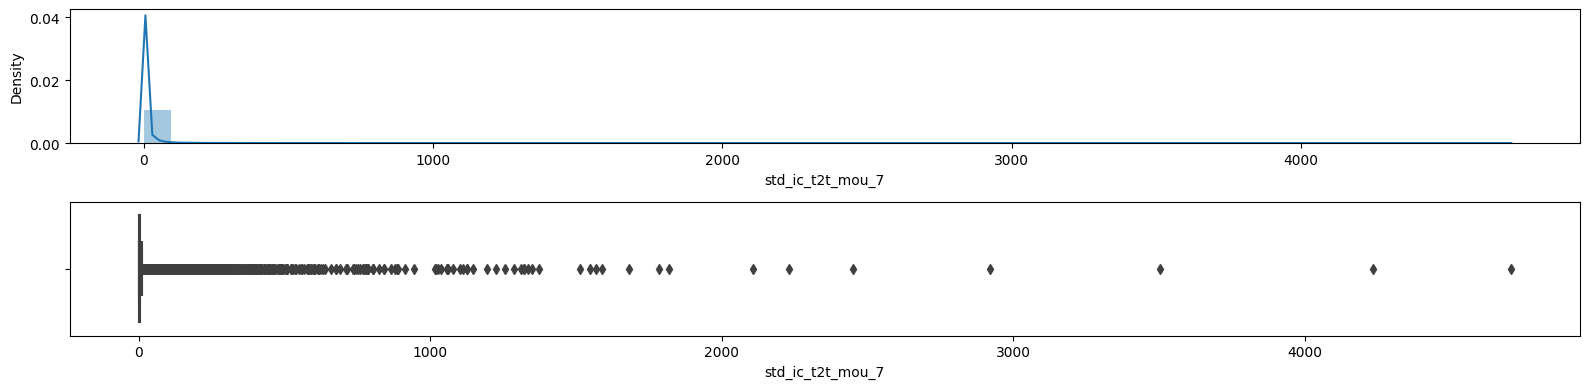

plot feature: std_ic_t2t_mou_8


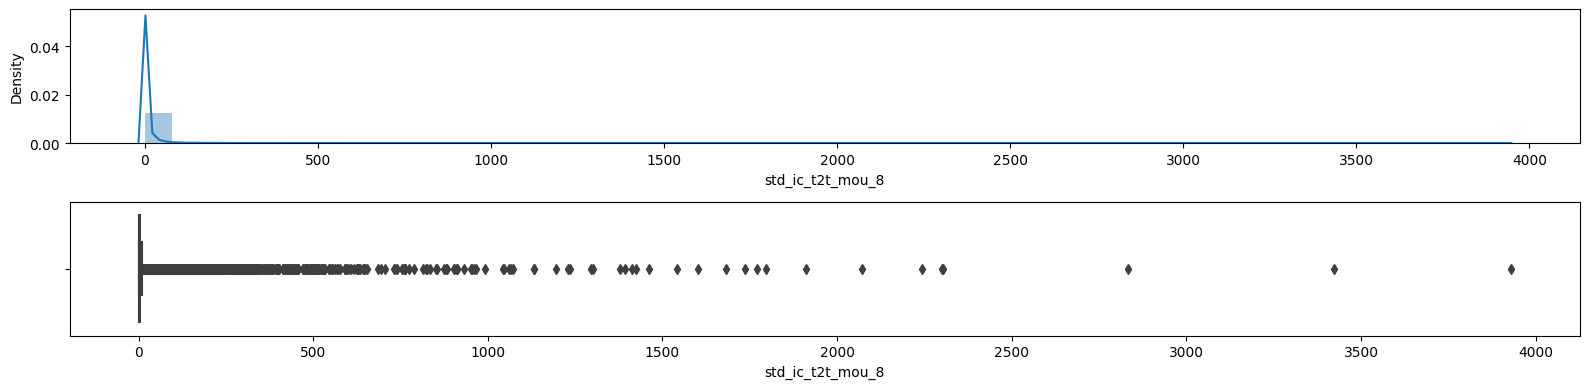

plot feature: std_ic_t2m_mou_6


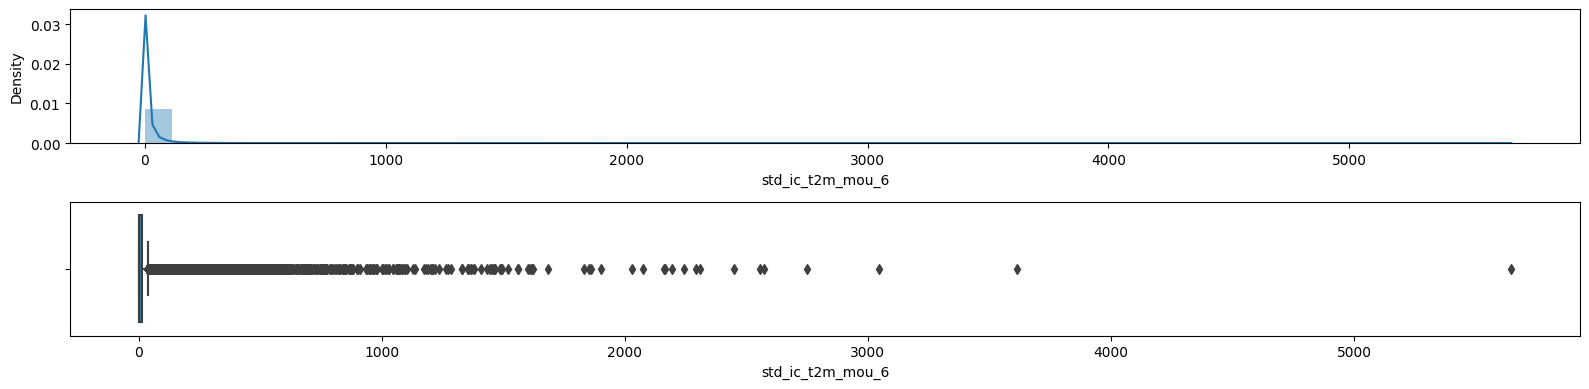

plot feature: std_ic_t2m_mou_7


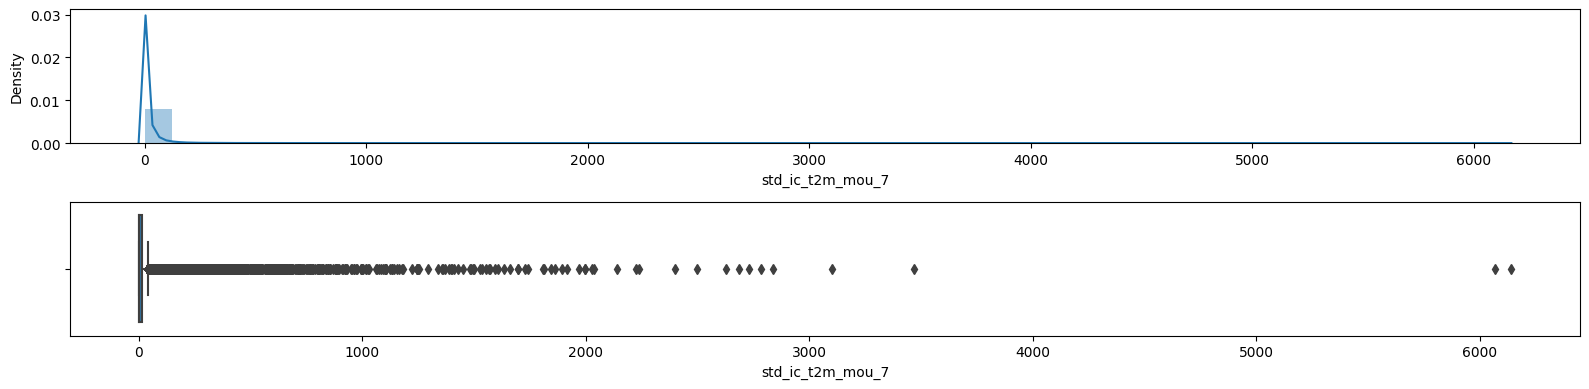

plot feature: std_ic_t2m_mou_8


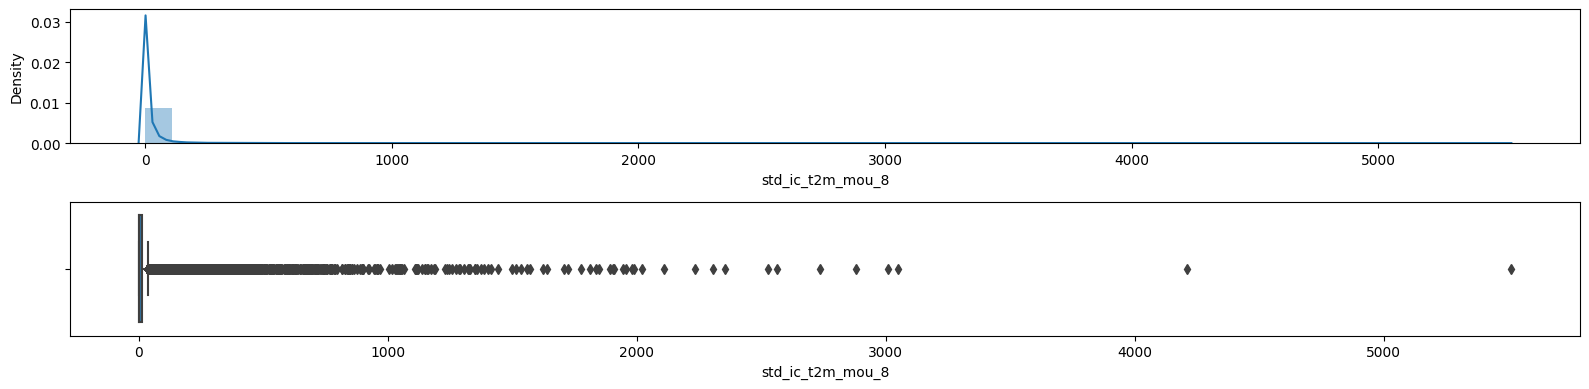

plot feature: std_ic_t2f_mou_6


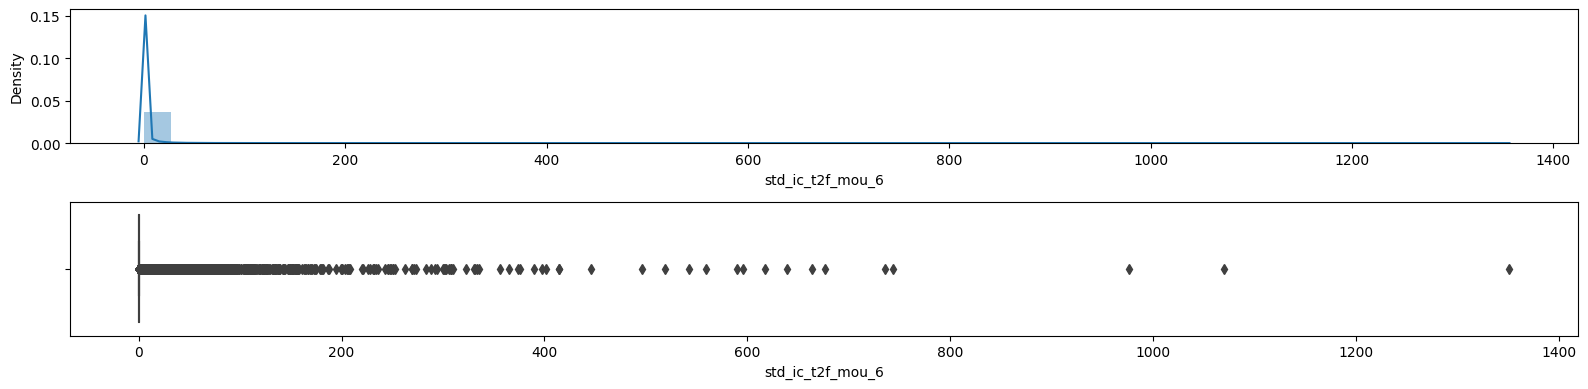

plot feature: std_ic_t2f_mou_7


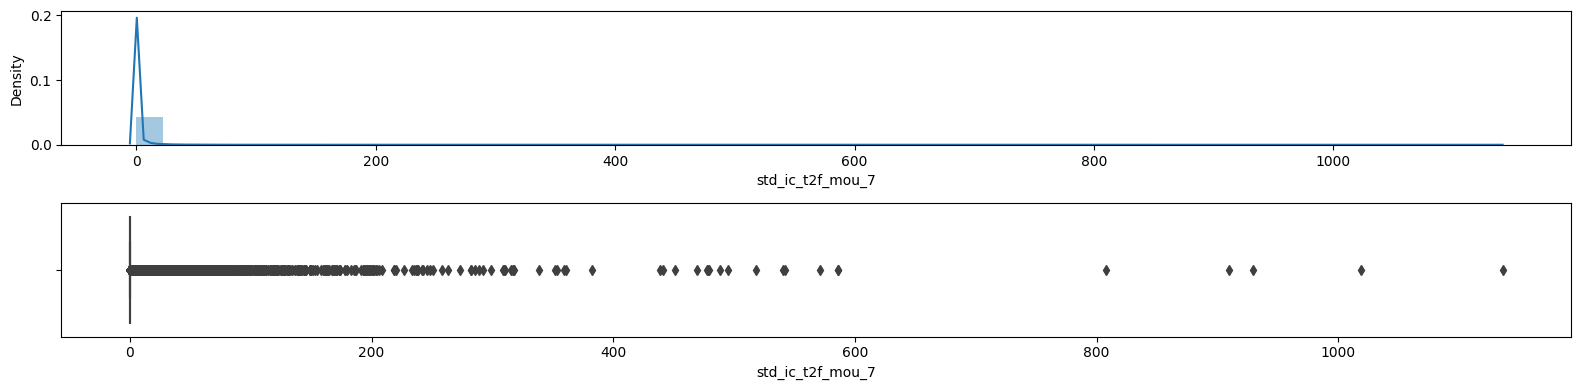

plot feature: std_ic_t2f_mou_8


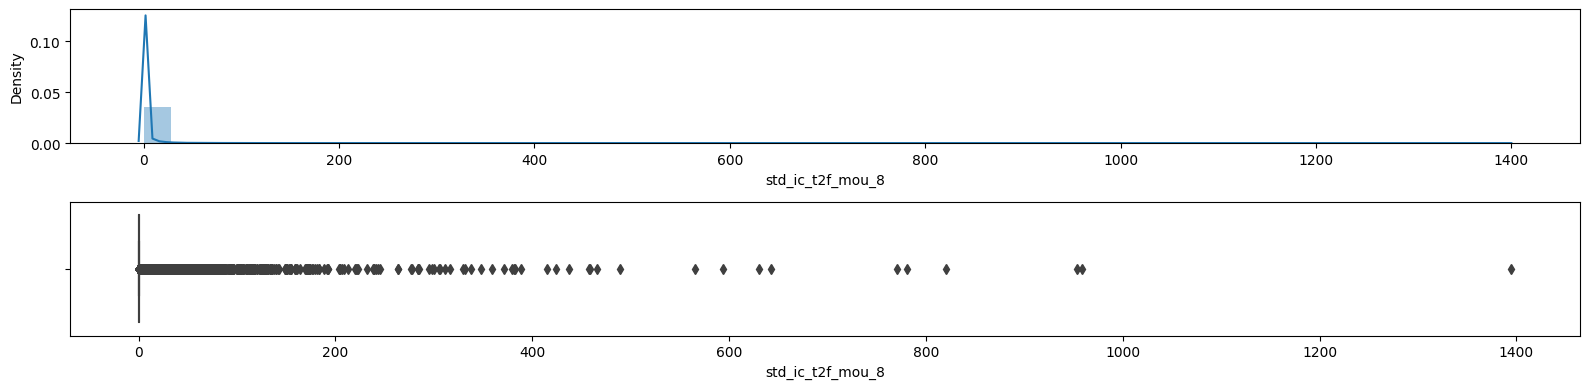

plot feature: std_ic_mou_6


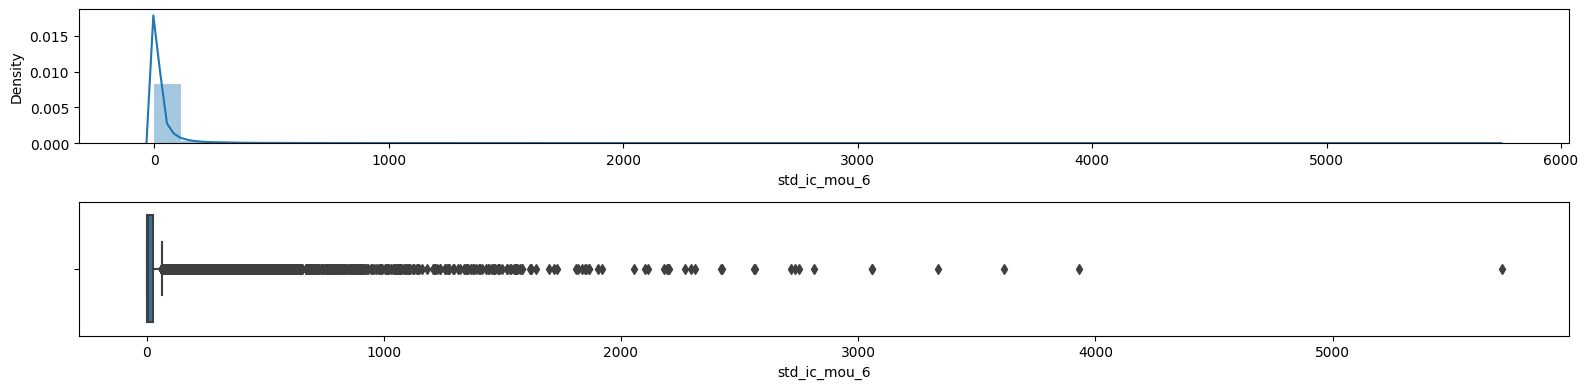

plot feature: std_ic_mou_7


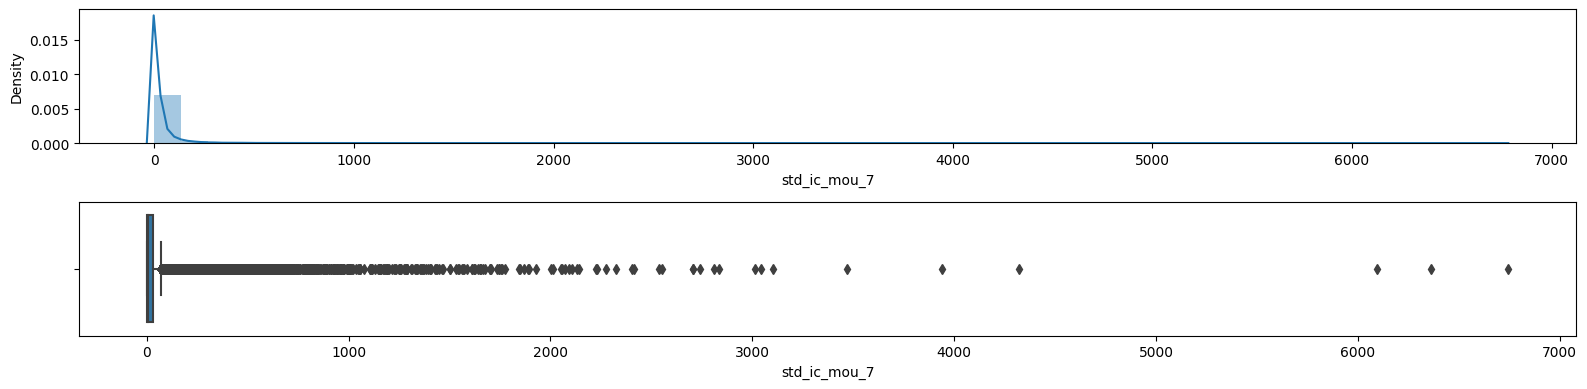

plot feature: std_ic_mou_8


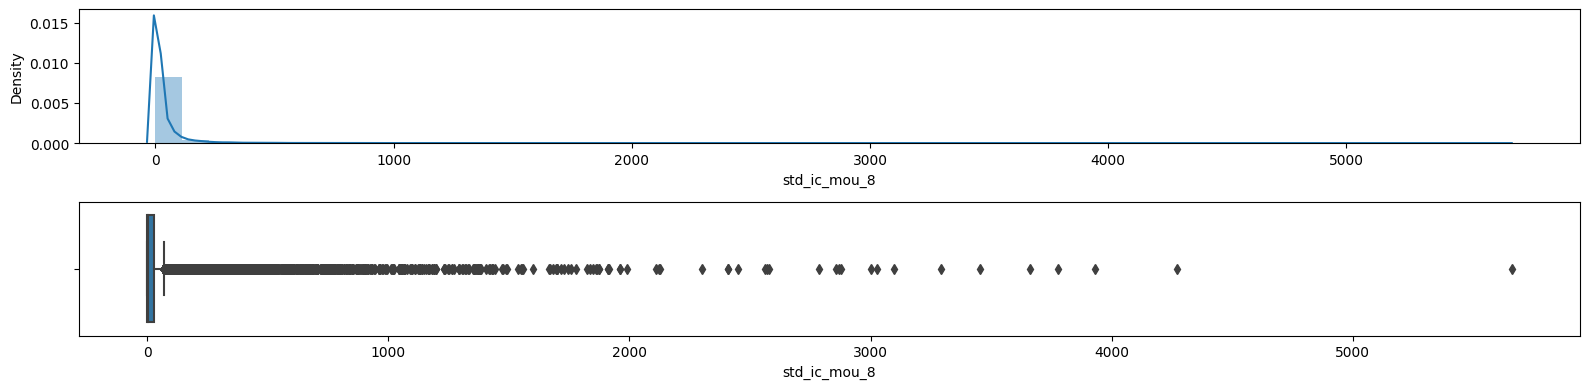

plot feature: total_ic_mou_6


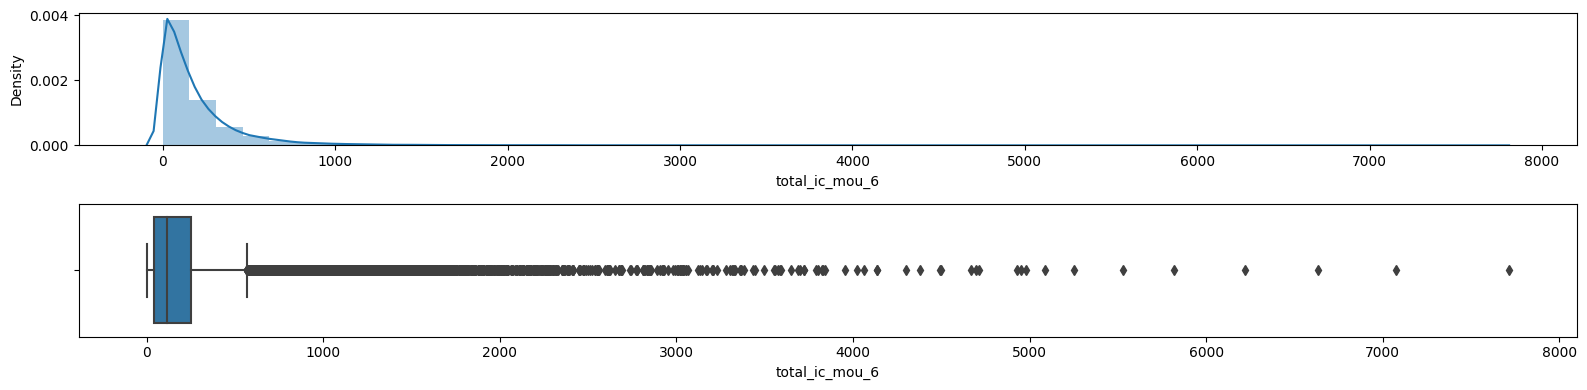

plot feature: total_ic_mou_7


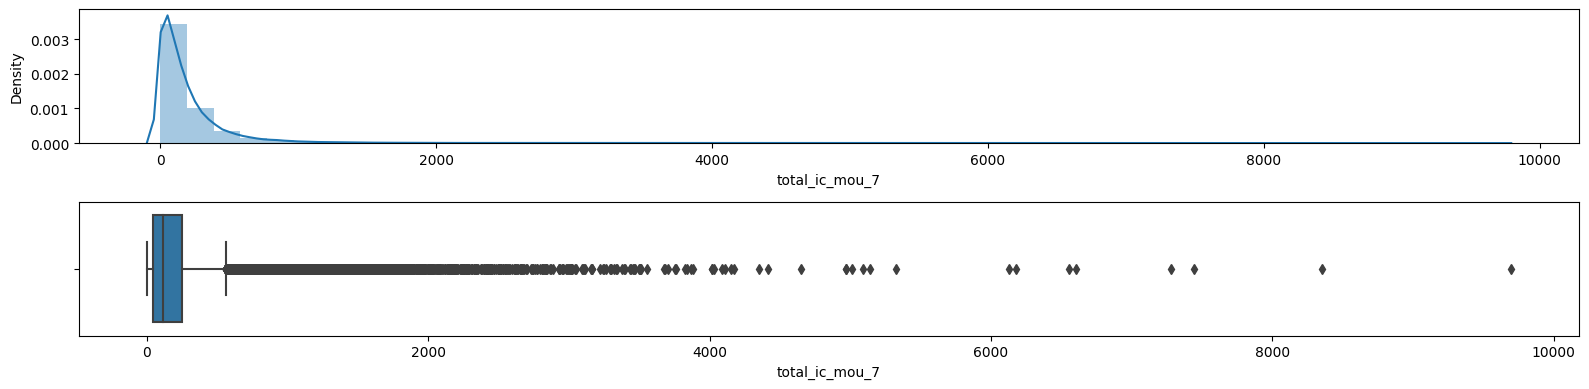

plot feature: total_ic_mou_8


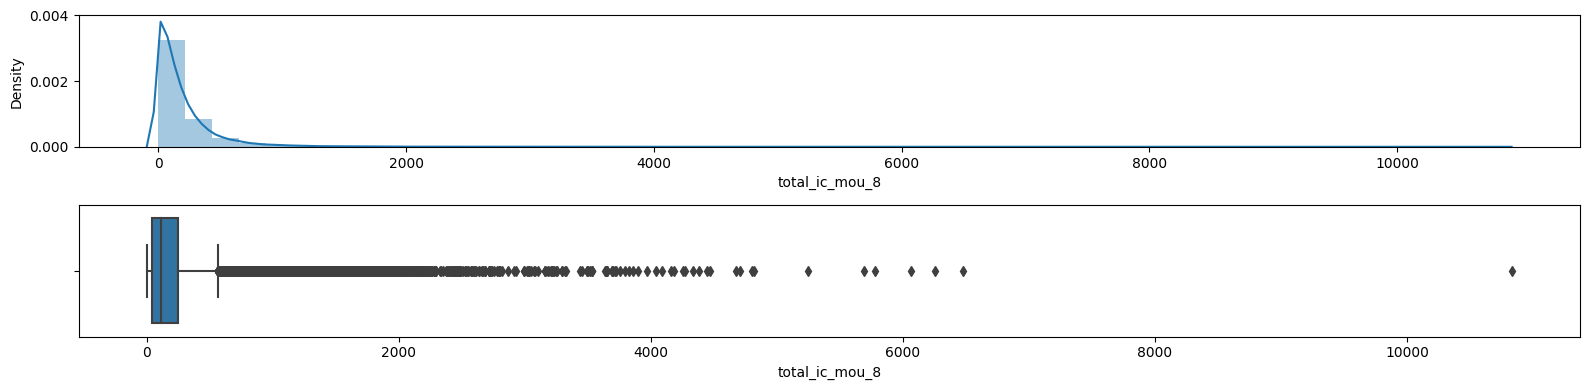

plot feature: spl_ic_mou_6


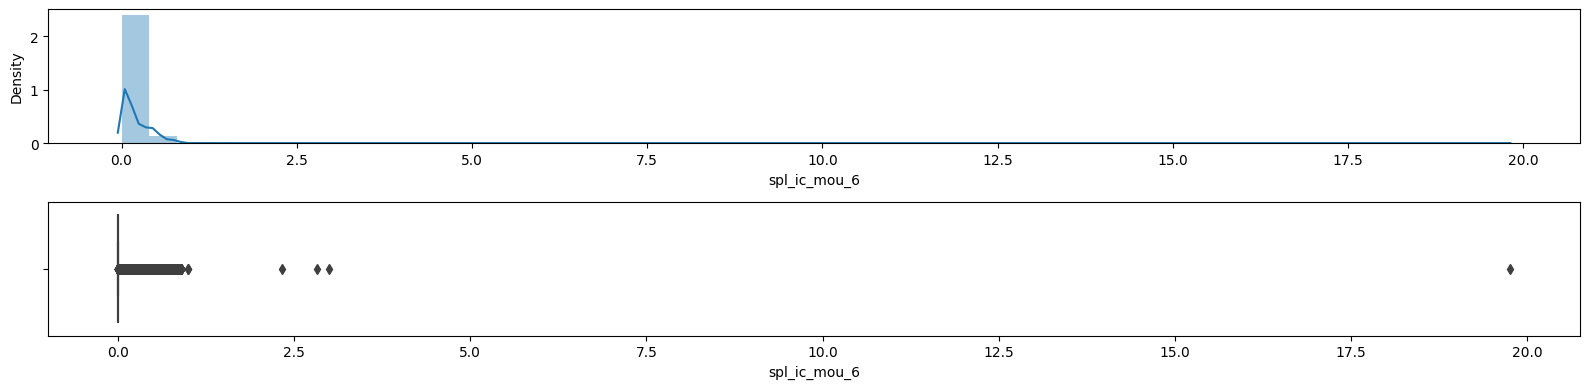

plot feature: spl_ic_mou_7


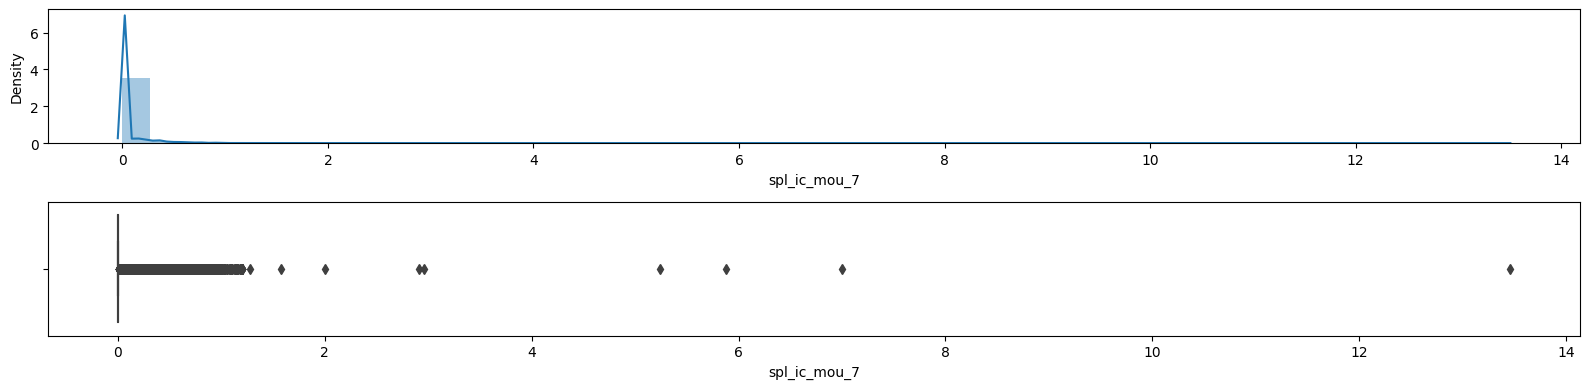

plot feature: spl_ic_mou_8


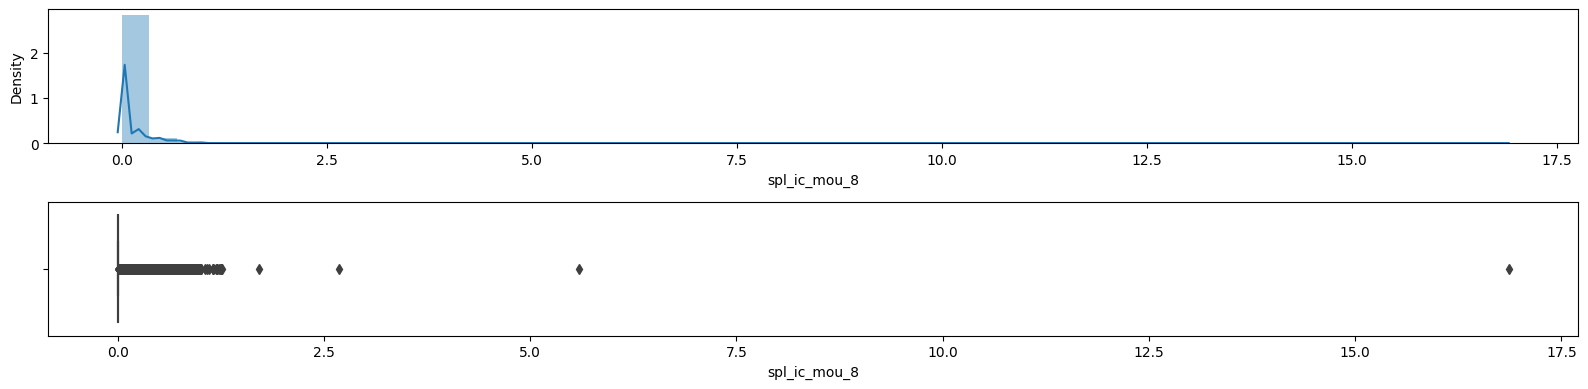

plot feature: isd_ic_mou_6


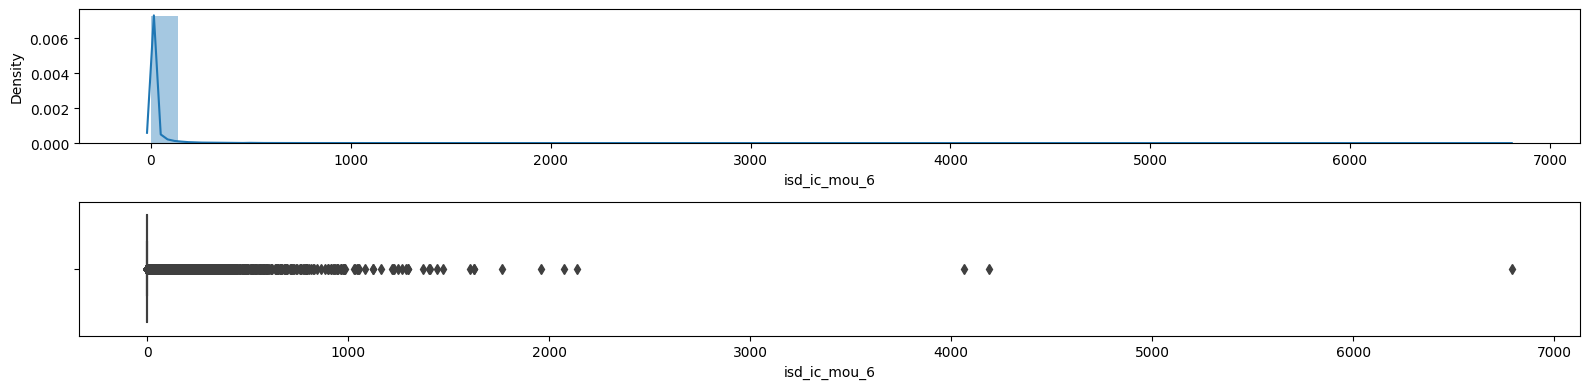

plot feature: isd_ic_mou_7


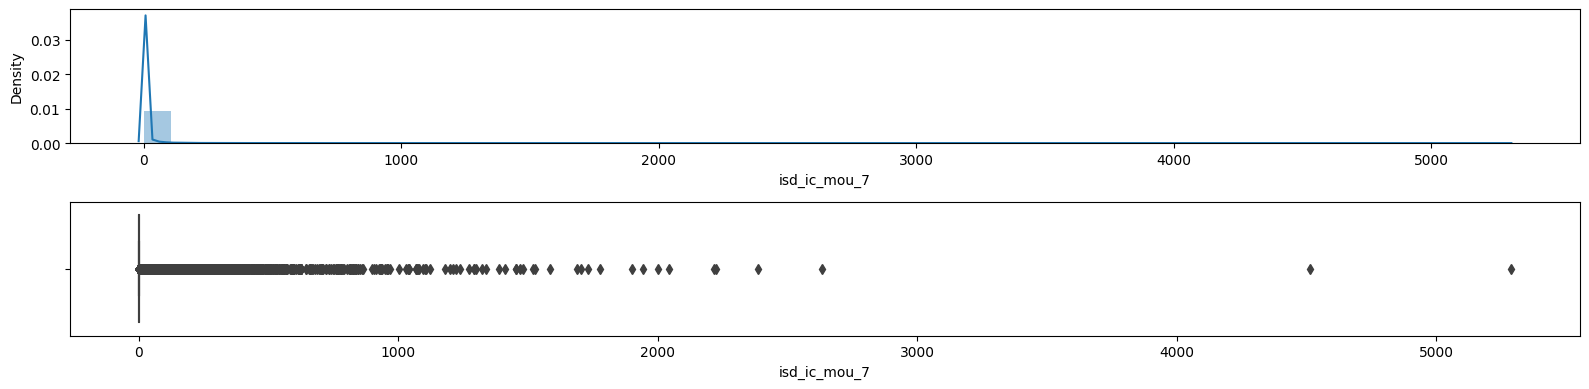

plot feature: isd_ic_mou_8


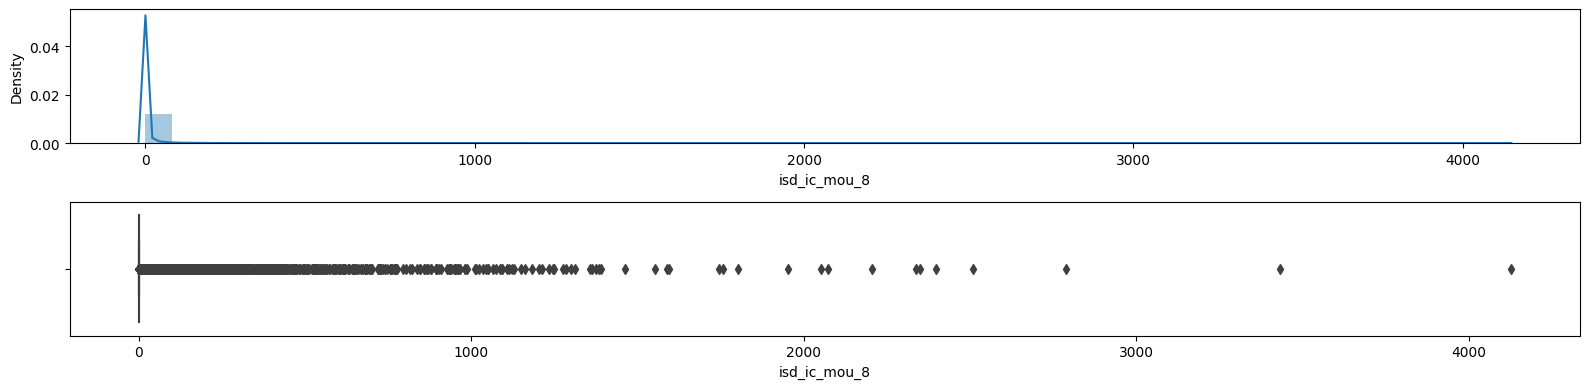

plot feature: ic_others_6


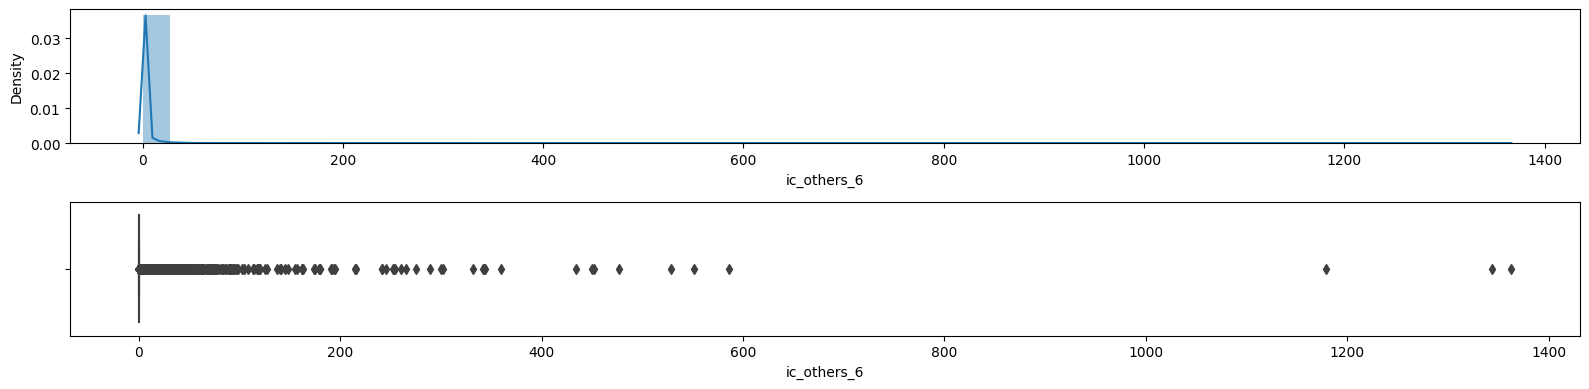

plot feature: ic_others_7


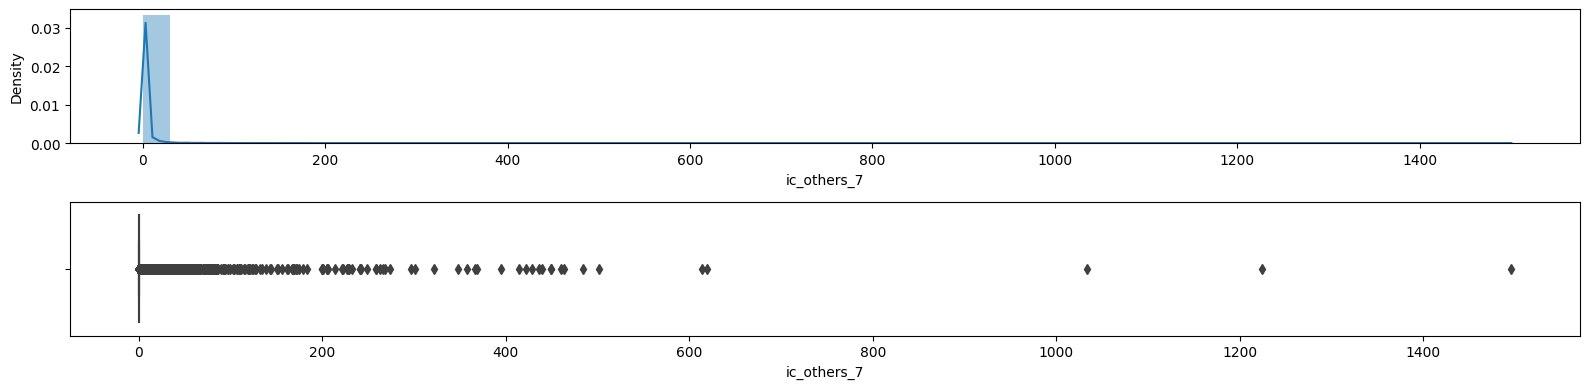

plot feature: ic_others_8


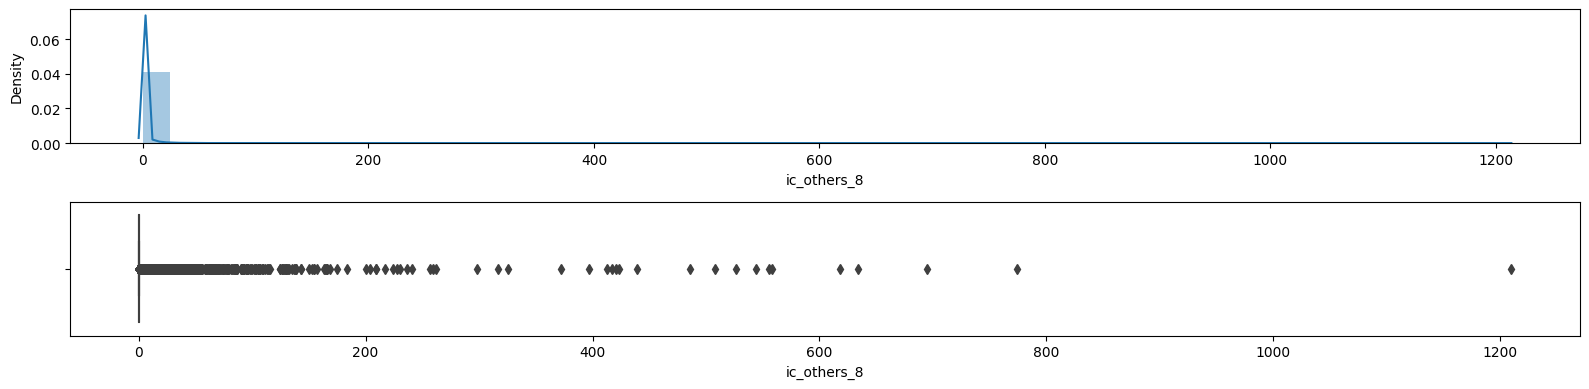

plot feature: total_rech_num_6


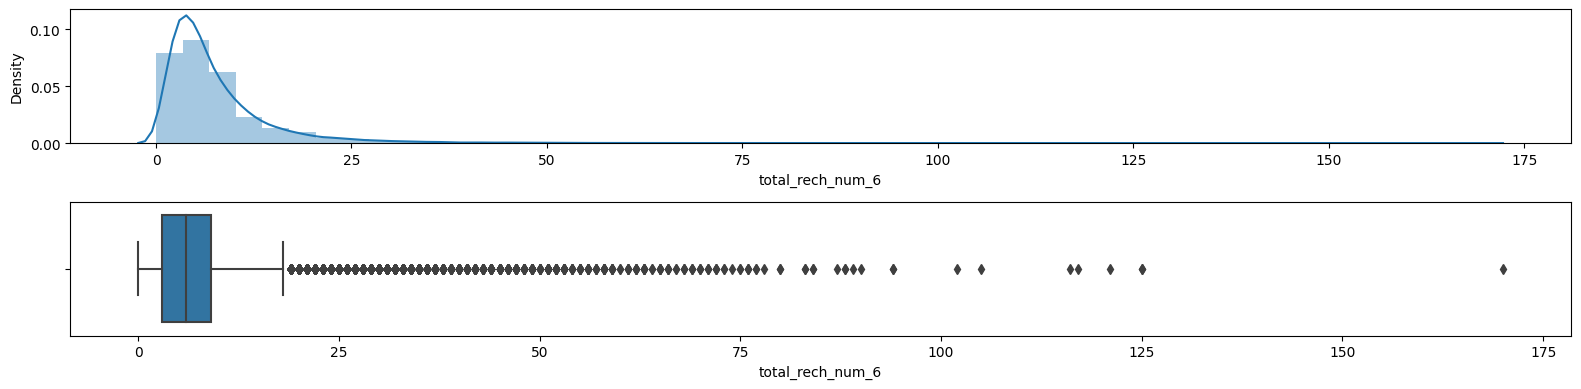

plot feature: total_rech_num_7


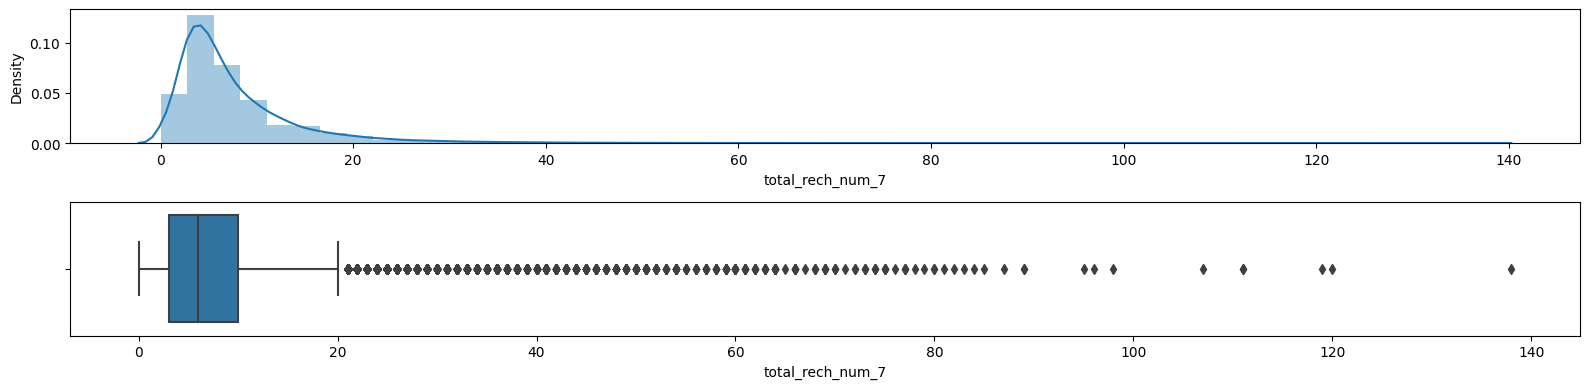

plot feature: total_rech_num_8


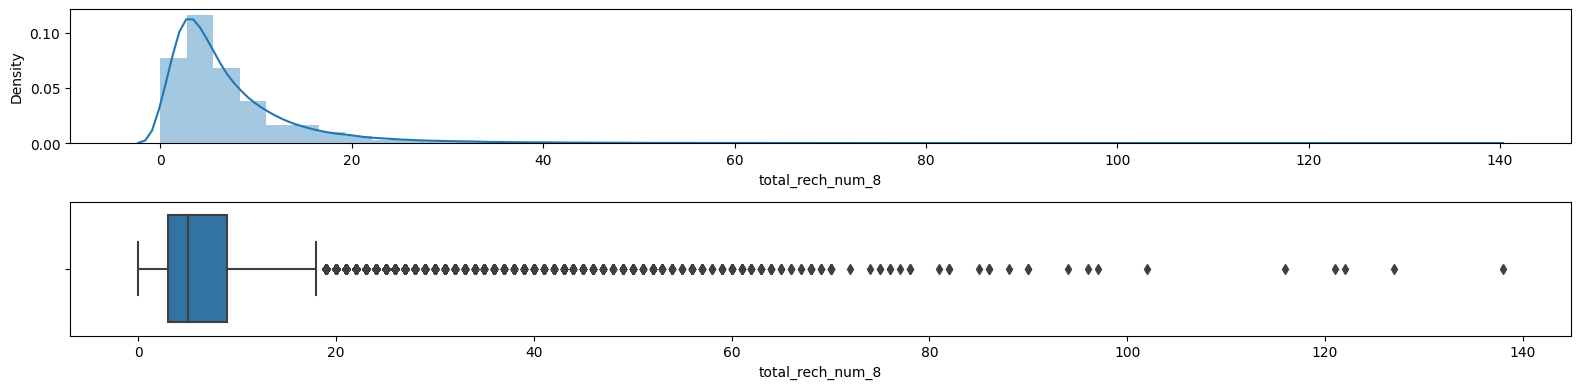

plot feature: total_rech_amt_6


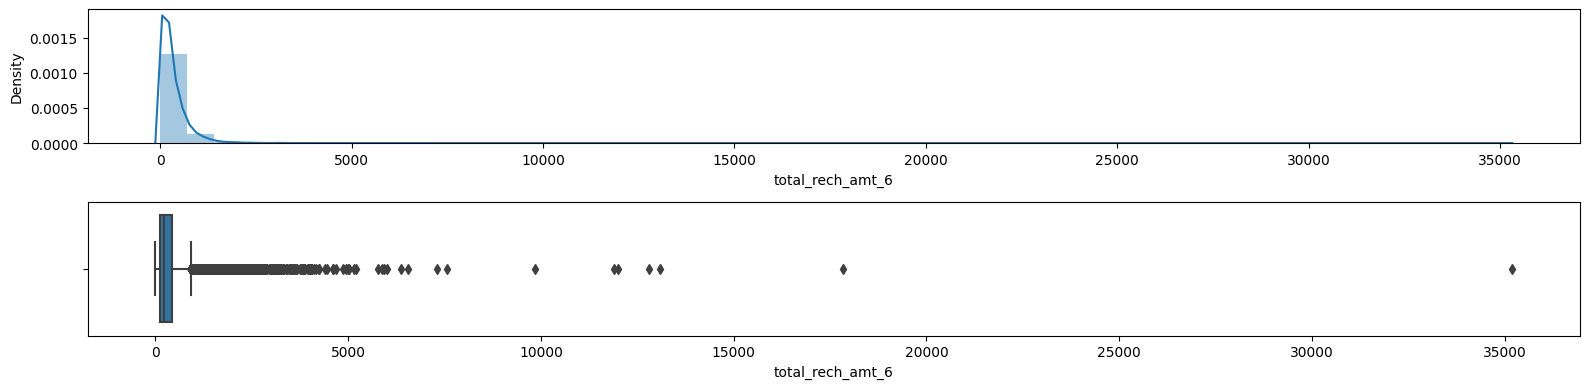

plot feature: total_rech_amt_7


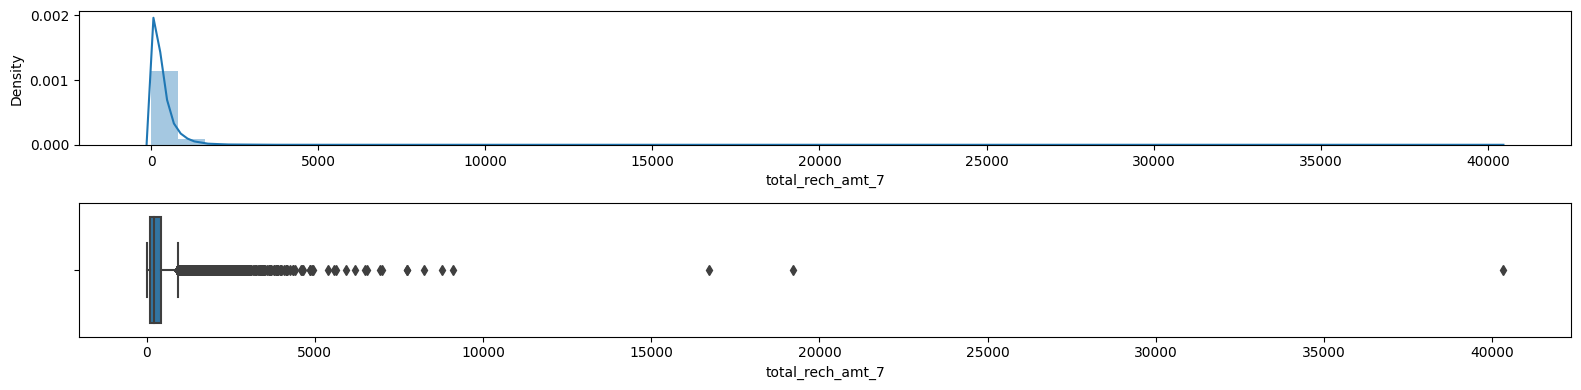

plot feature: total_rech_amt_8


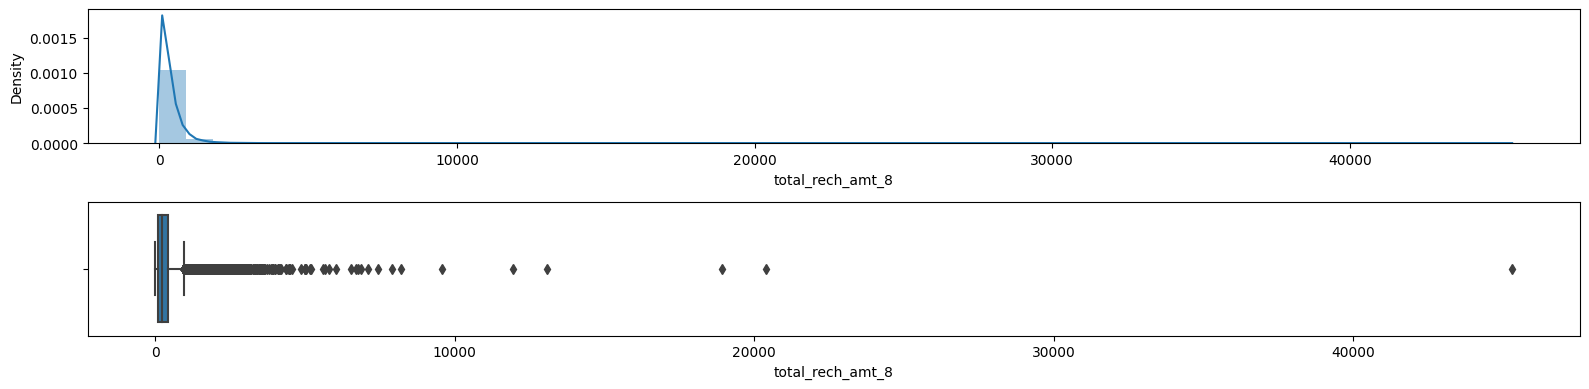

plot feature: max_rech_amt_6


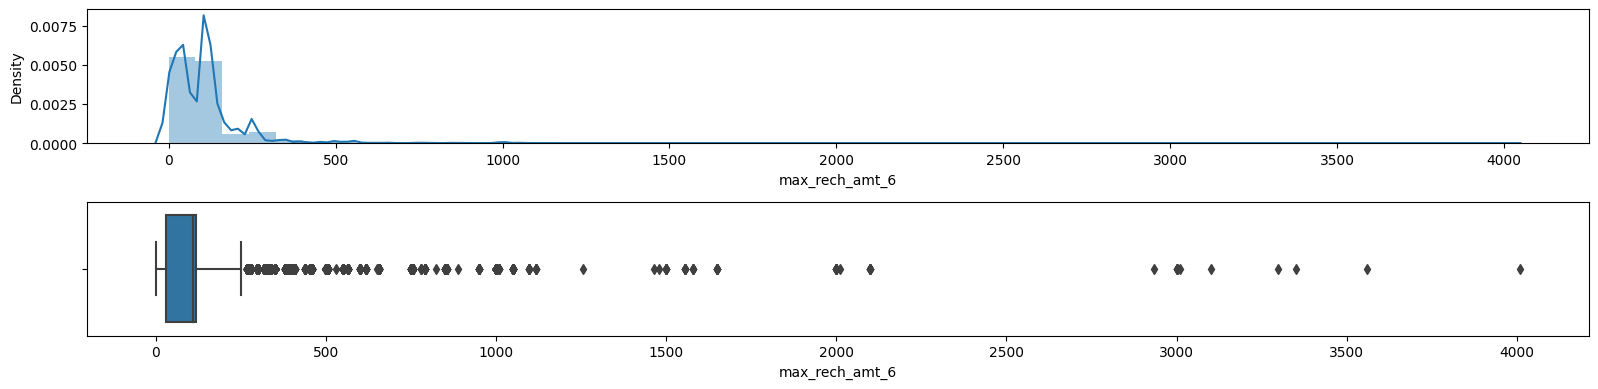

plot feature: max_rech_amt_7


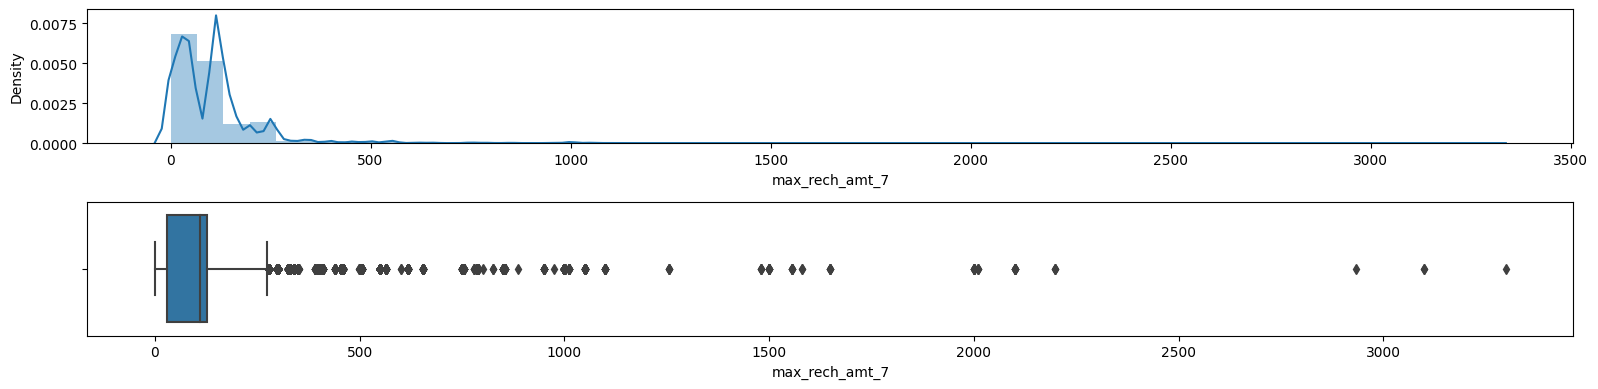

plot feature: max_rech_amt_8


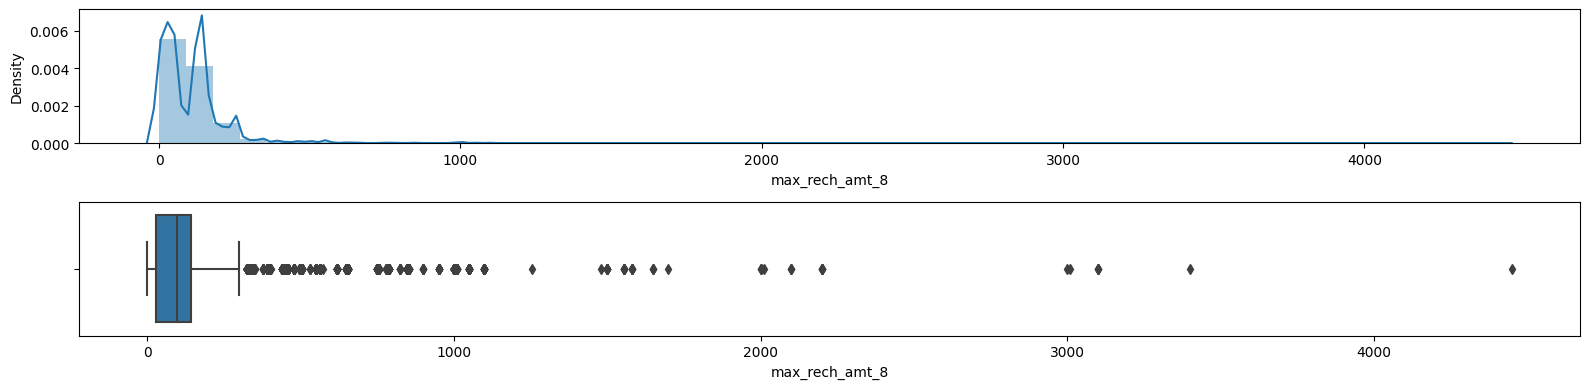

plot feature: last_day_rch_amt_6


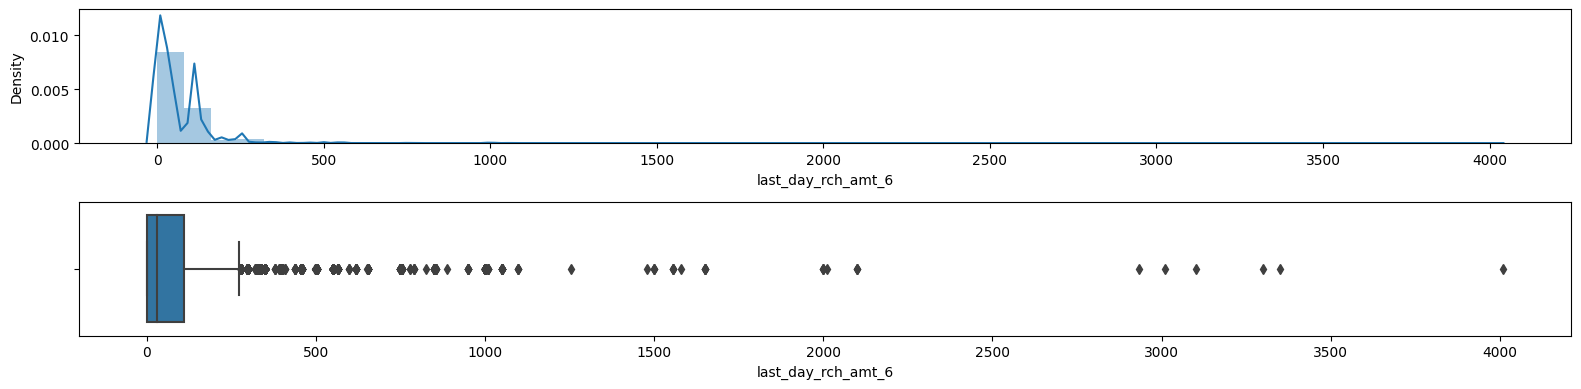

plot feature: last_day_rch_amt_7


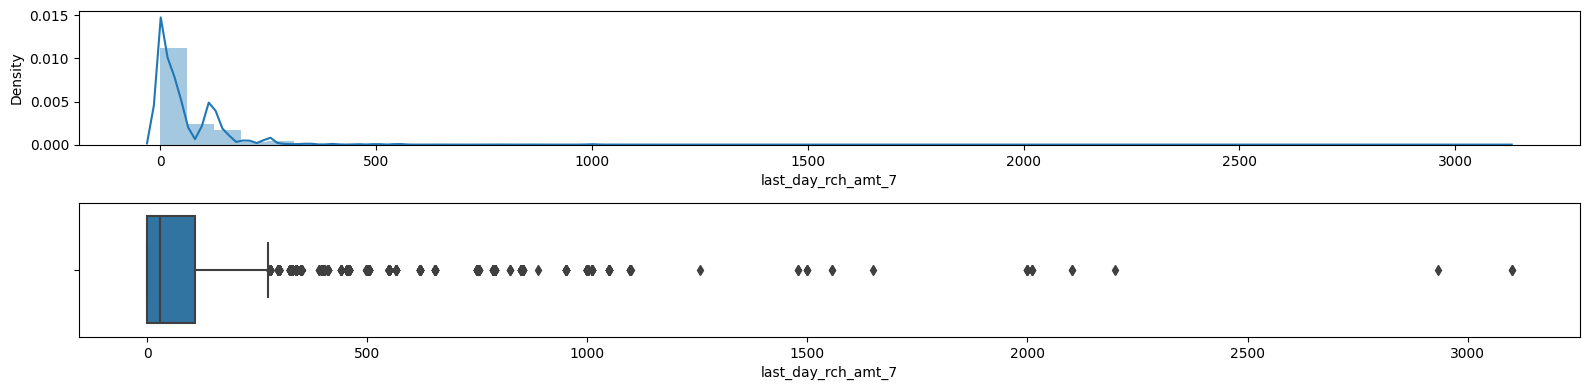

plot feature: last_day_rch_amt_8


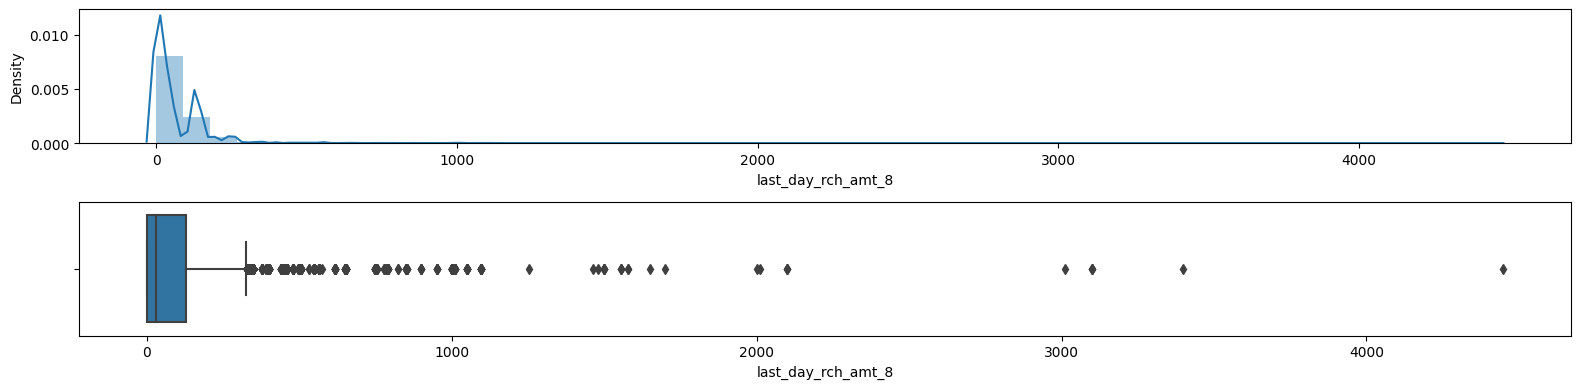

plot feature: total_rech_data_6


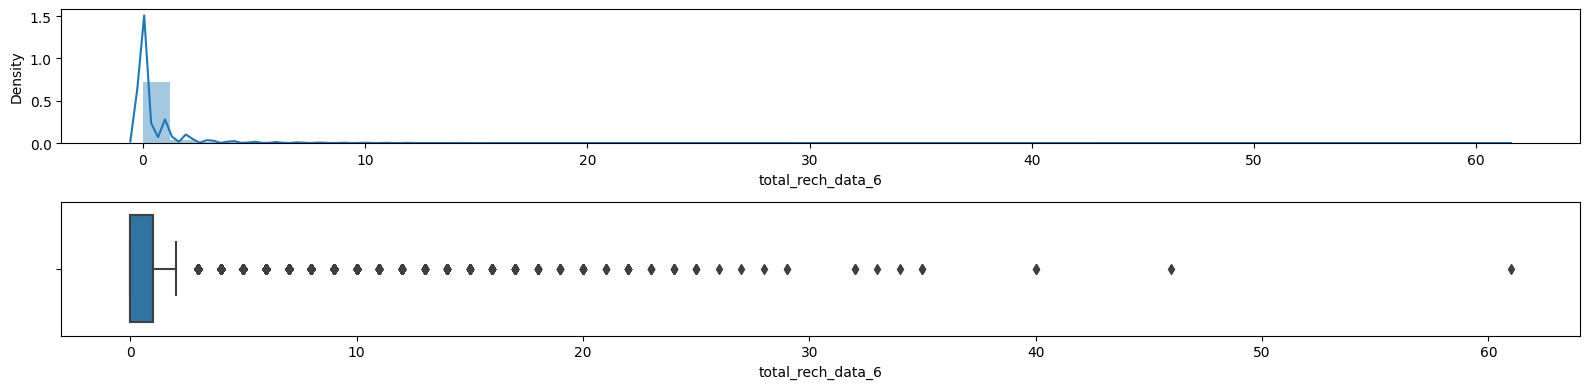

plot feature: total_rech_data_7


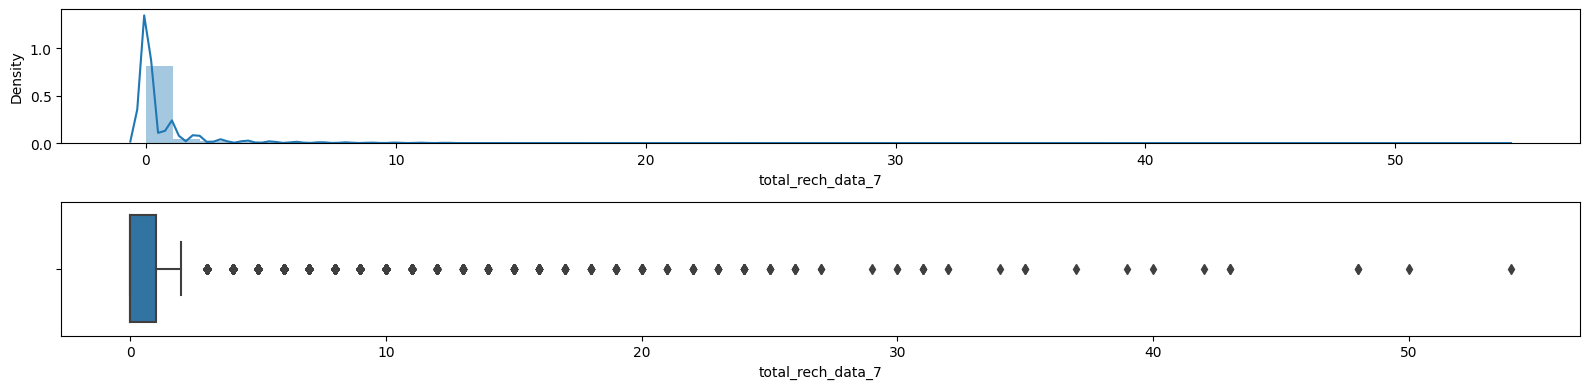

plot feature: total_rech_data_8


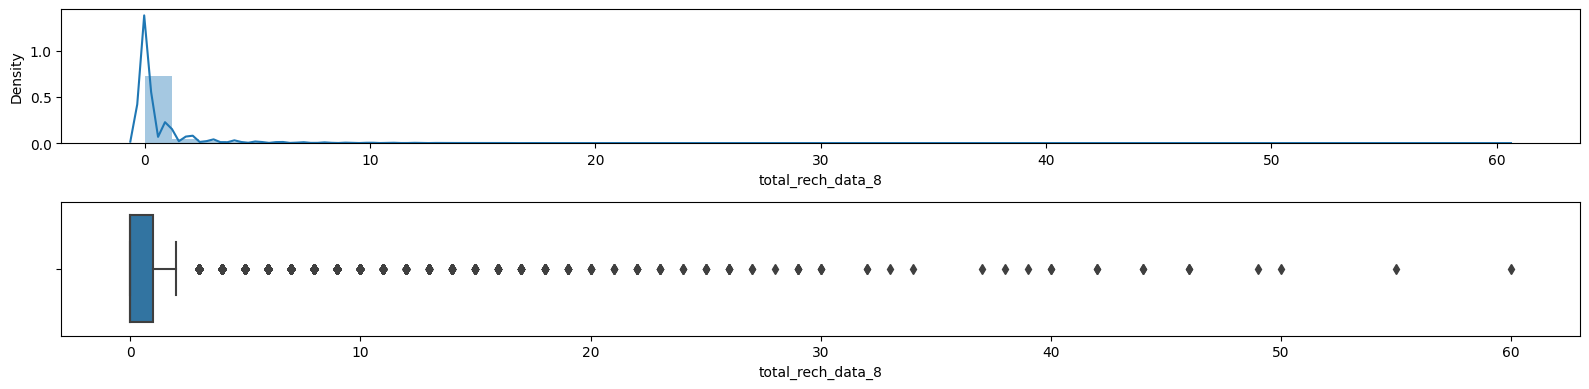

plot feature: max_rech_data_6


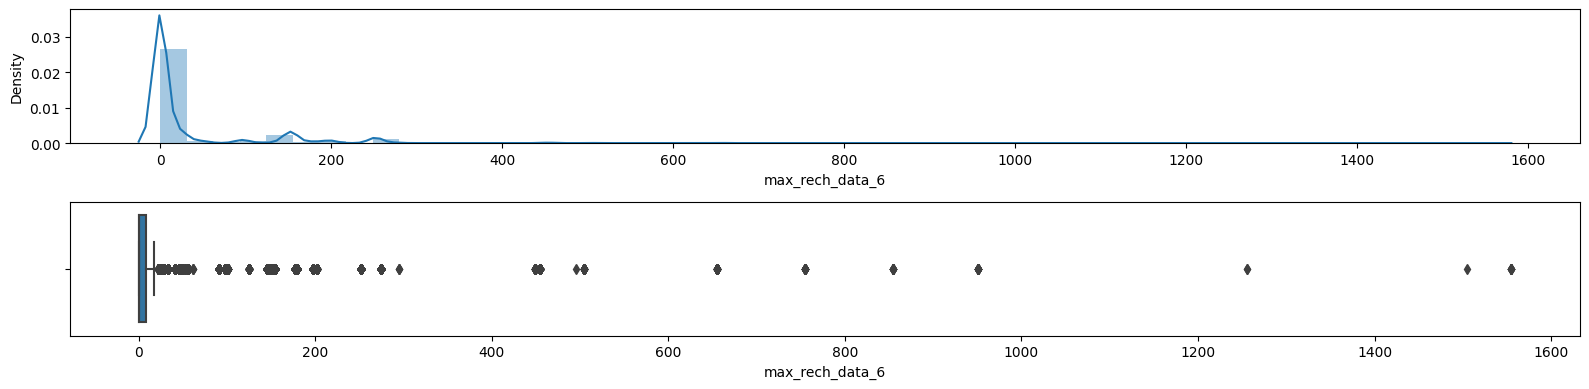

plot feature: max_rech_data_7


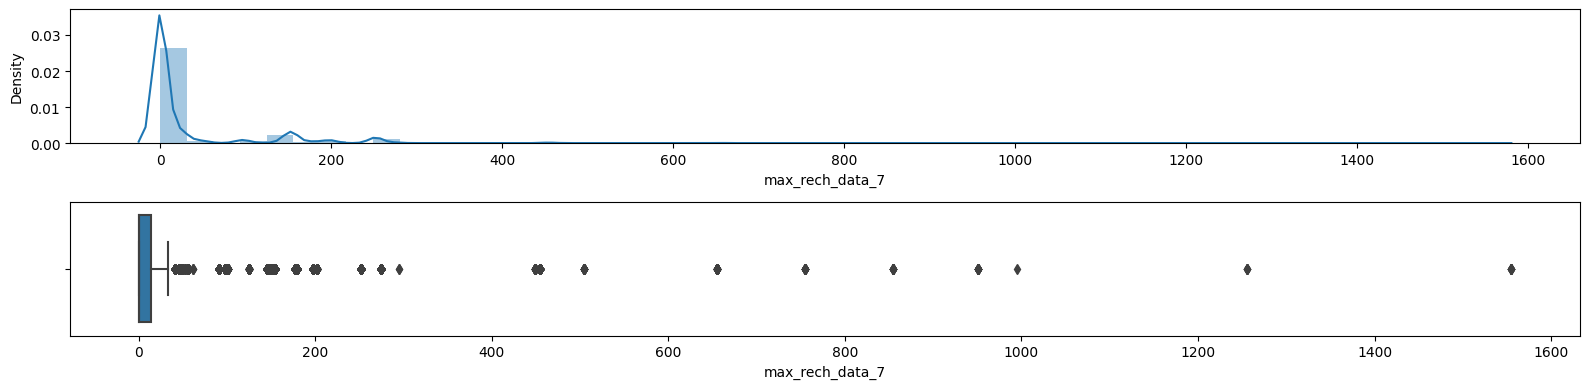

plot feature: max_rech_data_8


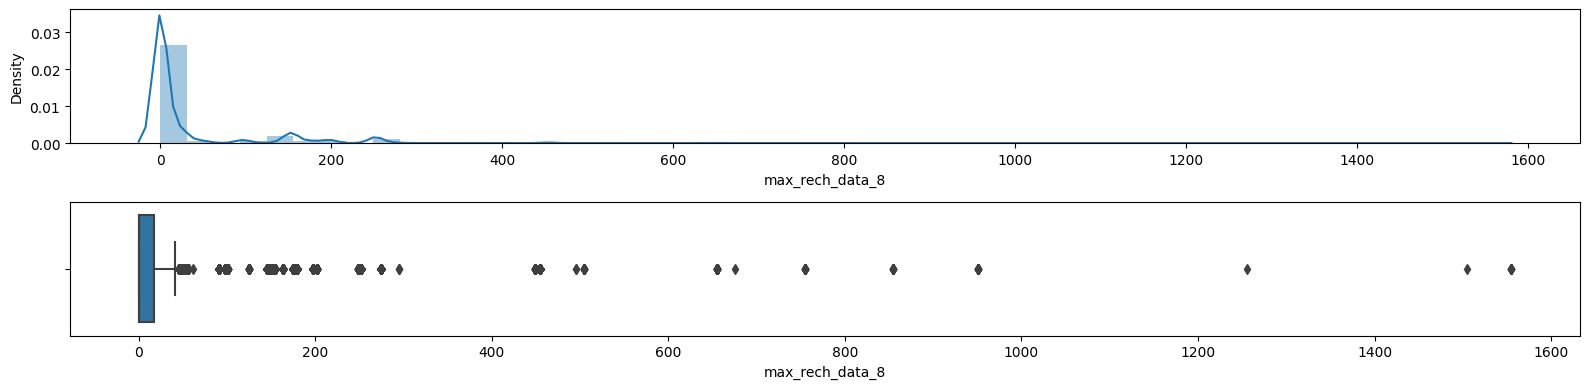

plot feature: count_rech_2g_6


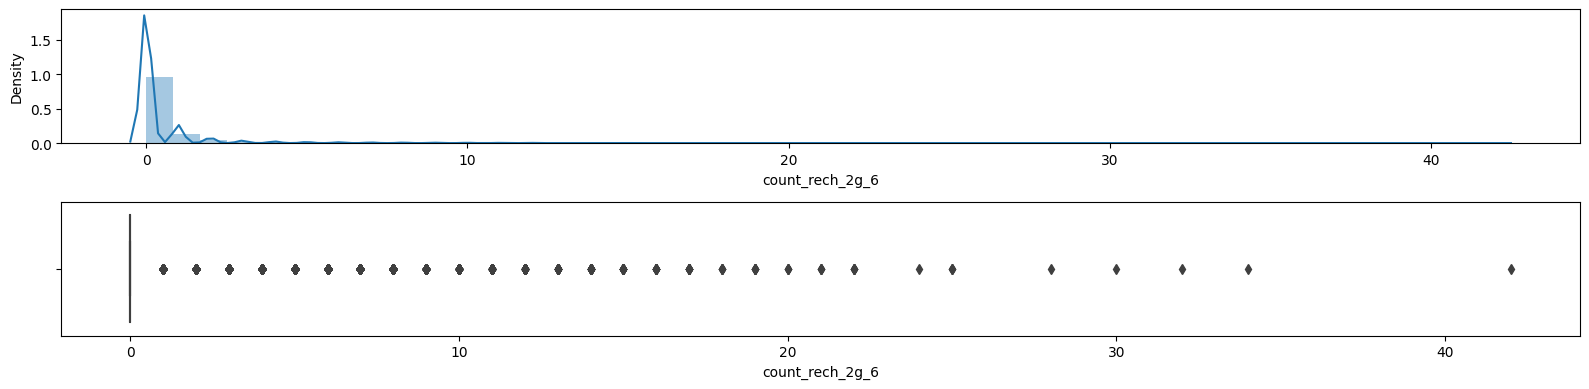

plot feature: count_rech_2g_7


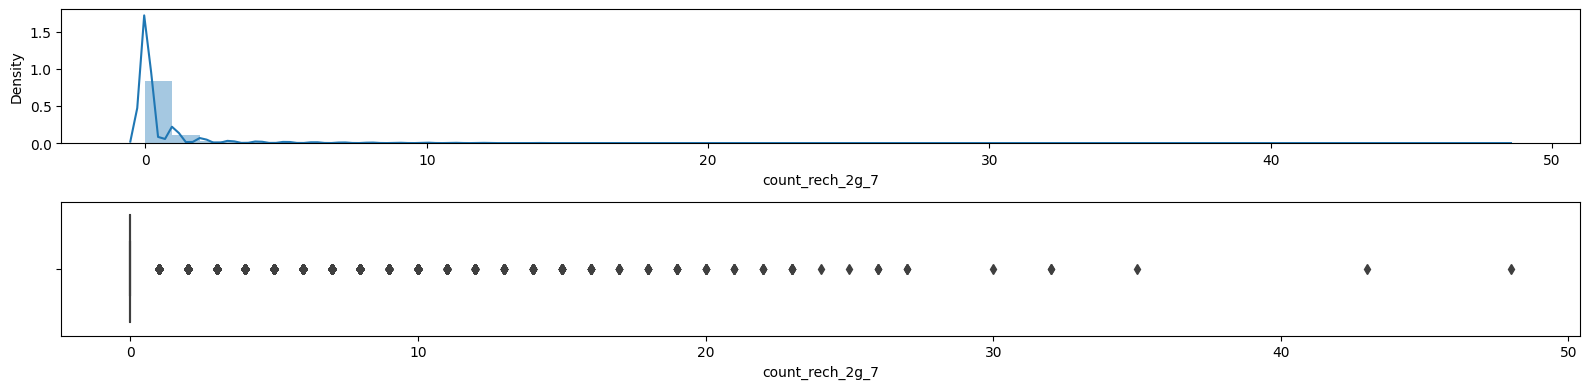

plot feature: count_rech_2g_8


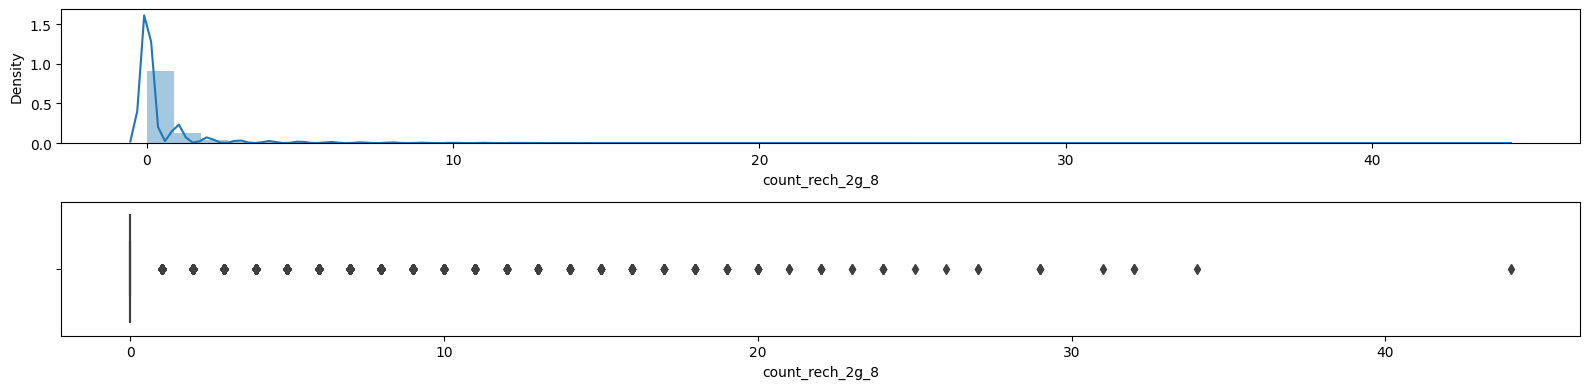

plot feature: count_rech_3g_6


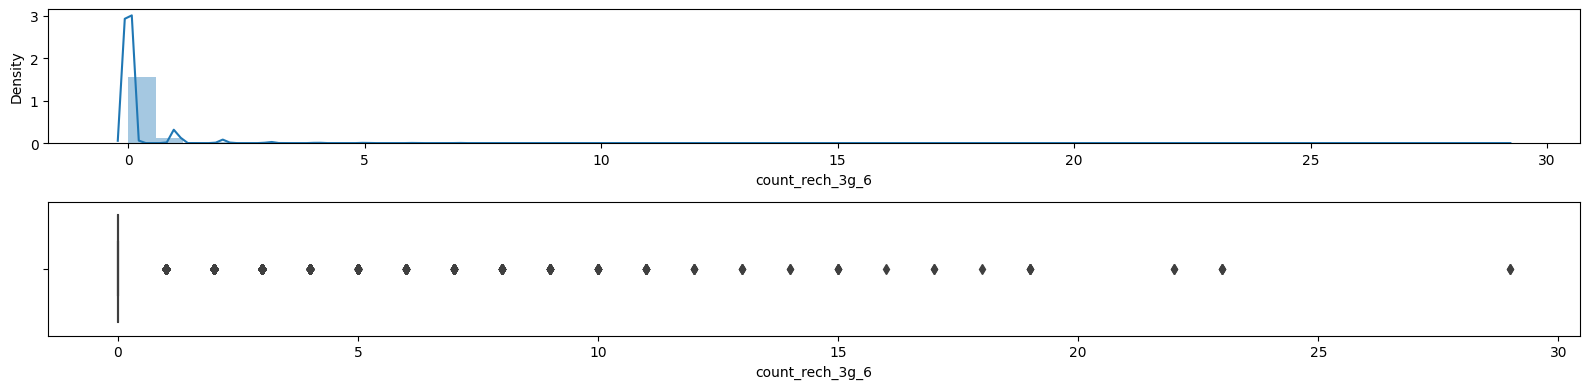

plot feature: count_rech_3g_7


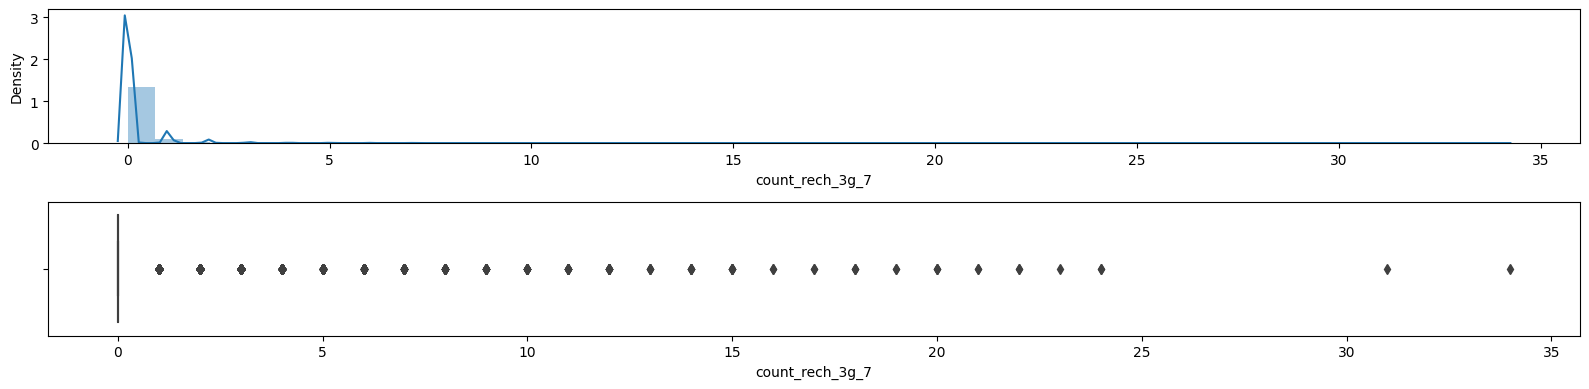

plot feature: count_rech_3g_8


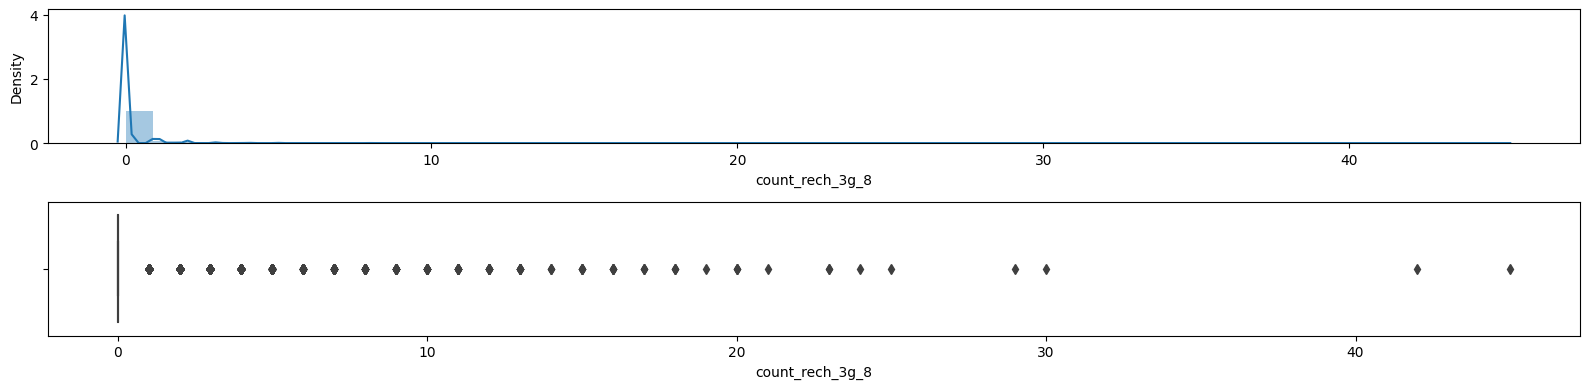

plot feature: av_rech_amt_data_6


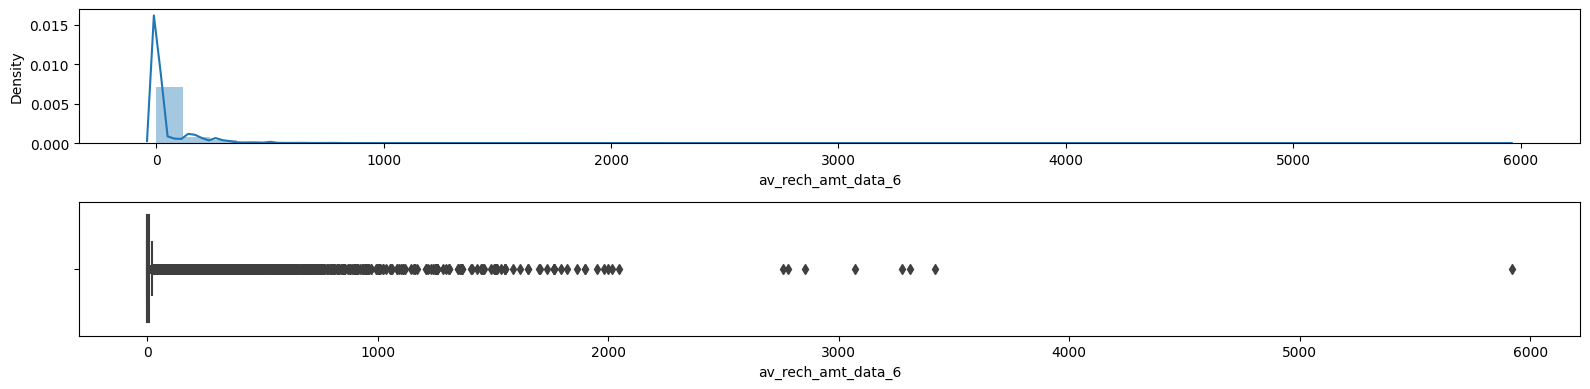

plot feature: av_rech_amt_data_7


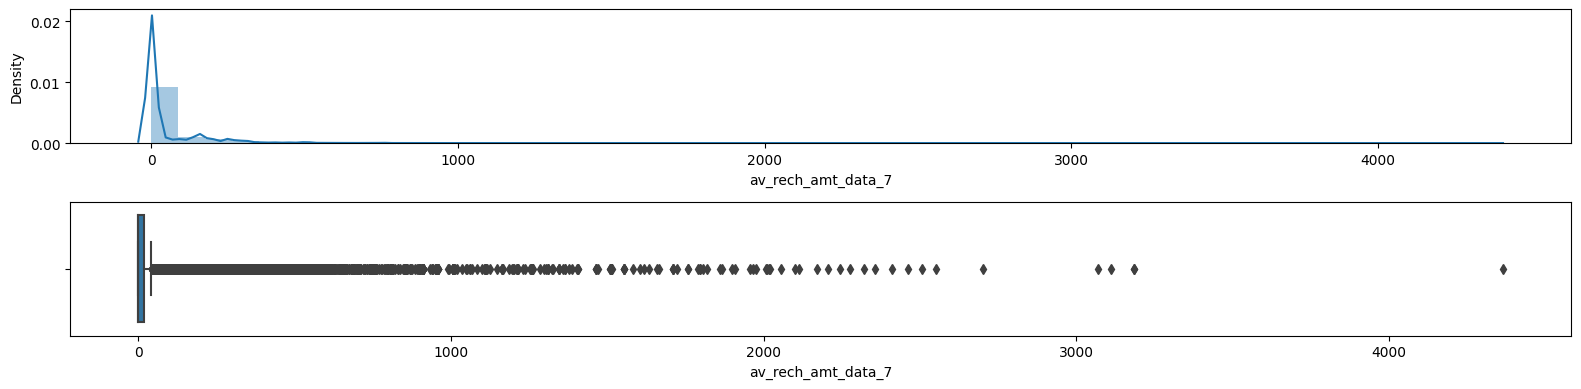

plot feature: av_rech_amt_data_8


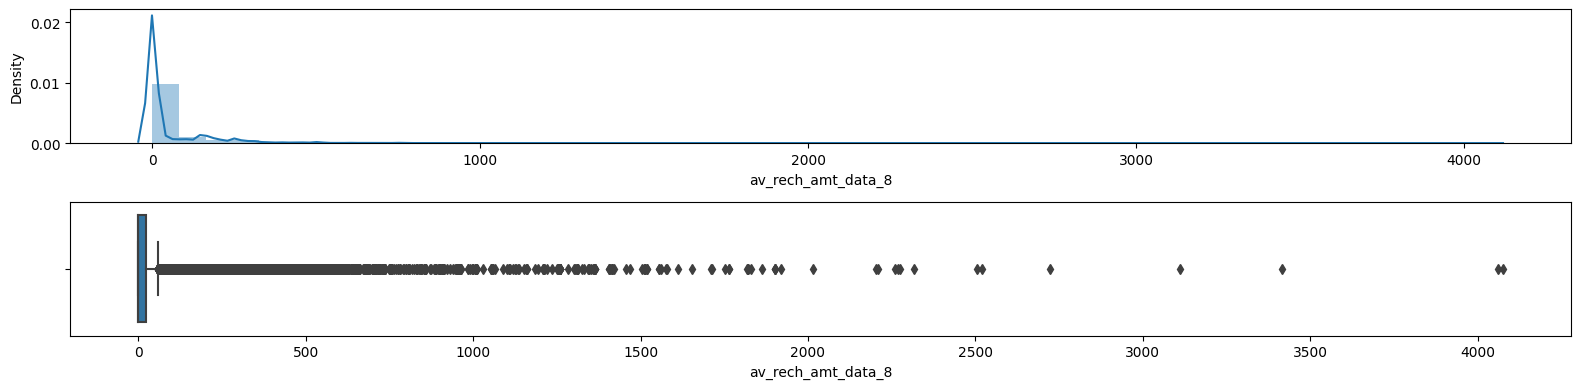

plot feature: vol_2g_mb_6


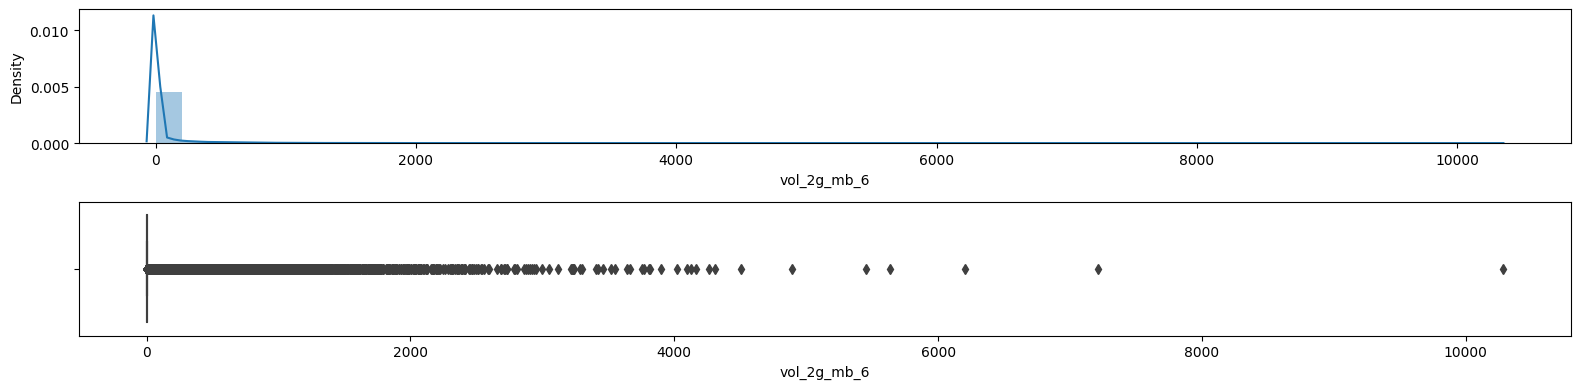

plot feature: vol_2g_mb_7


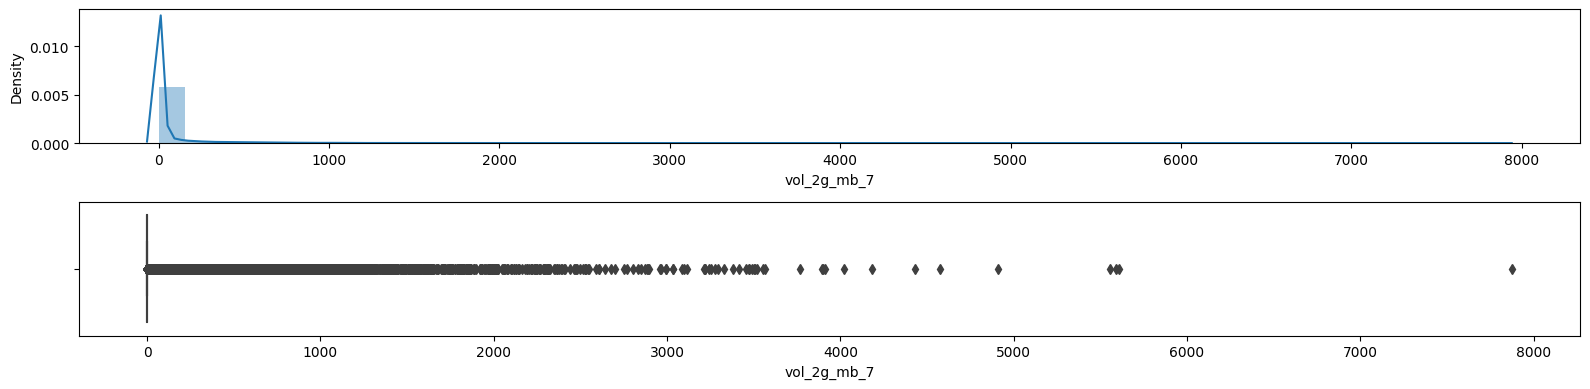

plot feature: vol_2g_mb_8


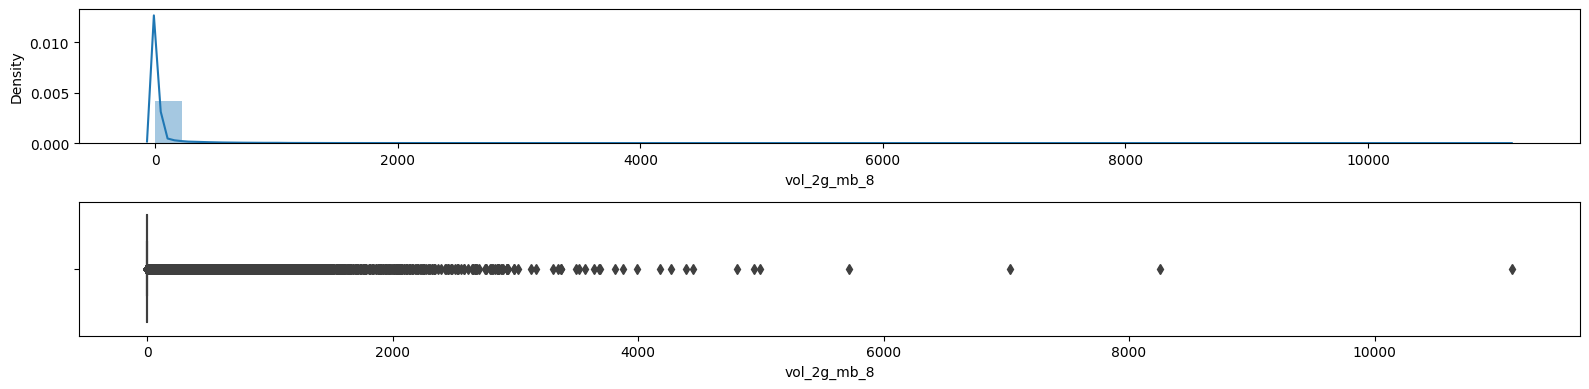

plot feature: vol_3g_mb_6


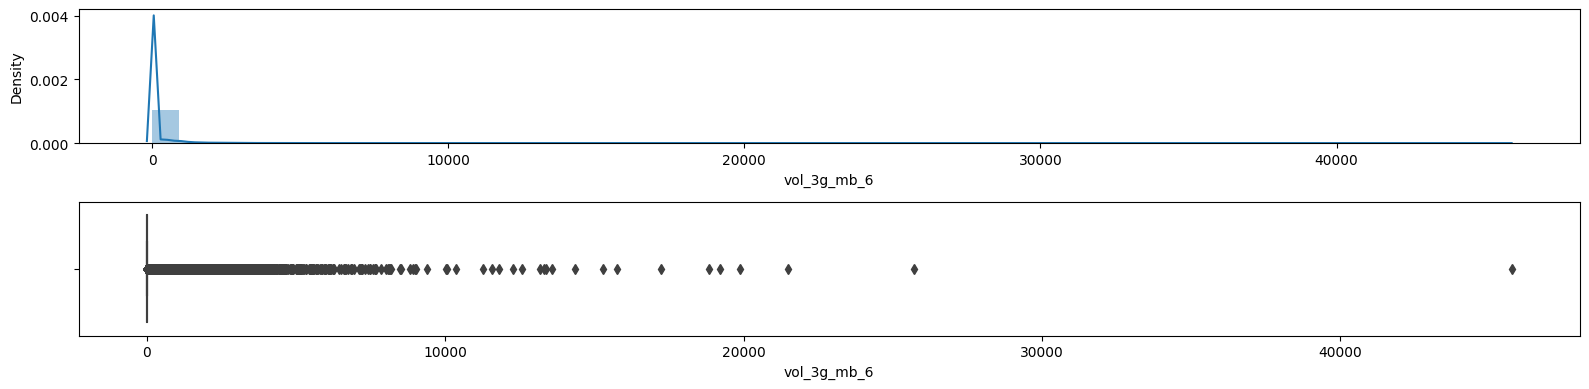

plot feature: vol_3g_mb_7


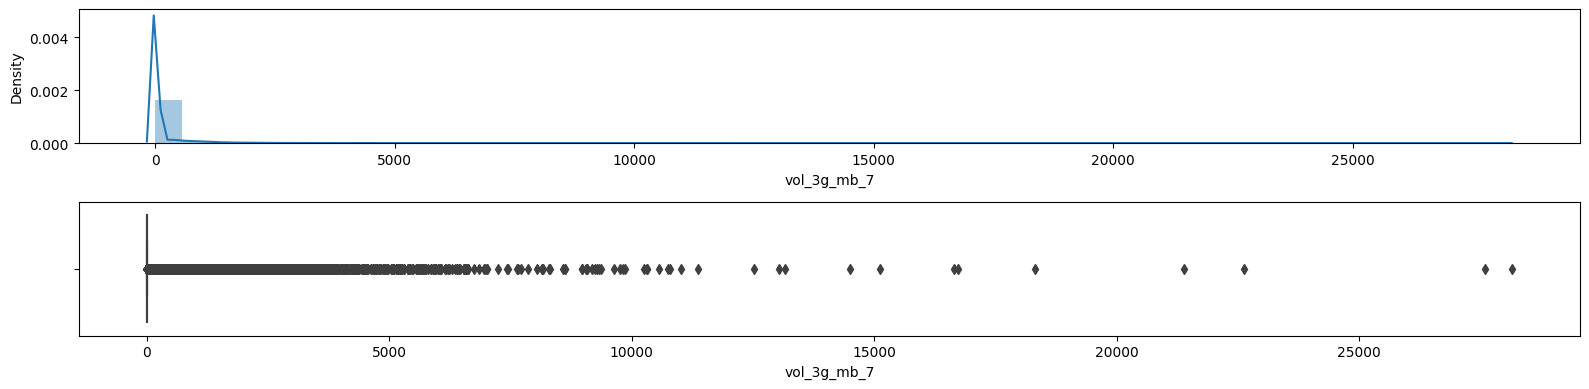

plot feature: vol_3g_mb_8


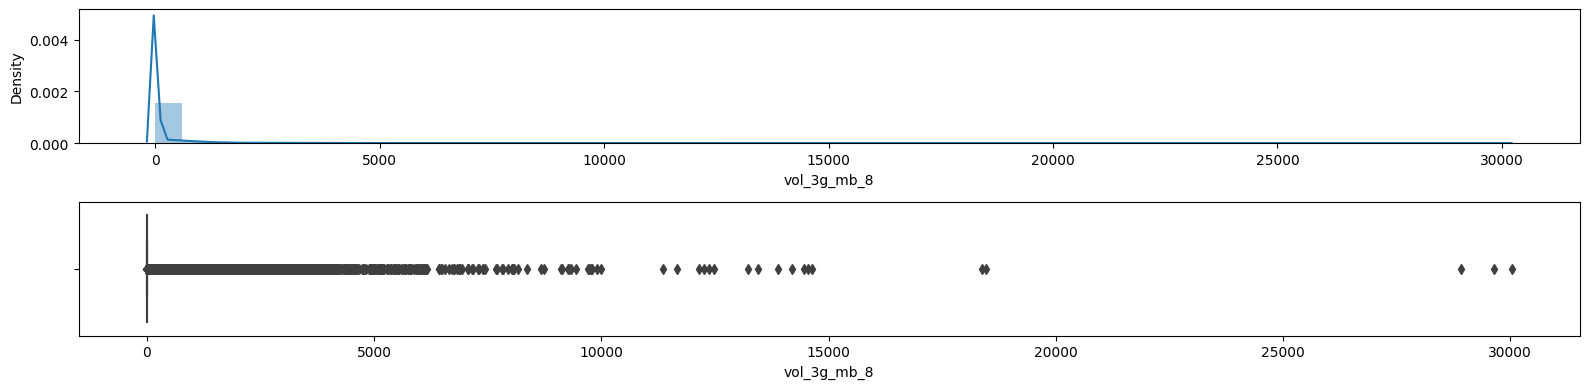

plot feature: sachet_2g_6


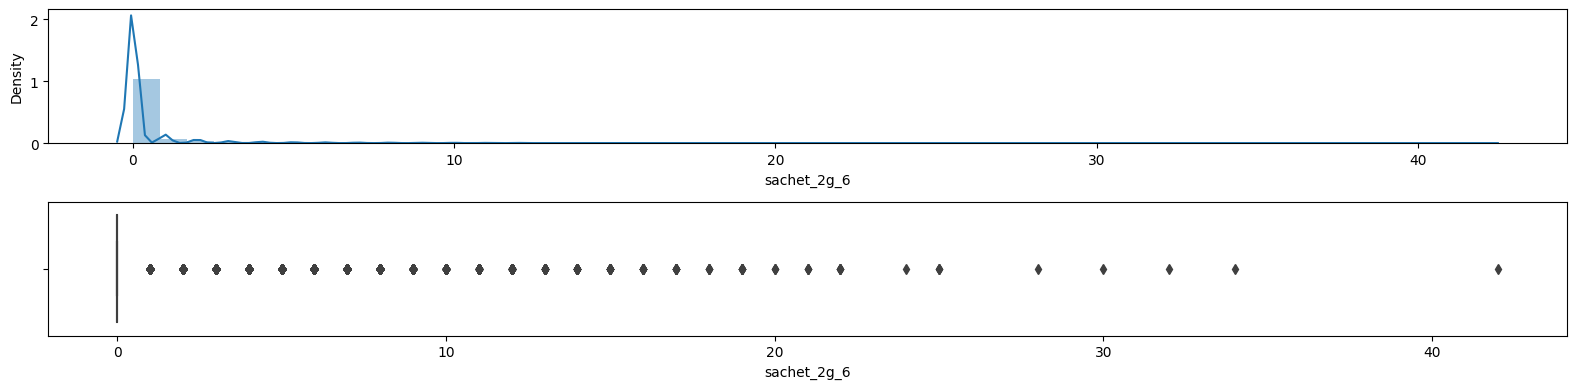

plot feature: sachet_2g_7


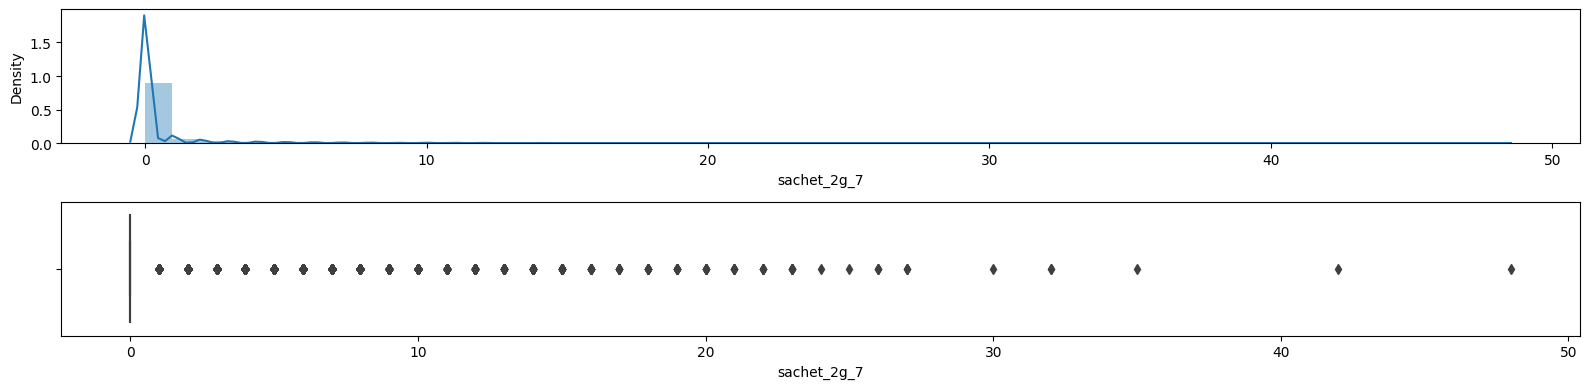

plot feature: sachet_2g_8


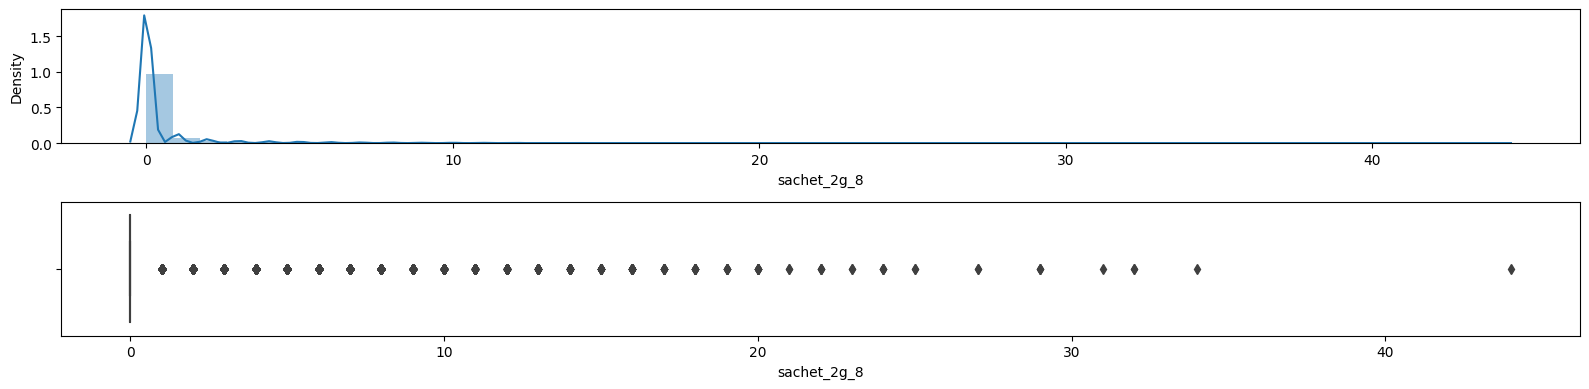

plot feature: sachet_3g_6


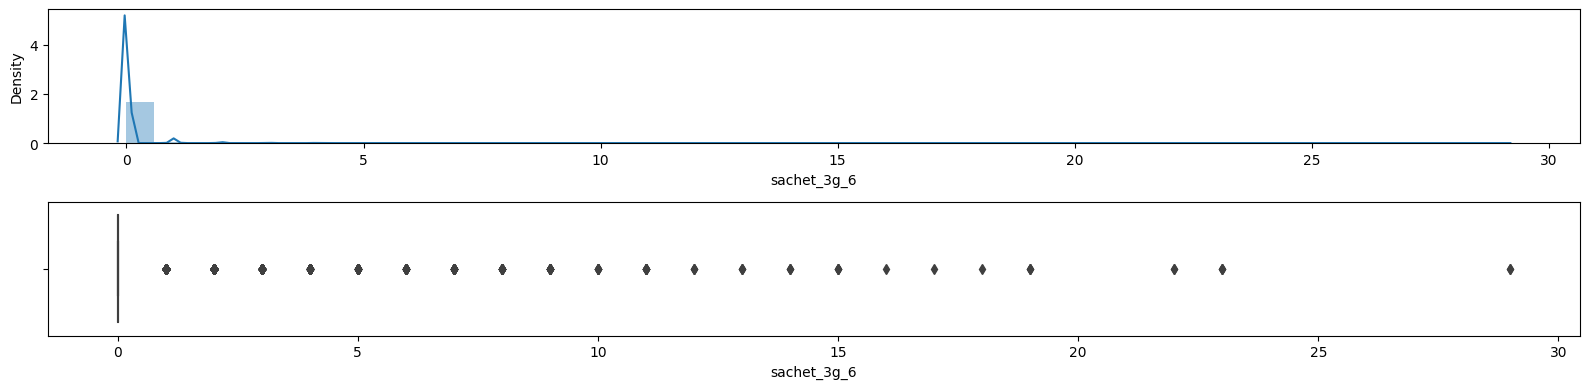

plot feature: sachet_3g_7


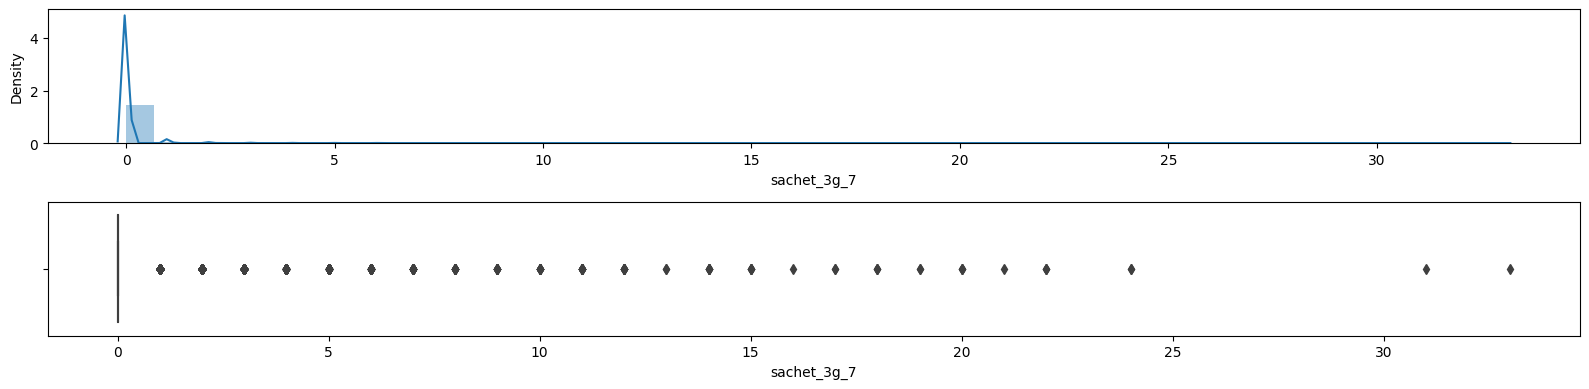

plot feature: sachet_3g_8


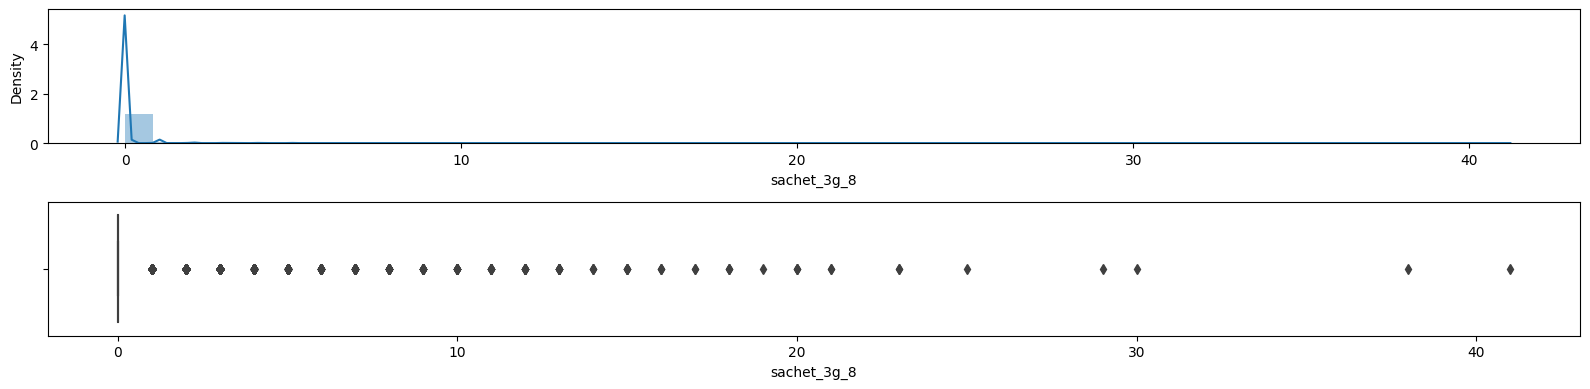

plot feature: aon


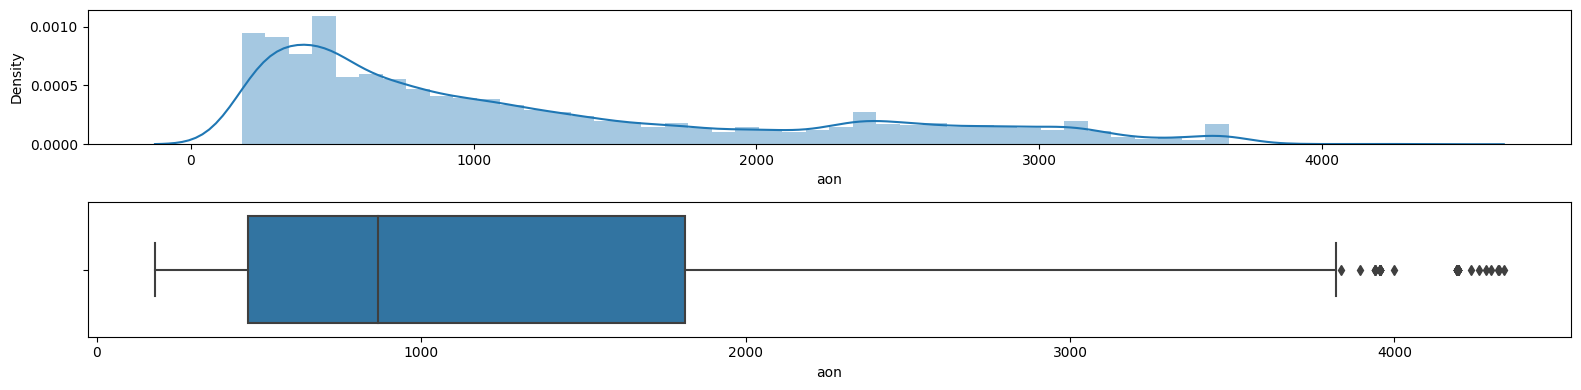

plot feature: aug_vbc_3g


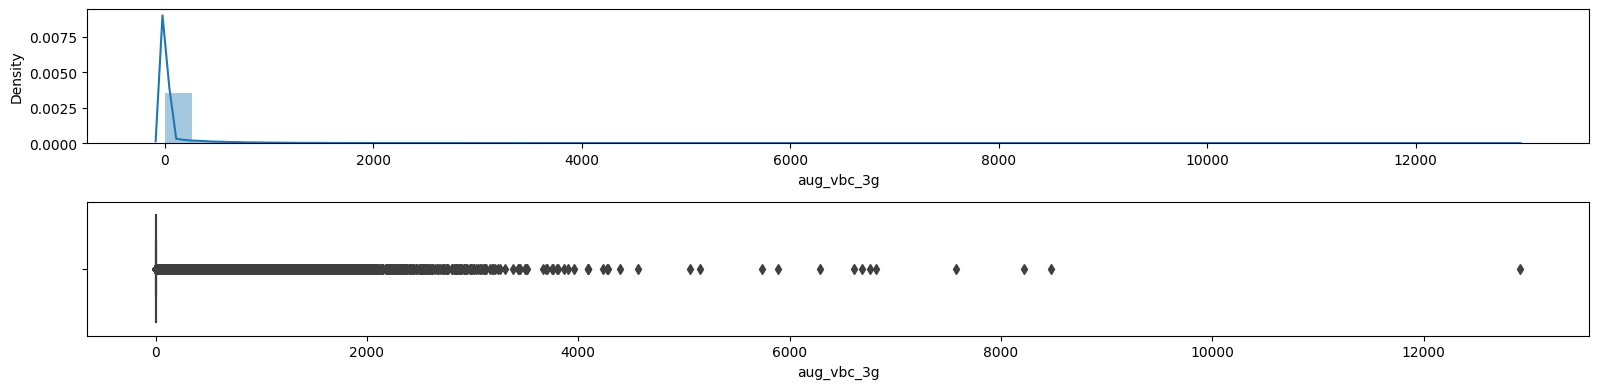

plot feature: jul_vbc_3g


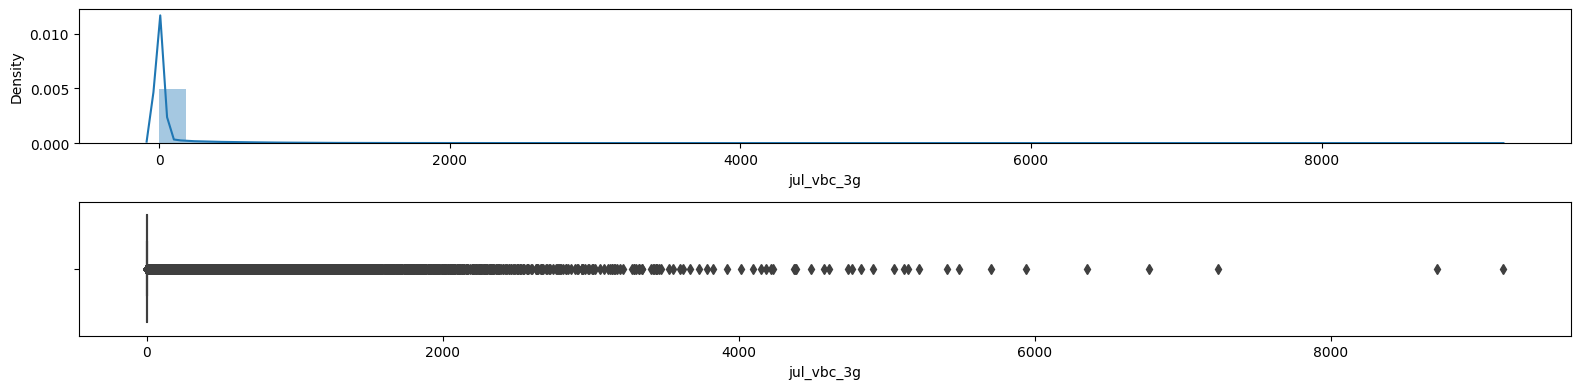

plot feature: jun_vbc_3g


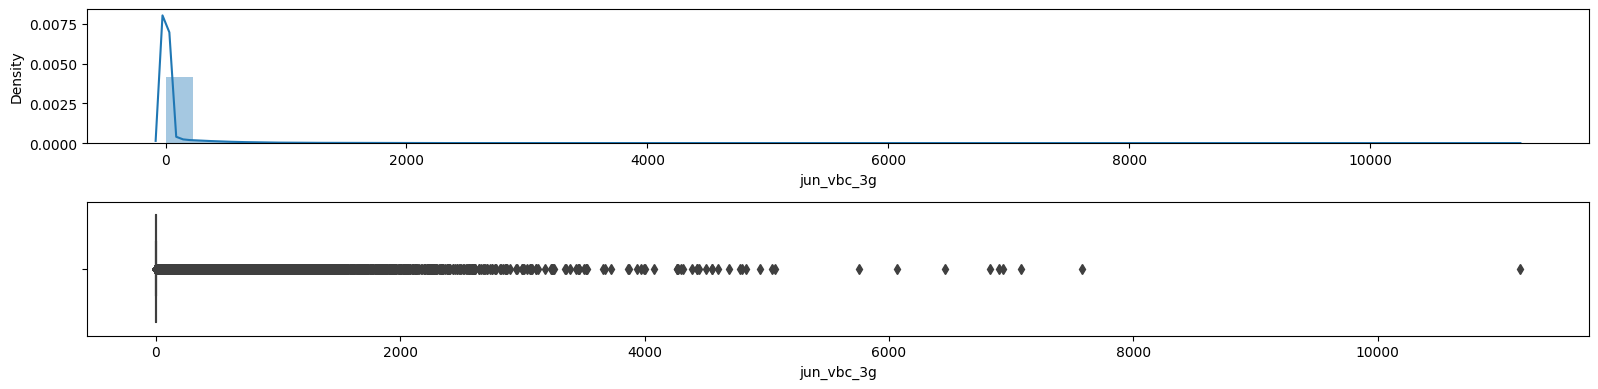

In [21]:
# plot dist and box
for c in num_cols:
    print('plot feature:', c)
    univariate_analysis1(train, c)

> After these above infomation, I decide to fix the outliers to 99th percentile values

In [22]:
# Columns with outliers 
out99 = train_imputation.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
out99_cond = out99 > 100
out_cols = out99[out99_cond].index.values
print('Columns with outliers :\n', out_cols)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'total_og_mou_6' 'total_og_mou_7'
 'total_og_mou_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8'
 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7' 'loc_ic_t2m_mou_8'
 'loc_

In [23]:
# Fixing the outliers to 99th percentile values
import pandas as pd
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = train_imputation[col].quantile(0.99)
    condition = train_imputation[col] > out_threshold
    new_row = {'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : train_imputation.loc[condition,col].shape[0] }
    out_treat = pd.concat([out_treat, pd.DataFrame([new_row])], ignore_index=True)
    train_imputation.loc[condition, col] = out_threshold
out_treat

Column  Outlier Threshold Outliers replaced
0         arpu_6         1400.27664               700
1         arpu_7         1414.89138               700
2         arpu_8         1445.05480               700
3    onnet_mou_6         1429.04040               700
4    onnet_mou_7         1461.34220               700
..           ...                ...               ...
133  sachet_3g_7            2.00000               490
134  sachet_3g_8            2.00000               536
135   aug_vbc_3g         1226.65980               700
136   jul_vbc_3g         1254.27900               700
137   jun_vbc_3g         1188.26780               700

[138 rows x 3 columns]

<Axes: >

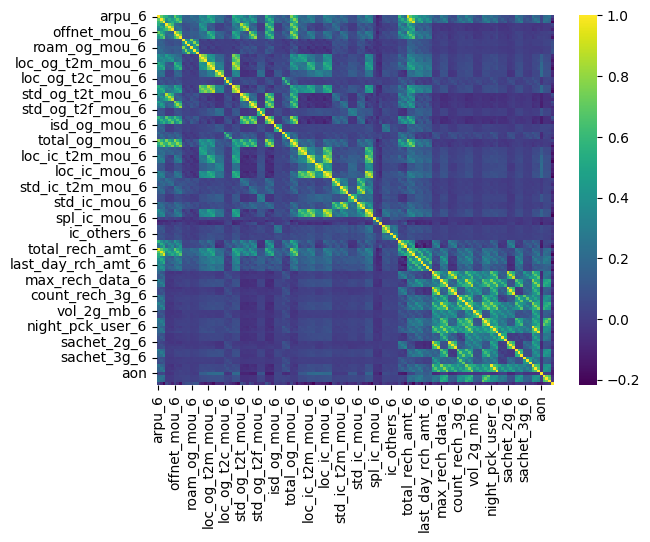

In [24]:
# Correlative 
sns.heatmap(train_imputation.corr(),cmap="viridis")

# Data preparation

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [26]:
#  Create train and validation data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = train_imputation.pop("churn_probability")
X = train_imputation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print('y train_val shape',y.shape)
print('X train_val shape:',X.shape)

y train_val shape (69999,)
X train_val shape: (69999, 142)


In [27]:
#Rescaling the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [28]:
# test dataset
test = pd.read_csv('data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [29]:
#Data manipulation on test dataset
test_imputation = imputation(test)

Number of columns with 70% null values: 9
Drop null columns: Index(['date_of_last_rech_data_6', 'arpu_3g_6', 'arpu_2g_6',
       'date_of_last_rech_data_7', 'arpu_3g_7', 'arpu_2g_7',
       'date_of_last_rech_data_8', 'arpu_3g_8', 'arpu_2g_8'],
      dtype='object')


In [30]:
test_imputation.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   84998.500000    282.644348    279.355021    279.845167    125.539490   
std     8660.398374    314.560212    323.205370    326.437029    286.076687   
min    69999.000000   -185.043000  -2014.045000   -146.859000      0.000000   
25%    77498.750000     92.907500     87.504750     84.180500      5.410000   
50%    84998.500000    198.227500    191.775000    191.690500     31.400000   
75%    92498.250000    371.969250    365.250750    367.804750    111.517500   
max    99998.000000  10955.066000  13224.119000  13505.996000   6944.360000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean     127.946958    125.679297    188.117924    189.104353    185.668382   
std      298.064169    294.988494    312.988297    329.261711    327.934516   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.790000      4.047500     28.605000     26.580000     24.025000   
50%       29.410000     28.480000     89.280000     84.925000     83.485000   
75%      108.845000    108.040000    220.150000    216.930000    213.745000   
max     7411.010000   6723.790000   6962.460000   9667.130000  13547.840000   

       ...   sachet_3g_6   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  ...  30000.000000  30000.000000  30000.000000  30000.000000   
mean   ...      0.073467      0.077967      0.082200     -0.517100   
std    ...      0.557327      0.613596      0.611546      0.842535   
min    ...      0.000000      0.000000      0.000000     -1.000000   
25%    ...      0.000000      0.000000      0.000000     -1.000000   
50%    ...      0.000000      0.000000      0.000000     -1.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     28.000000     35.000000     30.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.510167     -0.500400   1218.023200     68.314097     68.946576   
std        0.846081      0.849171    960.109844    263.460641    278.749349   
min       -1.000000     -1.000000    180.000000      0.000000      0.000000   
25%       -1.000000     -1.000000    466.000000      0.000000      0.000000   
50%       -1.000000     -1.000000    853.000000      0.000000      0.000000   
75%        0.000000      0.000000   1795.000000      0.000000      0.000000   
max        1.000000      1.000000   4197.000000   6054.390000   7994.840000   

         jun_vbc_3g  
count  30000.000000  
mean      59.891621  
std      246.098292  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     6614.530000  

[8 rows x 146 columns]

In [31]:
X_test  = test_imputation[X.columns]
X_test.shape

(30000, 142)

In [32]:
#Feature scaling on test dataset
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

In [33]:
X_test.shape

(30000, 142)

# Models and Evaluation

In [34]:
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [35]:
def printmetrics(y, y_pred):
        print("Train Set Performance")
        print("Confusion Matrix")
        print(metrics.confusion_matrix(y, y_pred))
        print("Accuracy Score : ",round(accuracy_score(y, y_pred),2))
        print("Precision Score : ", round(precision_score(y,y_pred),2))
        print("Recall Score : ", round(recall_score(y,y_pred),2))
        print("ROC AUC Score : ", round(roc_auc_score(y,y_pred),2))
        print("f1_Score : ", round(f1_score(y,y_pred),2))

In [36]:
def testoutput(y_pred,name='submission.csv'):
    #Extract id as this will be required for output file
    test = pd.read_csv('data/test.csv')
    X_test_id = test.id
    #Create dataframe as required in the output with id and churn_probability columns
    data = {'id':[],'churn_probability':[]}
    solution = pd.DataFrame(data)
    #assign values of id and churn prediction 
    solution.id = X_test_id
    solution.churn_probability = y_pred
    solution.churn_probability = solution.churn_probability.astype(np.int64)
    #write output to csv file
    solution.to_csv(name, index=False)
    print("File created successfully.")

## Model 1: Use RandomForestClassifier

In [37]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_val = model1.predict(X_val)
printmetrics(y_val, y_pred_val)

Train Set Performance
Confusion Matrix
[[12367   211]
 [  693   729]]
Accuracy Score :  0.94
Precision Score :  0.78
Recall Score :  0.51
ROC AUC Score :  0.75
f1_Score :  0.62


In [39]:
y_pre_test = model1.predict(X_test)

In [40]:
testoutput(y_pre_test,'model1_sub.csv')

File created successfully.


## Model 2: Use PCA with RandomForestClassifier

In [41]:
#Instantiate
pca=PCA()
#Fit 
pca.fit(X_train)
#Check components from PCA
pca.components_

array([[ 0.02090733,  0.03322509,  0.0427555 , ...,  0.07911386,
         0.07610485,  0.07025087],
       [ 0.06744306,  0.10818025,  0.13535049, ...,  0.00488641,
         0.00274213,  0.00102004],
       [ 0.02464513,  0.05147546,  0.0620568 , ..., -0.02471653,
        -0.02541258, -0.02680066],
       ...,
       [ 0.0009988 , -0.00303933,  0.00072846, ..., -0.00026027,
        -0.00116758, -0.00033356],
       [-0.00457686,  0.00073796,  0.00208536, ...,  0.00064712,
        -0.00022056, -0.00048196],
       [ 0.00343006, -0.00396666,  0.0019246 , ..., -0.00052457,
         0.00018192,  0.00117342]])

In [42]:
#Checking explain variance ratio for each component
pca.explained_variance_ratio_

array([2.57171971e-01, 1.09336686e-01, 6.33941923e-02, 4.33043910e-02,
       4.18793434e-02, 3.25449855e-02, 2.81994170e-02, 2.77837475e-02,
       2.15741558e-02, 1.89800635e-02, 1.82329127e-02, 1.45868284e-02,
       1.37390242e-02, 1.26019439e-02, 1.20037608e-02, 1.13536004e-02,
       1.06483783e-02, 1.01725339e-02, 9.76975444e-03, 8.62949648e-03,
       8.53889255e-03, 8.34386348e-03, 8.11446602e-03, 7.82049990e-03,
       7.55099765e-03, 6.87773377e-03, 6.82506159e-03, 6.25195294e-03,
       5.96785596e-03, 5.91202236e-03, 5.78310995e-03, 5.66865536e-03,
       5.50474960e-03, 5.20053111e-03, 4.97122438e-03, 4.75344895e-03,
       4.63288221e-03, 4.45803699e-03, 4.37401219e-03, 4.27911121e-03,
       4.22638959e-03, 4.17455553e-03, 4.11708672e-03, 4.08572354e-03,
       3.80832237e-03, 3.64307138e-03, 3.37960665e-03, 3.32124484e-03,
       3.10309554e-03, 3.00798858e-03, 2.74743258e-03, 2.68514846e-03,
       2.52212776e-03, 2.38879442e-03, 2.26870476e-03, 2.20086929e-03,
      

In [49]:
#Consider features contributing to 80% variance
pca2=PCA(0.8)

In [50]:
traindata_pca2=pca2.fit_transform(X_train)
traindata_pca2.shape

(55999, 25)

In [51]:
pca2.explained_variance_ratio_

array([0.25717197, 0.10933669, 0.06339419, 0.04330439, 0.04187934,
       0.03254499, 0.02819942, 0.02778375, 0.02157416, 0.01898006,
       0.01823291, 0.01458683, 0.01373902, 0.01260194, 0.01200376,
       0.0113536 , 0.01064838, 0.01017253, 0.00976975, 0.0086295 ,
       0.00853889, 0.00834386, 0.00811447, 0.0078205 , 0.007551  ])

In [52]:
model2 = RandomForestClassifier(random_state=42)
# fit model
model2.fit(traindata_pca2, y_train)

RandomForestClassifier(random_state=42)

In [53]:
X_val_pca2=pca2.transform(X_val)

In [54]:
y_pred_val = model2.predict(X_val_pca2)
printmetrics(y_val, y_pred_val)

Train Set Performance
Confusion Matrix
[[11054  1524]
 [  956   466]]
Accuracy Score :  0.82
Precision Score :  0.23
Recall Score :  0.33
ROC AUC Score :  0.6
f1_Score :  0.27


## Model 3

In [1]:
#Consider features contributing to 80% variance
pca3=PCA(n_components=2)
traindata_pca3=pca3.fit_transform(X_train)
traindata_pca3.shape

NameError: name 'PCA' is not defined